# steps to run this code
1. add this folder to your google drive as shortcut so you can get the data into your colab https://drive.google.com/drive/folders/1arnKu443_QigEaEUVB46cscfzXtIrh8U?usp=sharing

2. run the cells one by one to get the same results as we get don't skip any cell to ensure that no step is missed

# Imports

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import missingno as msno


#Loading Data

## Loading calendar data

In [28]:
calendar=pd.read_csv("/content/drive/MyDrive/daa/calendar.csv")

<ipython-input-28-074091f5361e>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar=pd.read_csv("/content/drive/MyDrive/daa/calendar.csv")


## loading Listings data

In [26]:
listings=pd.read_csv("/content/drive/MyDrive/daa/listings.csv")

## loading reviews data

In [5]:
reviews=pd.read_csv("/content/drive/MyDrive/daa/reviews.csv")

# Data Assessing

## Calendar date

In [ ]:
calendar.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0        2595  2024-07-06         t  $225.00            NaN            30.0   
1        2595  2024-07-07         t  $225.00            NaN            30.0   
2        2595  2024-07-08         t  $225.00            NaN            30.0   
3        2595  2024-07-09         t  $225.00            NaN            30.0   
4        2595  2024-07-10         t  $225.00            NaN            30.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13783864 entries, 0 to 13783863
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 736.1+ MB


#### Check Missing data

In [ ]:
calendar.isna().sum()/len(calendar)*100

listing_id         0.000000
date               0.000000
available          0.000000
price              0.000000
adjusted_price    99.997352
minimum_nights     0.000065
maximum_nights     0.000065
dtype: float64

<Axes: >

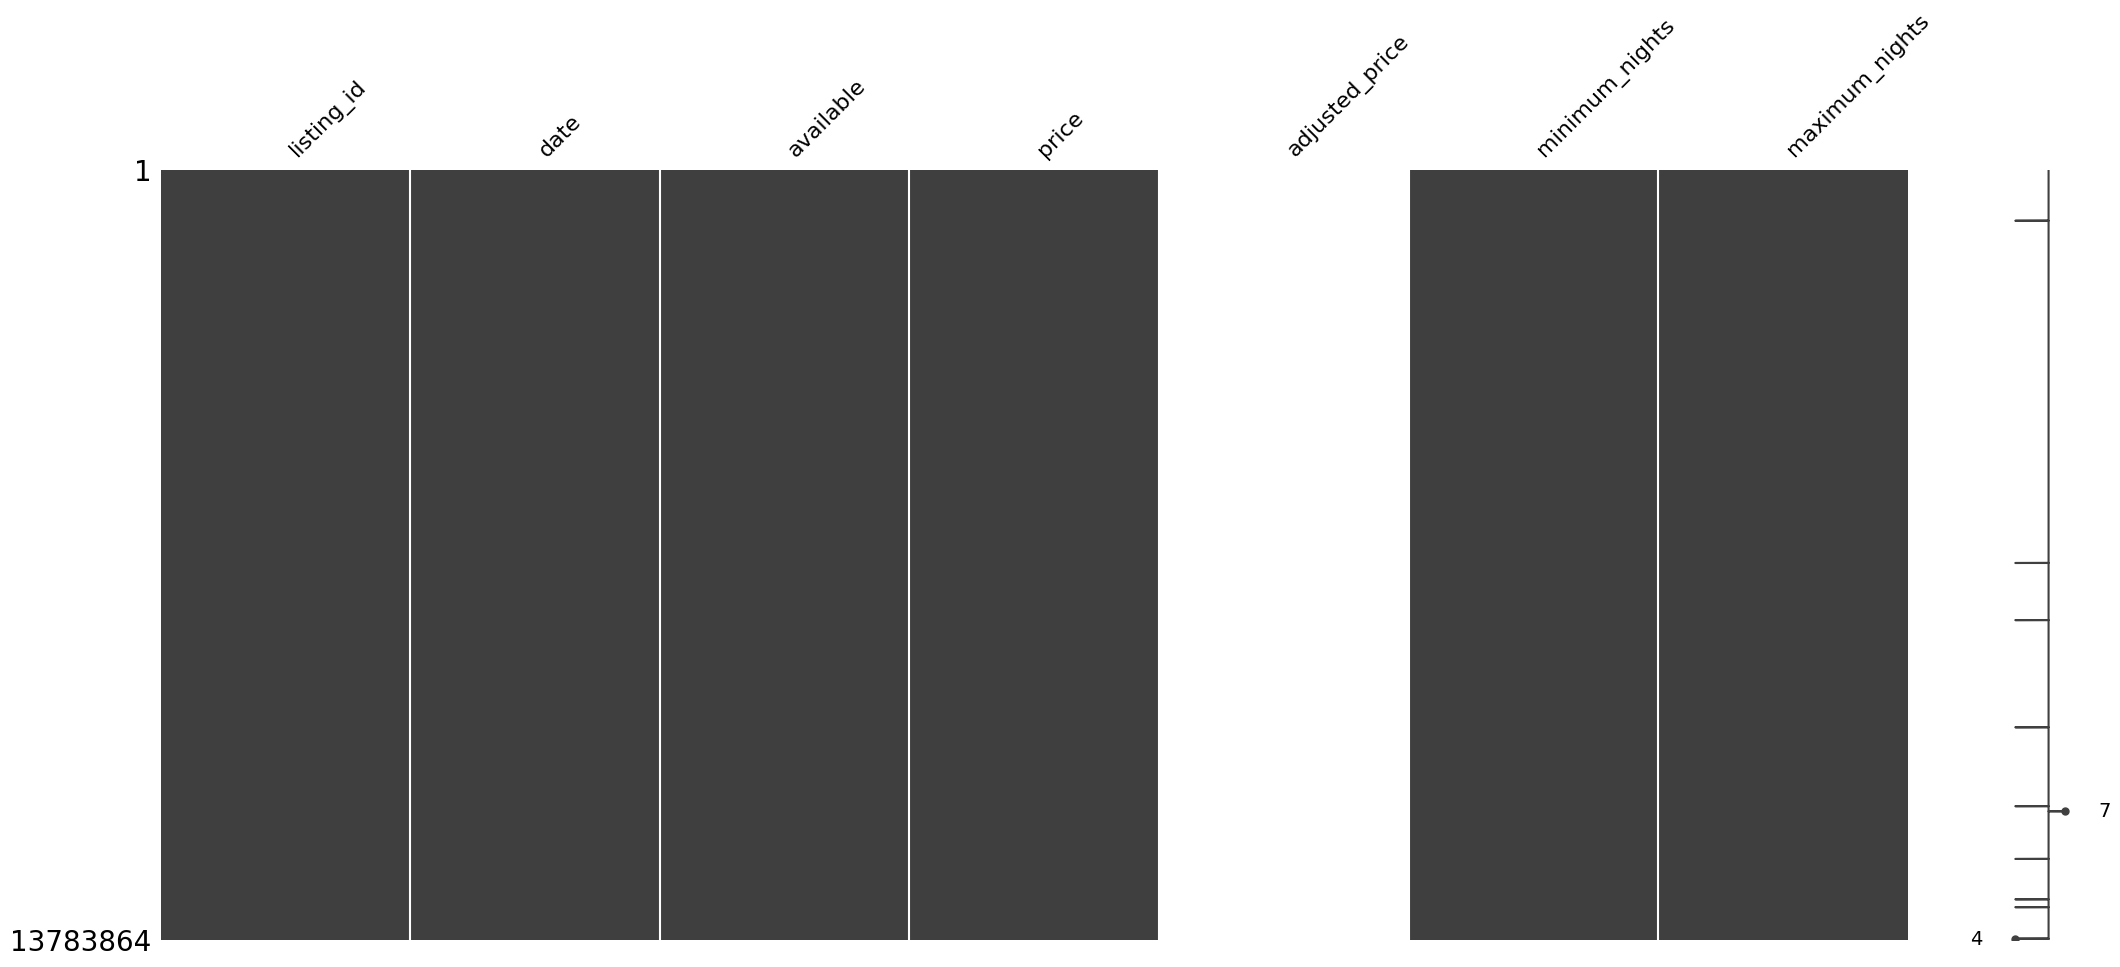

In [ ]:
msno.matrix(calendar)

* adjusted_price  need to be dropped because the column contain no data

### drop date and adjusted price

In [6]:
calendar.drop(columns=['date','adjusted_price','available','minimum_nights','maximum_nights'],inplace=True)


### drop duplicates

In [7]:
calendar.drop_duplicates(inplace=True)

In [8]:
calendar.head()

listing_id    price
0           2595  $225.00
365         5136  $253.00
730         6848   $89.00
1095        6872   $75.00
1460        6990   $70.00

In [ ]:
calendar.shape

(37764, 2)

### Check duplicates Data

In [9]:
calendar.duplicated().sum()

0

### remove $ from price


In [10]:
calendar['price']=calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
calendar.head()


listing_id  price
0           2595  225.0
365         5136  253.0
730         6848   89.0
1095        6872   75.0
1460        6990   70.0

## Listings

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37765 non-null  int64  
 1   listing_url                                   37765 non-null  object 
 2   scrape_id                                     37765 non-null  int64  
 3   last_scraped                                  37765 non-null  object 
 4   source                                        37765 non-null  object 
 5   name                                          37763 non-null  object 
 6   description                                   36675 non-null  object 
 7   neighborhood_overview                         21296 non-null  object 
 8   picture_url                                   37764 non-null  object 
 9   host_id                                       37765 non-null 

In [ ]:
listings.head().T

0  \
id                                                                                         2595   
listing_url                                                   https://www.airbnb.com/rooms/2595   
scrape_id                                                                        20240705150938   
last_scraped                                                                         2024-07-06   
source                                                                              city scrape   
name                                                                      Skylit Midtown Castle   
description                                   Beautiful, spacious skylit studio in the heart...   
neighborhood_overview                         Centrally located in the heart of Manhattan ju...   
picture_url                                   https://a0.muscache.com/pictures/miso/Hosting-...   
host_id                                                                                    2845   
host_url                                                 https://www.airbnb.com/users/show/2845   
host_name                                                                              Jennifer   
host_since                                                                           2008-09-09   
host_location                                                                     Woodstock, NY   
host_about                                    A New Yorker since 2000! My passion is creatin...   
host_response_time                                                           a few days or more   
host_response_rate                                                                          43%   
host_acceptance_rate                                                                        21%   
host_is_superhost                                                                             f   
host_thumbnail_url                            https://a0.muscache.com/im/pictures/user/50fc5...   
host_picture_url                              https://a0.muscache.com/im/pictures/user/50fc5...   
host_neighbourhood                                                                      Midtown   
host_listings_count                                                                         7.0   
host_total_listings_count                                                                   9.0   
host_verifications                                             ['email', 'phone', 'work_email']   
host_has_profile_pic                                                                          t   
host_identity_verified                                                                        t   
neighbourhood                                                           Neighborhood highlights   
neighbourhood_cleansed                                                                  Midtown   
neighbourhood_group_cleansed                                                          Manhattan   
latitude                                                                               40.75356   
longitude                                                                             -73.98559   
property_type                                                                Entire rental unit   
room_type                                                                       Entire home/apt   
accommodates                                                                                  1   
bathrooms                                                                                   1.0   
bathrooms_text                                                                           1 bath   
bedrooms                                                                                    0.0   
beds                                                                                        1.0   
amenities                                     ["Smoke alarm", "Heating", "Bed linens", "Oven...   
price                              

### convert price to float in the listing data

In [11]:
# convert price to float in the listing data
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

### Check columns

In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
# listings.drop(columns=['listing_url','scrape_id','last_scraped','source', 'name',
#        'description', 'neighborhood_overview', 'picture_url', 'host_id',
#        'host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_thumbnail_url', 'host_picture_url',
#        'host_neighbourhood','host_has_profile_pic','bathrooms_text','minimum_minimum_nights',
#        'maximum_minimum_nights', 'minimum_maximum_nights',
#        'maximum_maximum_nights', 'minimum_nights_avg_ntm',
#        'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability','calendar_last_scraped'],inplace=True)

### Check Missing data

In [ ]:
listings.isna().sum()/len(listings)*100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.005296
description                                       2.886270
neighborhood_overview                            43.609162
picture_url                                       0.002648
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.013240
host_since                                        0.013240
host_location                                    21.347809
host_about                                       43.211969
host_response_time                               39.004369
host_response_rate                               39.004369
host_acceptance_rate                             34.211572
host_is_superhost                                 1.053886
host_thumbnail_url                                0.013240
host_picture_url                                  0.013240
host_neighbourhood                               19.878194
host_listings_count                               0.013240
host_total_listings_count                         0.013240
host_verifications                                0.013240
host_has_profile_pic                              0.013240
host_identity_verified                            0.013240
neighbourhood                                    43.606514
neighbourhood_cleansed                            0.000000
neighbourhood_group_cleansed                      0.000000
latitude                                          0.000000
longitude                                         0.000000
property_type                                     0.000000
room_type                                         0.000000
accommodates                                      0.000000
bathrooms                                        38.641599
bathrooms_text                                    0.097974
bedrooms                                         15.577916
beds                                             39.128823
amenities                                         0.000000
price                                            38.980538
minimum_nights                                    0.000000
maximum_nights                                    0.000000
minimum_minimum_nights                            0.002648
maximum_minimum_nights                            0.002648
minimum_maximum_nights                            0.002648
maximum_maximum_nights                            0.002648
minimum_nights_avg_ntm                            0.002648
maximum_nights_avg_ntm                            0.002648
calendar_updated                                100.000000
has_availability                                 14.312194
availability_30                                   0.000000
availability_60                                   0.000000
availability_90                                   0.000000
availability_365                                  0.000000
calendar_last_scraped                             0.000000
number_of_reviews                                 0.000000
number_of_reviews_ltm                             0.000000
number_of_reviews_l30d                            0.000000
first_review                                     31.116113
last_review                                      31.116113
review_scores_rating                             31.116113
review_scores_accuracy                           31.161128
review_scores_cleanliness                        31.134648
review_scores_checkin                            31.171720
review_scores_communication                      31.147888
review_scores_location                           31.179664
review_scores_value                            

<Axes: >

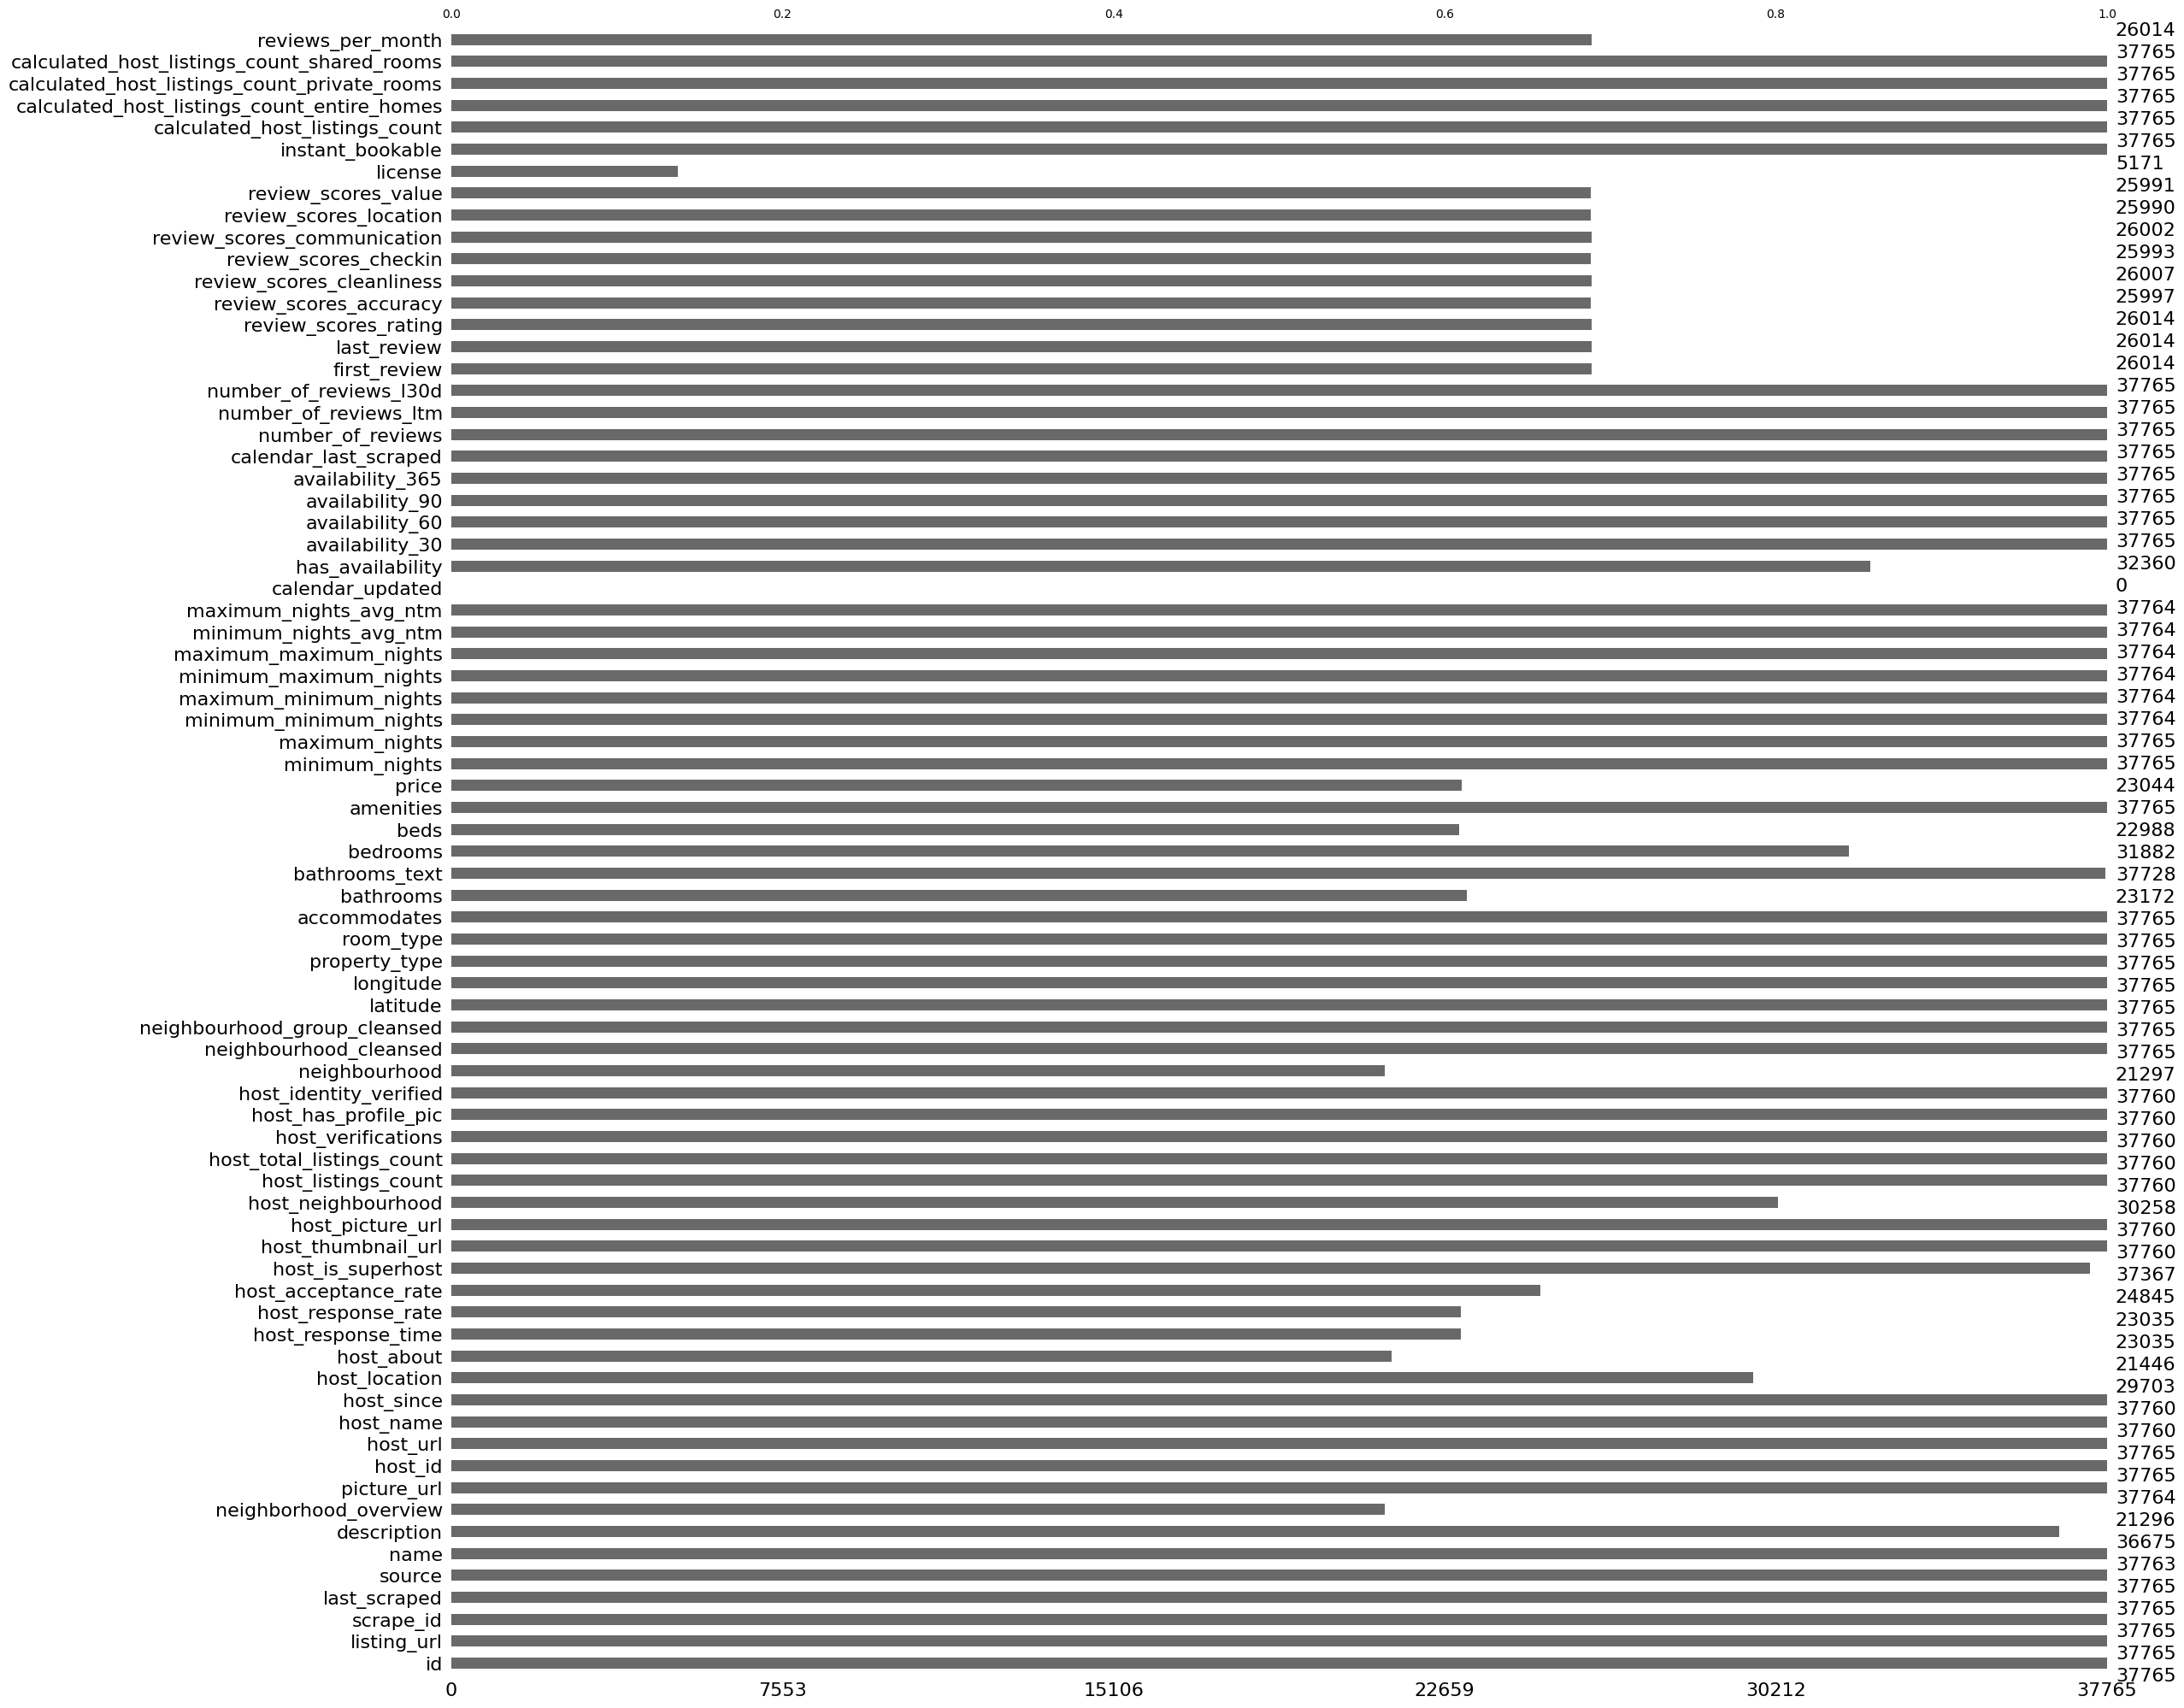

In [ ]:
msno.bar(listings)

* calendar_updated contain no data
* license has more than 80% of data missing
* there is some other columns with high null values counts

### Check Duplicates

In [ ]:
listings.duplicated().sum()

0

## Reviews


In [12]:
reviews.head()

listing_id     id        date  reviewer_id reviewer_name  \
0        2595  17857  2009-11-21        50679          Jean   
1        2595  19176  2009-12-05        53267          Cate   
2        2595  19760  2009-12-10        38960         Anita   
3        2595  34320  2010-04-09        71130       Kai-Uwe   
4        2595  46312  2010-05-25       117113        Alicia   

                                            comments  
0  Notre séjour de trois nuits.\r<br/>Nous avons ...  
1                                  Great experience.  
2  I've stayed with my friend at the Midtown Cast...  
3  We've been staying here for about 9 nights, en...  
4  We had a wonderful stay at Jennifer's charming...

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940310 entries, 0 to 940309
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     940310 non-null  int64 
 1   id             940310 non-null  int64 
 2   date           940310 non-null  object
 3   reviewer_id    940310 non-null  int64 
 4   reviewer_name  940307 non-null  object
 5   comments       940084 non-null  object
dtypes: int64(3), object(3)
memory usage: 43.0+ MB


# Data Visualization

## Calendar Visualizations

### Average Price over time

<ipython-input-30-66bcdbd44eb7>:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Calendar=pd.read_csv("/content/drive/MyDrive/daa/calendar.csv")


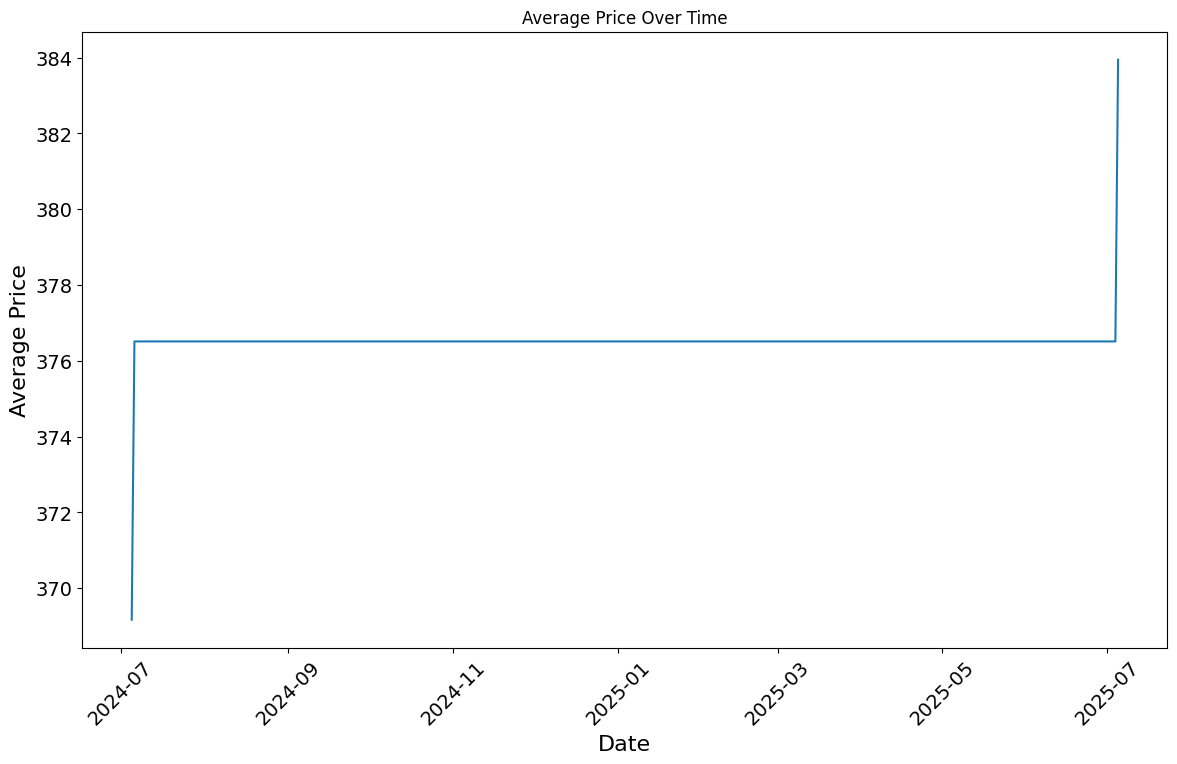

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
Calendar=pd.read_csv("/content/drive/MyDrive/daa/calendar.csv")

# Convert 'date' column to datetime
Calendar['date'] = pd.to_datetime(Calendar['date'])

# Ensure price is numeric, removing any currency symbols and commas
Calendar['price'] = Calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the average price per day
avg_price_per_day = Calendar.groupby('date')['price'].mean().reset_index()

# Plot the average price over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_price_per_day, x='date', y='price')
plt.title('Average Price Over Time')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Average Price', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks( fontsize=14)
plt.show()


### Booking rate over time

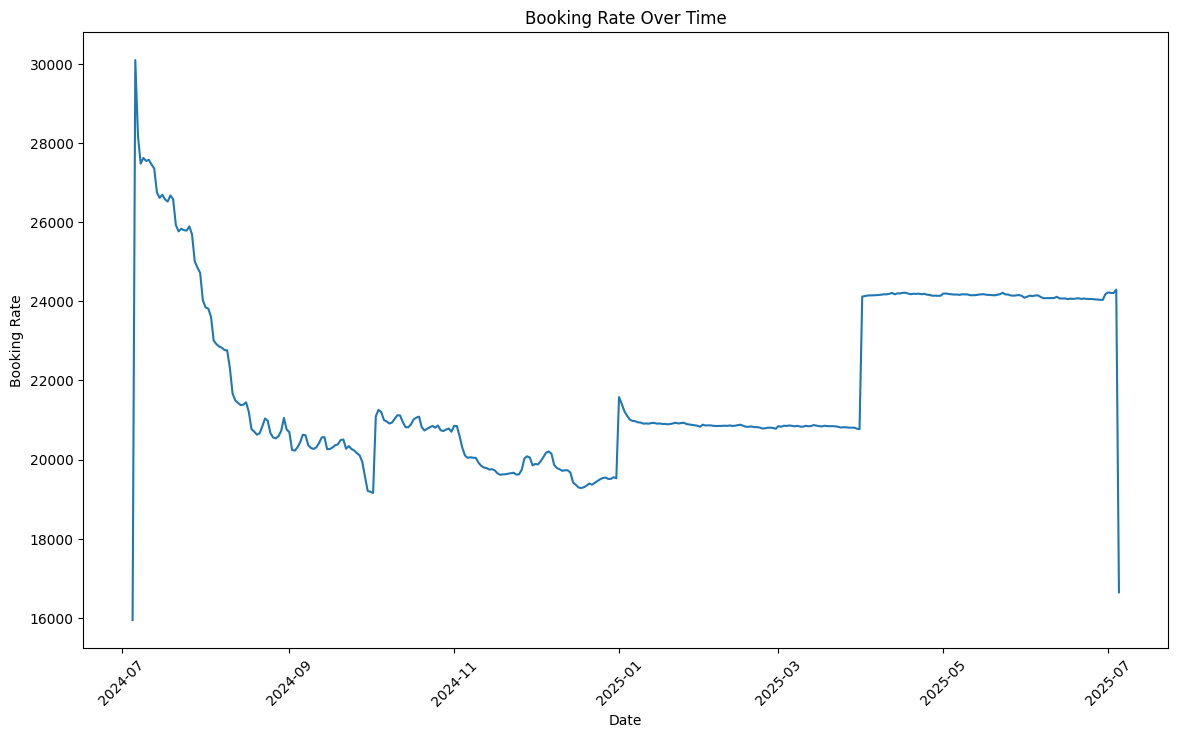

In [16]:
# Calculate booking rate
Calendar['is_booked'] = Calendar['available'].apply(lambda x: 0 if x == 't' else 1)
booking_rate_per_day = Calendar.groupby('date')['is_booked'].sum().reset_index()

# Plot the booking rate over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=booking_rate_per_day, x='date', y='is_booked')
plt.title('Booking Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Booking Rate')
plt.xticks(rotation=45)
plt.show()


### Availability Heatmap with count of available units for booking



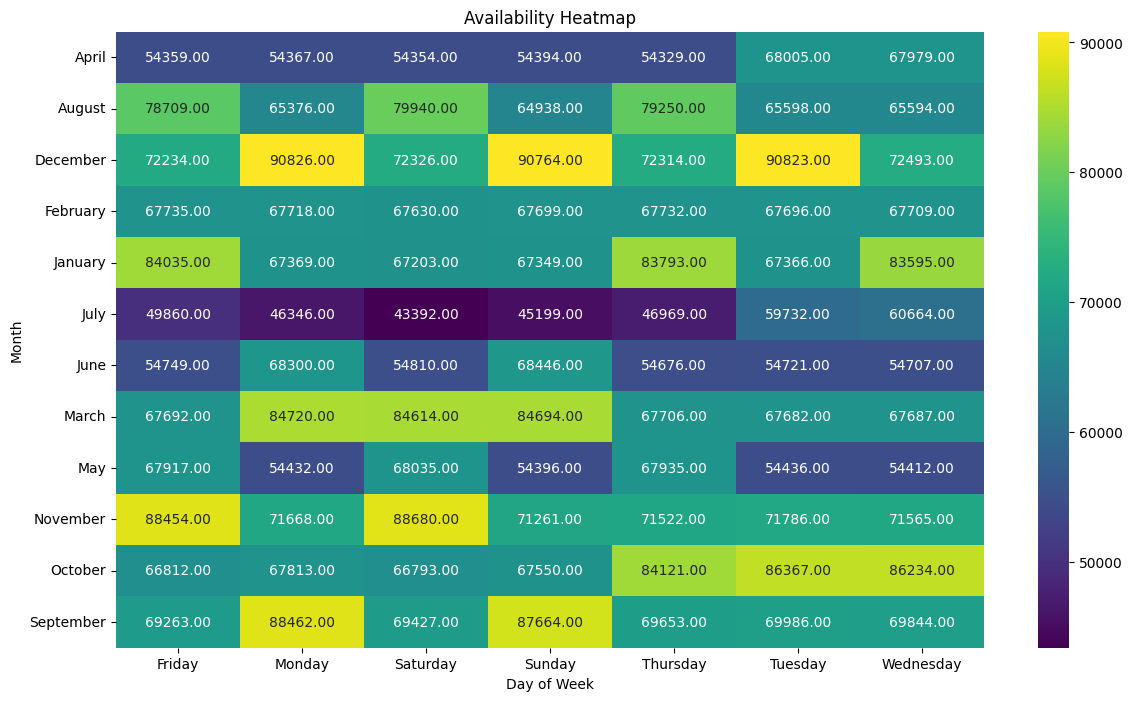

In [31]:
# Extract day of week and month from date
Calendar['day_of_week'] = Calendar['date'].dt.day_name()
Calendar['month'] = Calendar['date'].dt.month_name()
Calendar['available'] = Calendar['available'].map({'t': 1, 'f': 0})
Calendar['year'] = Calendar['date'].dt.year

# Calculate availability count by day of week and month
availability_heatmap = pd.crosstab(Calendar['month'], Calendar['day_of_week'], values=Calendar['available'], aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(availability_heatmap, cmap='viridis', annot=True, fmt='.2f')
plt.title('Availability Heatmap')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()


### Availability Heatmap with percentage of available units for booking



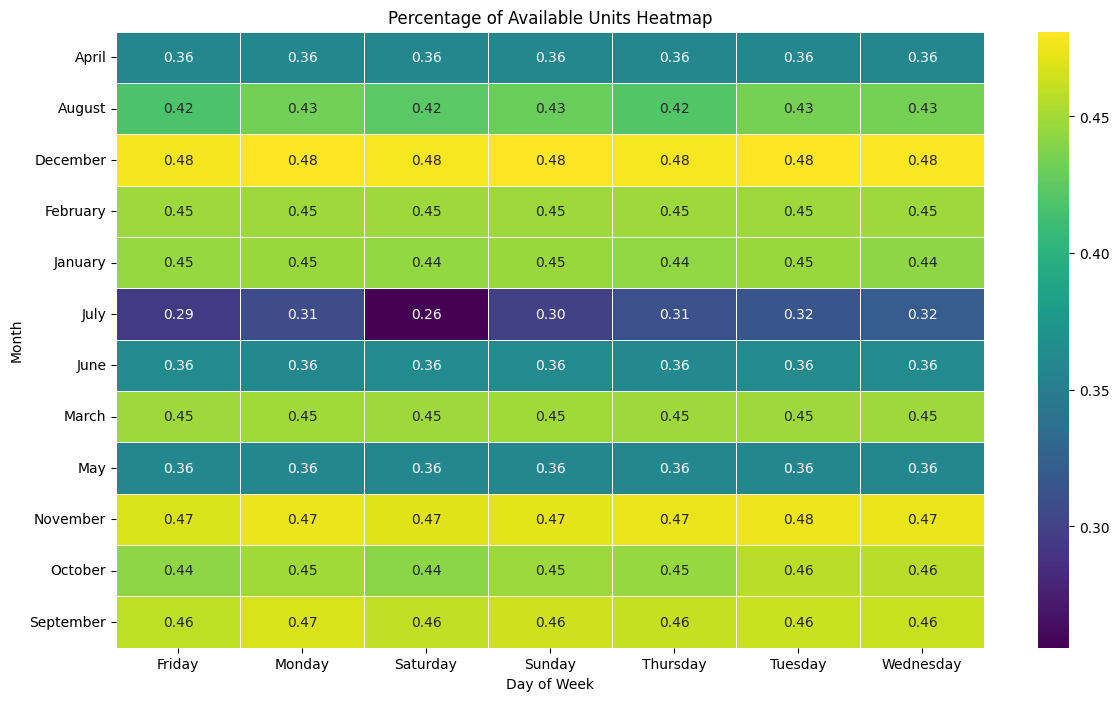

In [32]:

# Calculate total number of listings for each combination of month and day of the week
total_listings = pd.crosstab(Calendar['month'], Calendar['day_of_week'], values=Calendar['available'], aggfunc='count')

# Calculate availability counts by day of week and month
availability_counts = pd.crosstab(Calendar['month'], Calendar['day_of_week'], values=Calendar['available'], aggfunc='sum')

# Calculate percentage of available units
availability_percentage = (availability_counts / total_listings)

# Plot the heatmap of availability percentage
plt.figure(figsize=(14, 8))
sns.heatmap(availability_percentage, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
plt.title('Percentage of Available Units Heatmap')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

### Availability Heatmap with percentage  of available units for booking per year month and week day



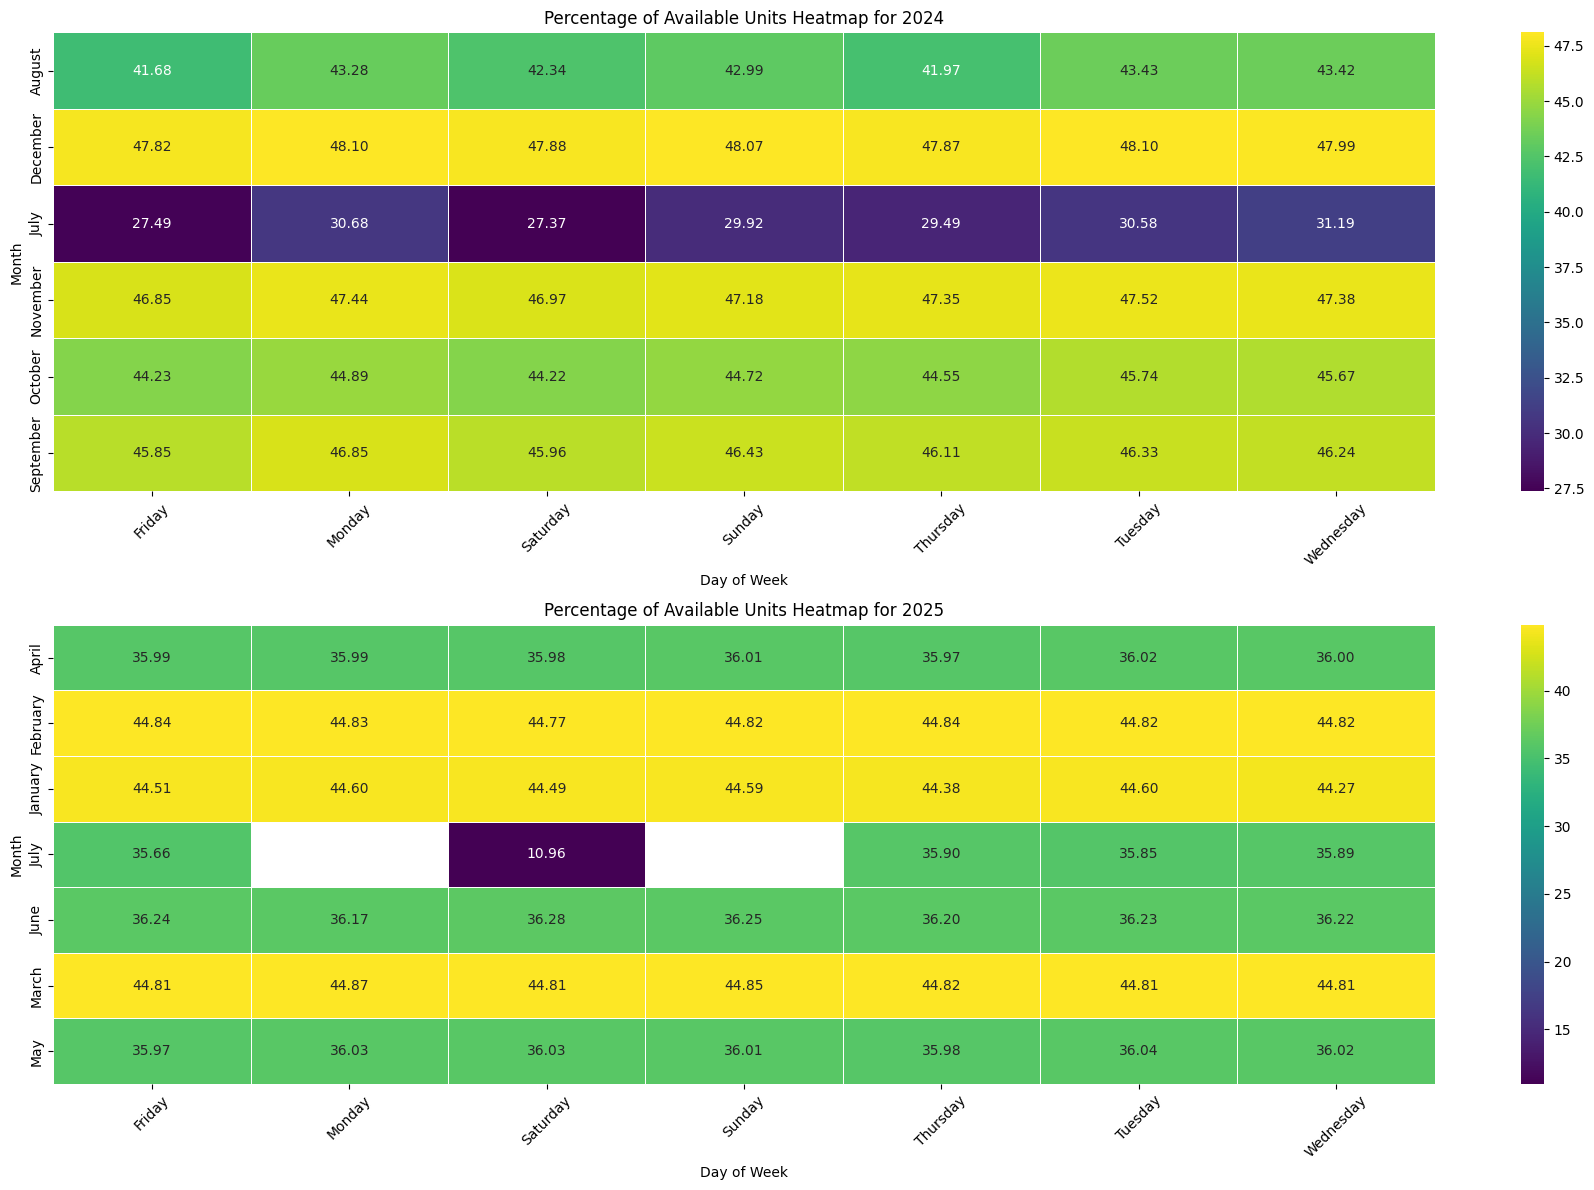

In [37]:
# Calculate total number of listings for each combination of year, month, and day of the week
total_listings = pd.crosstab([Calendar['year'], Calendar['month']], Calendar['day_of_week'], values=Calendar['available'], aggfunc='count')

# Calculate availability counts by year, month, and day of the week
availability_counts = pd.crosstab([Calendar['year'], Calendar['month']], Calendar['day_of_week'], values=Calendar['available'], aggfunc='sum')

# Calculate percentage of available units
availability_percentage = (availability_counts / total_listings) * 100

# Plot the heatmaps for each year
years = Calendar['year'].unique()

plt.figure(figsize=(18, 12))
for i, year in enumerate(sorted(years), 1):
    plt.subplot(len(years), 1, i)
    year_data = availability_percentage.loc[year]
    sns.heatmap(year_data, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)
    plt.title(f'Percentage of Available Units Heatmap for {year}')
    plt.xlabel('Day of Week')
    plt.ylabel('Month')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
Calendar.head()

listing_id       date  available  price adjusted_price  minimum_nights  \
0        2595 2024-07-06          1  225.0            NaN            30.0   
1        2595 2024-07-07          1  225.0            NaN            30.0   
2        2595 2024-07-08          1  225.0            NaN            30.0   
3        2595 2024-07-09          1  225.0            NaN            30.0   
4        2595 2024-07-10          1  225.0            NaN            30.0   

   maximum_nights  is_booked day_of_week month  year  
0          1125.0          0    Saturday  July  2024  
1          1125.0          0      Sunday  July  2024  
2          1125.0          0      Monday  July  2024  
3          1125.0          0     Tuesday  July  2024  
4          1125.0          0   Wednesday  July  2024

In [25]:
Calendar[
    (Calendar['year'] == 2025) &
    (Calendar['month'] == 'July') &
    (Calendar['day_of_week'].isin(['Monday', 'Sunday']))
]

Empty DataFrame
Columns: [listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights, is_booked, day_of_week, month, year]
Index: []

there is no available data for monday and sunday at July 2025 thats way its blank on the plot

## Listings Visualizations

Distribution for id:
count    3.776500e+04
mean     3.653038e+17
std      4.539908e+17
min      2.595000e+03
25%      2.055254e+07
50%      4.826382e+07
75%      8.276380e+17
max      1.193086e+18
Name: id, dtype: float64




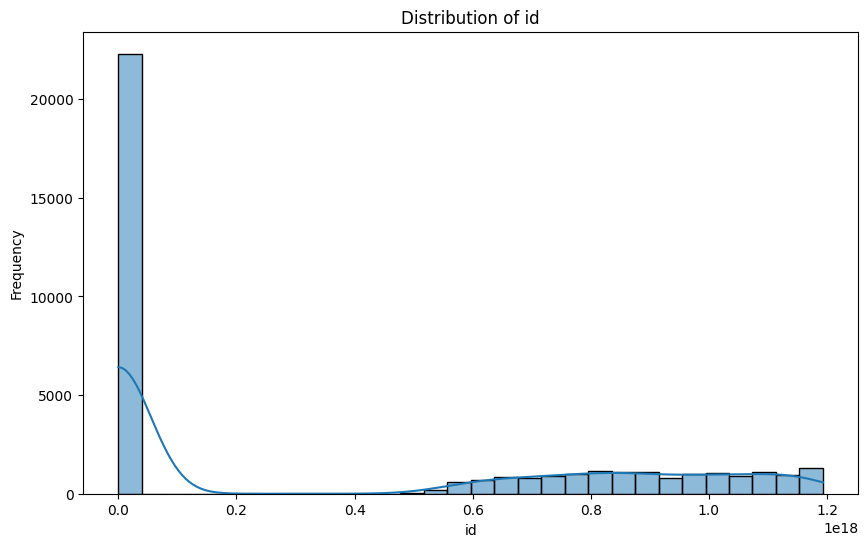

Distribution for scrape_id:
count    3.776500e+04
mean     2.024071e+13
std      0.000000e+00
min      2.024071e+13
25%      2.024071e+13
50%      2.024071e+13
75%      2.024071e+13
max      2.024071e+13
Name: scrape_id, dtype: float64




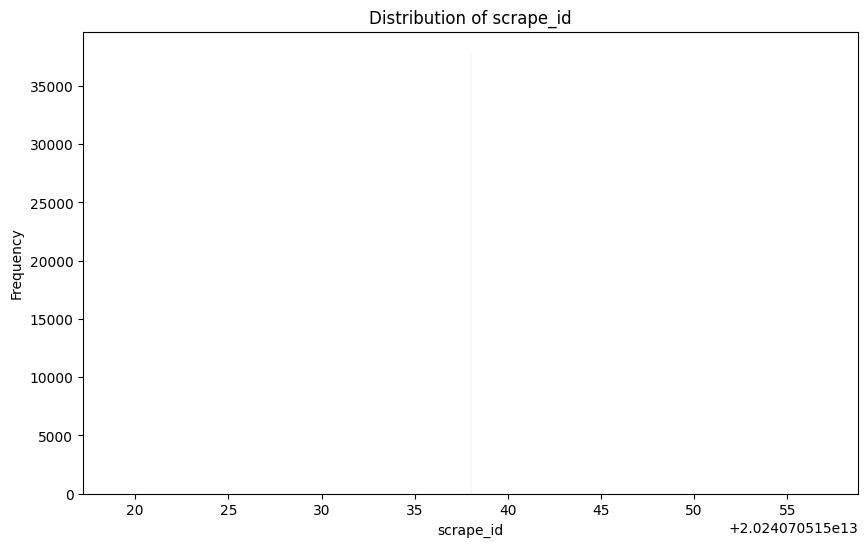

Distribution for host_id:
count    3.776500e+04
mean     1.659684e+08
std      1.800529e+08
min      1.678000e+03
25%      1.662776e+07
50%      8.218953e+07
75%      3.031569e+08
max      5.869174e+08
Name: host_id, dtype: float64




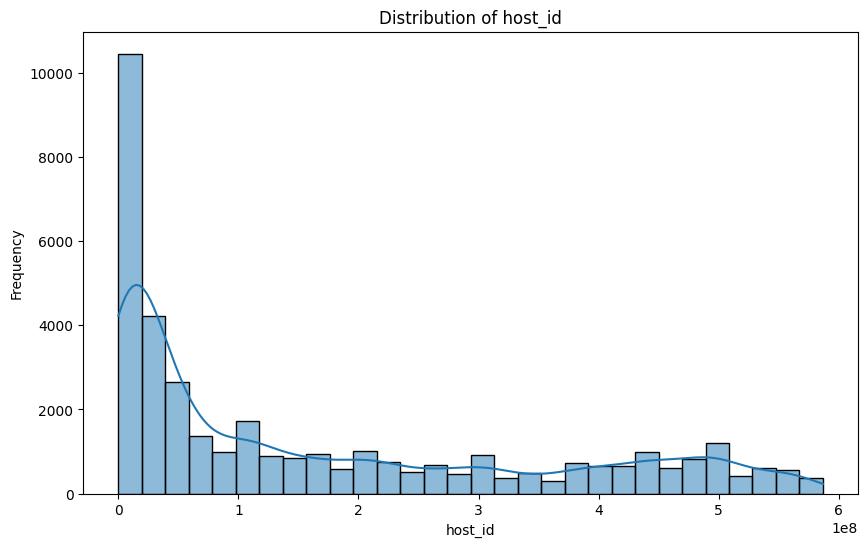

Distribution for host_listings_count:
count    37760.000000
mean       205.595101
std        819.005123
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max       4641.000000
Name: host_listings_count, dtype: float64




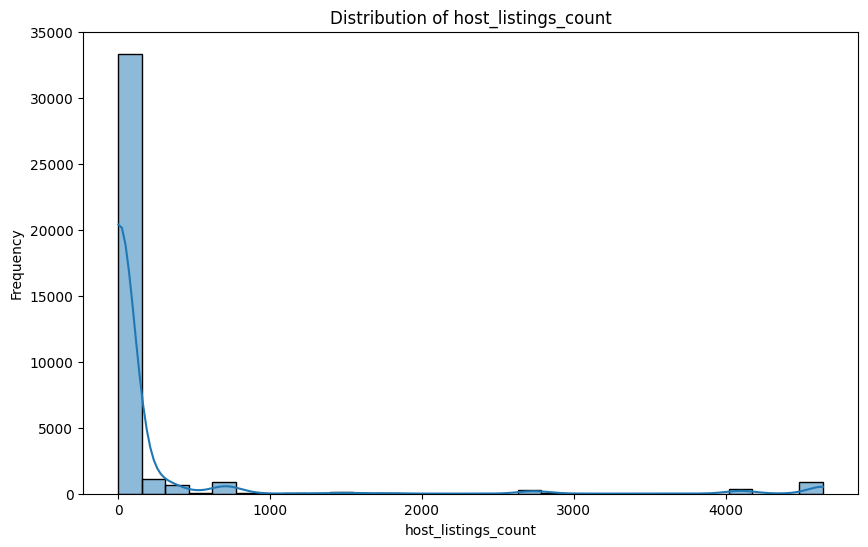

Distribution for host_total_listings_count:
count    37760.000000
mean       284.513745
std       1027.543106
min          1.000000
25%          1.000000
50%          3.000000
75%         13.000000
max       9013.000000
Name: host_total_listings_count, dtype: float64




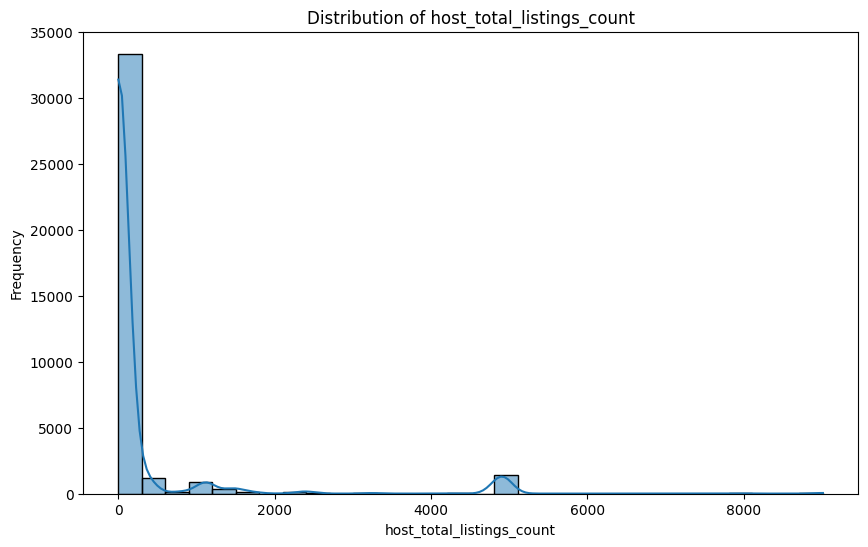

Distribution for latitude:
count    37765.000000
mean        40.729075
std          0.056343
min         40.500366
25%         40.688800
50%         40.726440
75%         40.762470
max         40.911390
Name: latitude, dtype: float64




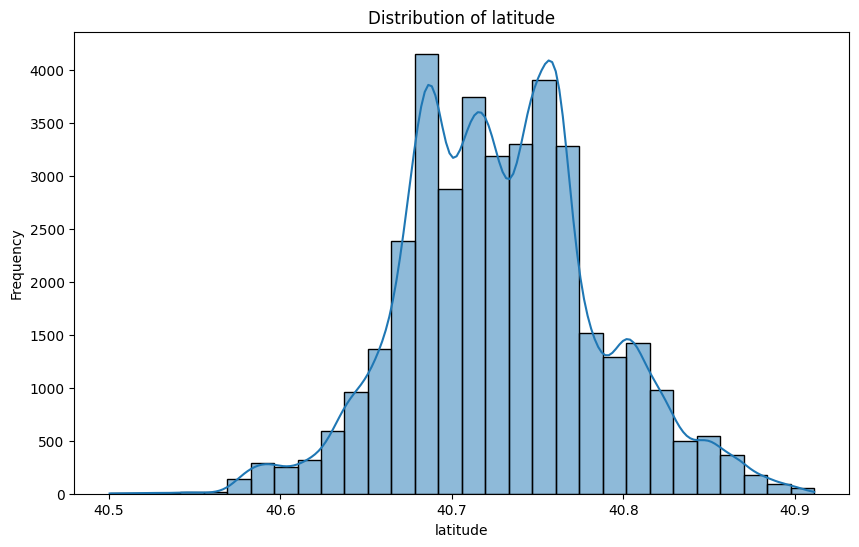

Distribution for longitude:
count    37765.000000
mean       -73.947084
std          0.054458
min        -74.251907
25%        -73.983220
50%        -73.954540
75%        -73.928022
max        -73.713650
Name: longitude, dtype: float64




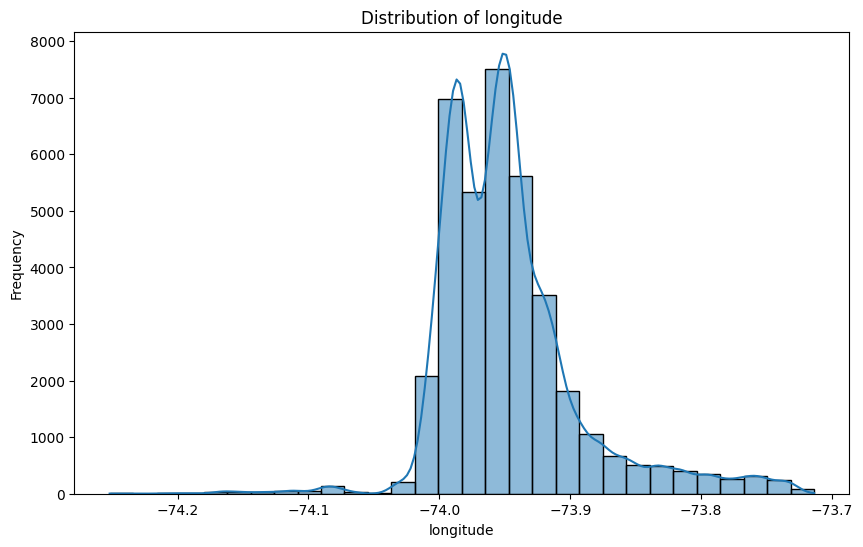

Distribution for accommodates:
count    37765.000000
mean         2.761949
std          1.922789
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64




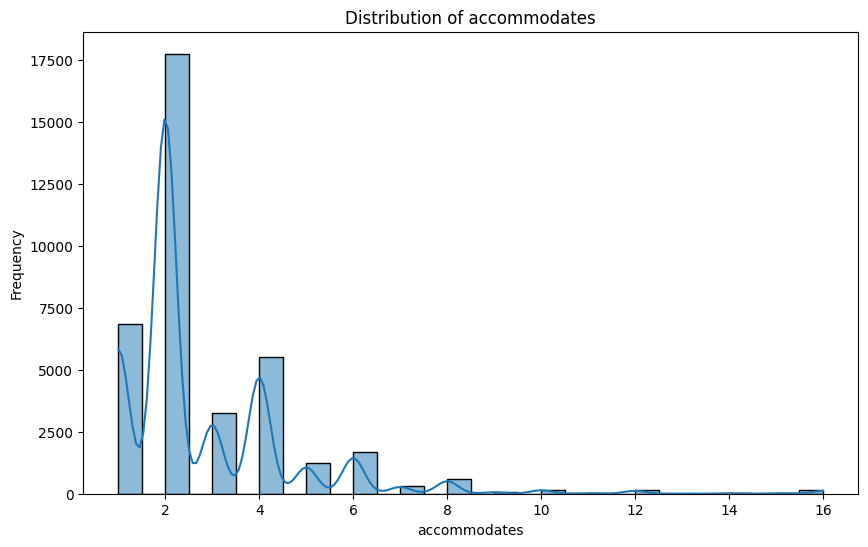

Distribution for bathrooms:
count    23172.000000
mean         1.188525
std          0.548367
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.500000
Name: bathrooms, dtype: float64




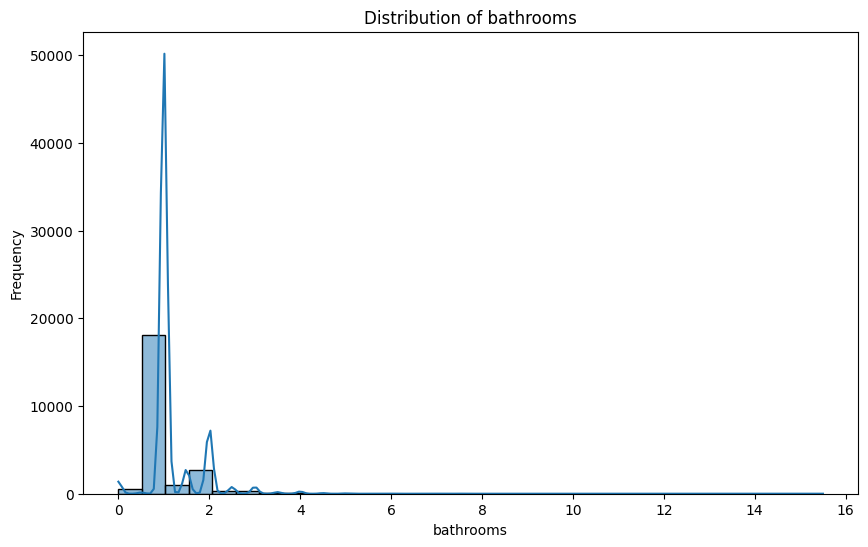

Distribution for bedrooms:
count    31882.000000
mean         1.386205
std          0.936081
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: bedrooms, dtype: float64




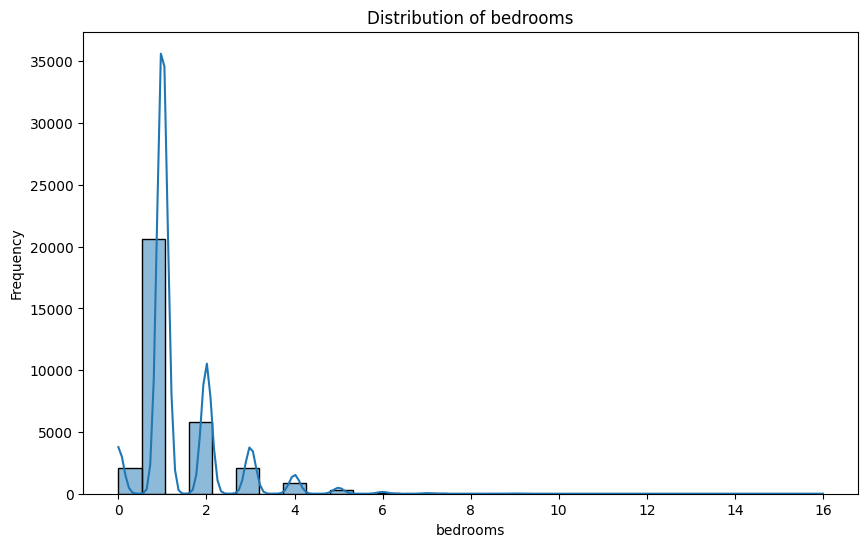

Distribution for beds:
count    22988.000000
mean         1.636593
std          1.182118
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: beds, dtype: float64




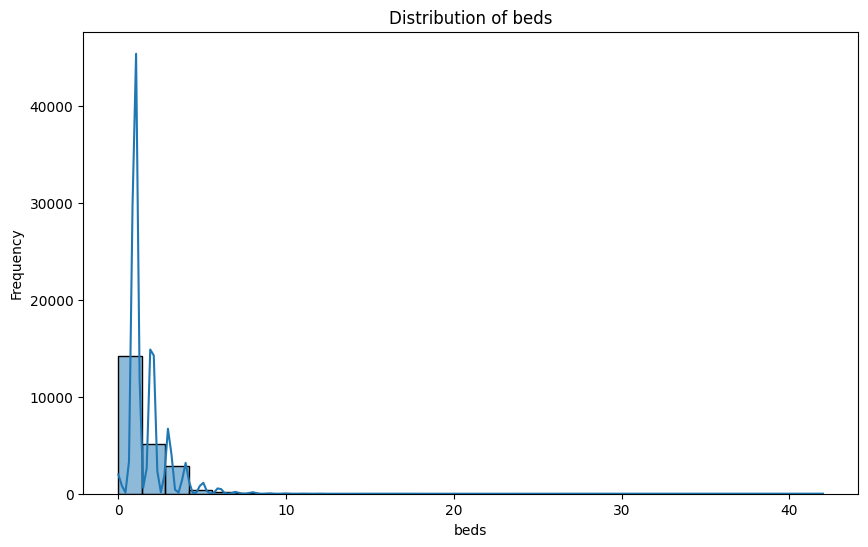

Distribution for price:
count     23044.000000
mean        221.074900
std         766.620992
min           8.000000
25%          86.000000
50%         150.000000
75%         250.000000
max      100000.000000
Name: price, dtype: float64




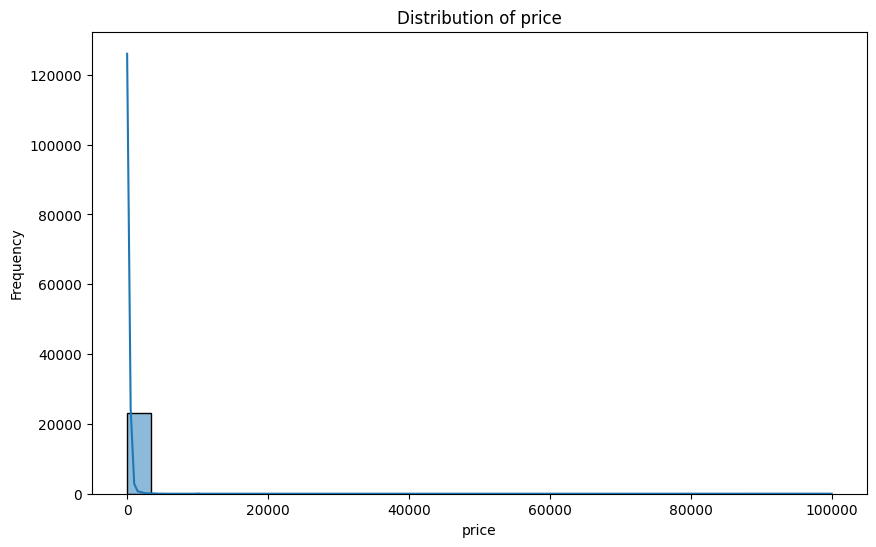

Distribution for minimum_nights:
count    37765.000000
mean        29.164597
std         30.202538
min          1.000000
25%         30.000000
50%         30.000000
75%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64




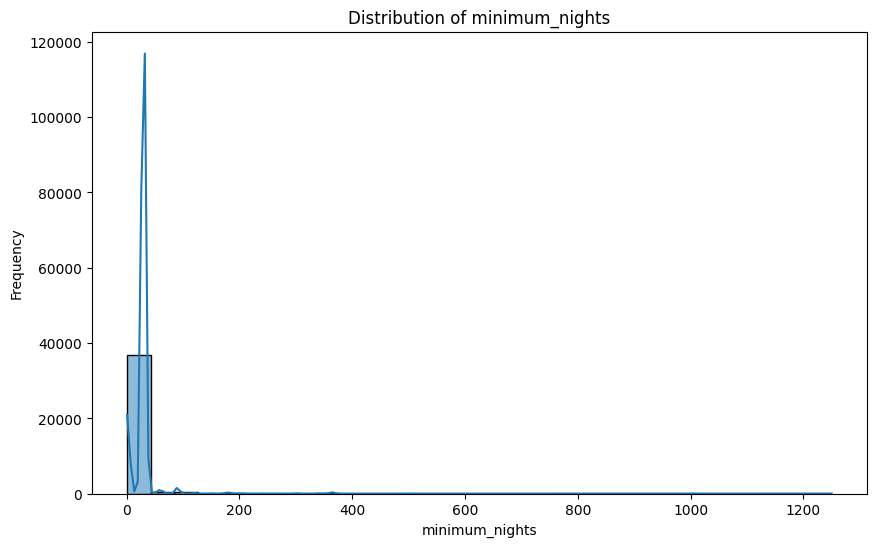

Distribution for maximum_nights:
count    3.776500e+04
mean     5.797700e+04
std      1.105105e+07
min      1.000000e+00
25%      1.500000e+02
50%      3.650000e+02
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64




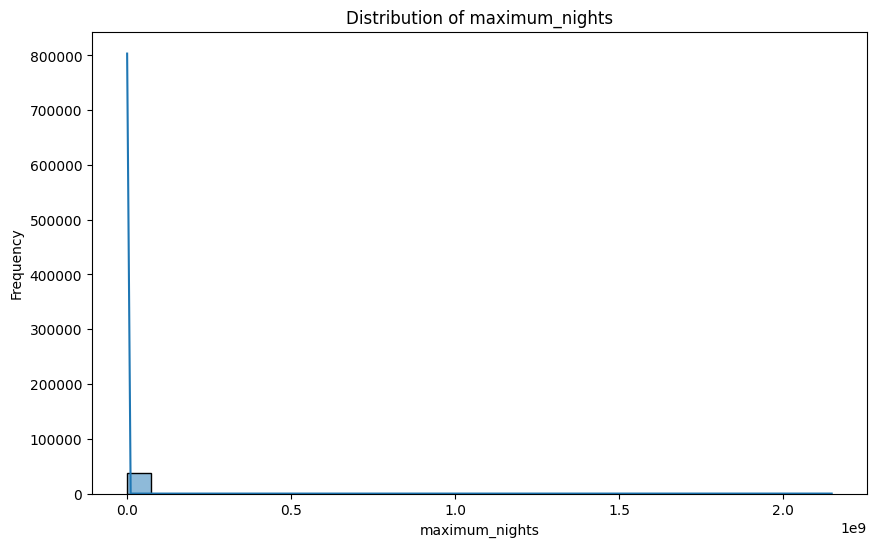

Distribution for minimum_minimum_nights:
count    37764.000000
mean        28.737872
std         29.589204
min          1.000000
25%         30.000000
50%         30.000000
75%         30.000000
max       1250.000000
Name: minimum_minimum_nights, dtype: float64




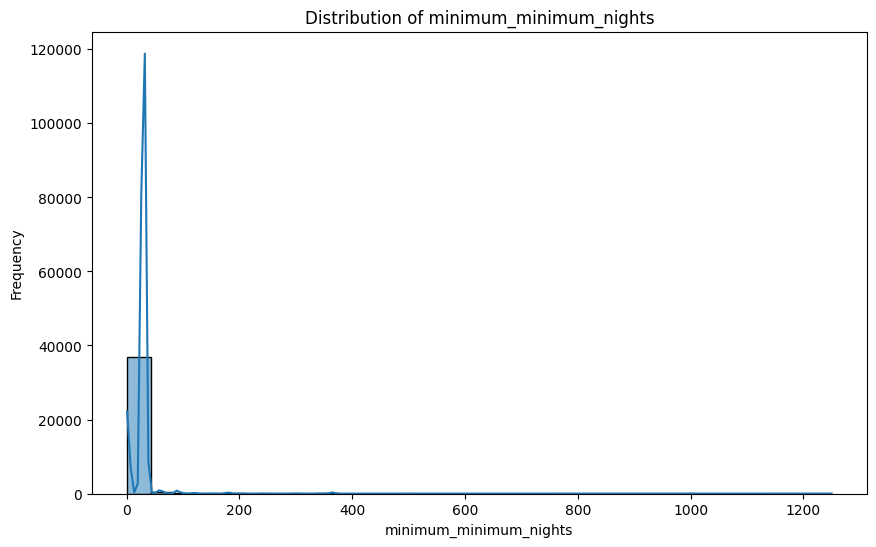

Distribution for maximum_minimum_nights:
count    37764.000000
mean        37.218277
std         60.412170
min          1.000000
25%         30.000000
50%         30.000000
75%         30.000000
max       1250.000000
Name: maximum_minimum_nights, dtype: float64




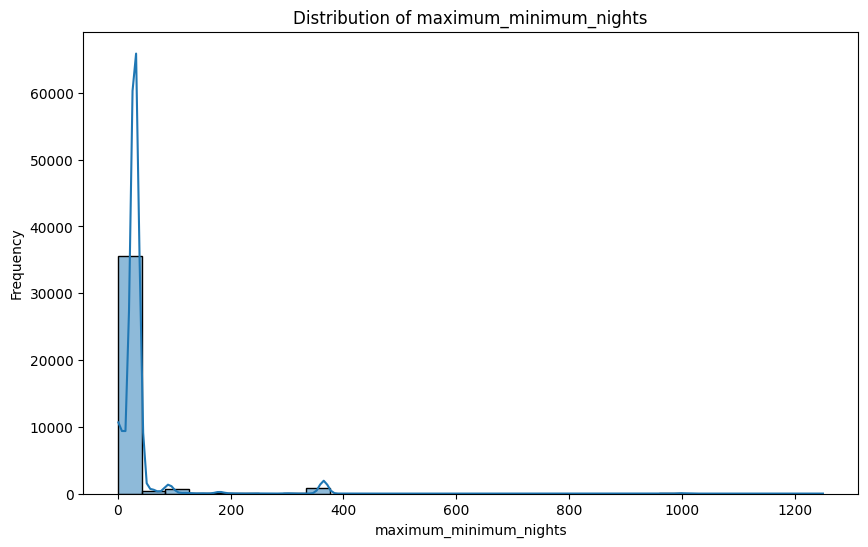

Distribution for minimum_maximum_nights:
count    3.776400e+04
mean     5.806828e+04
std      1.105120e+07
min      1.000000e+00
25%      3.610000e+02
50%      7.300000e+02
75%      1.125000e+03
max      2.147484e+09
Name: minimum_maximum_nights, dtype: float64




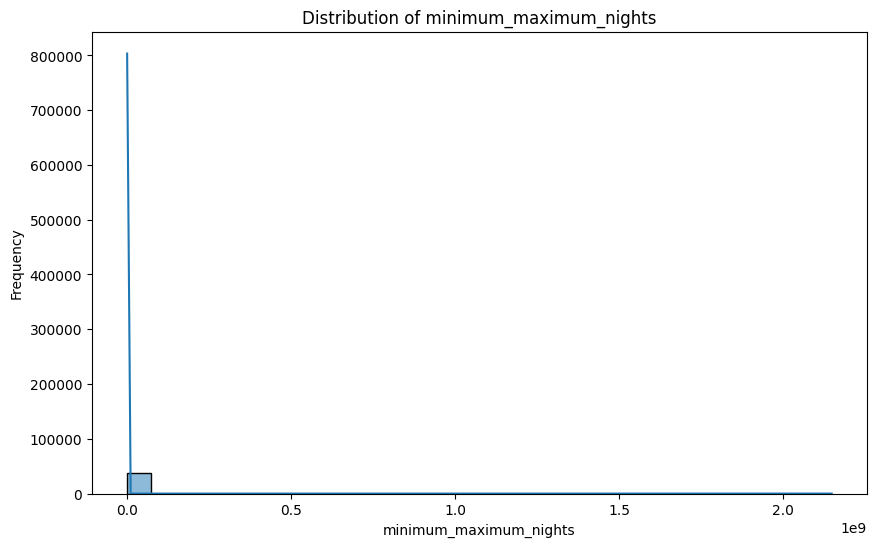

Distribution for maximum_maximum_nights:
count    3.776400e+04
mean     1.650348e+06
std      5.948798e+07
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_maximum_nights, dtype: float64




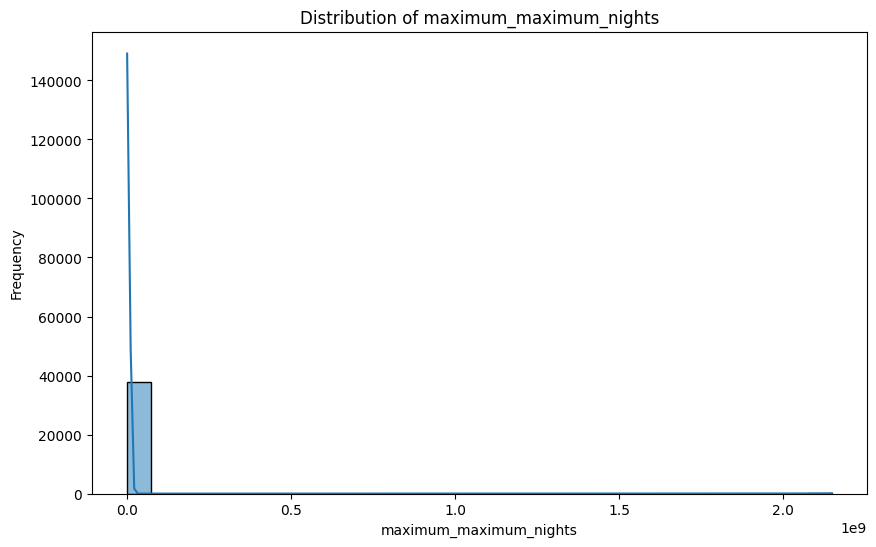

Distribution for minimum_nights_avg_ntm:
count    37764.000000
mean        29.751173
std         31.755856
min          1.000000
25%         30.000000
50%         30.000000
75%         30.000000
max       1250.000000
Name: minimum_nights_avg_ntm, dtype: float64




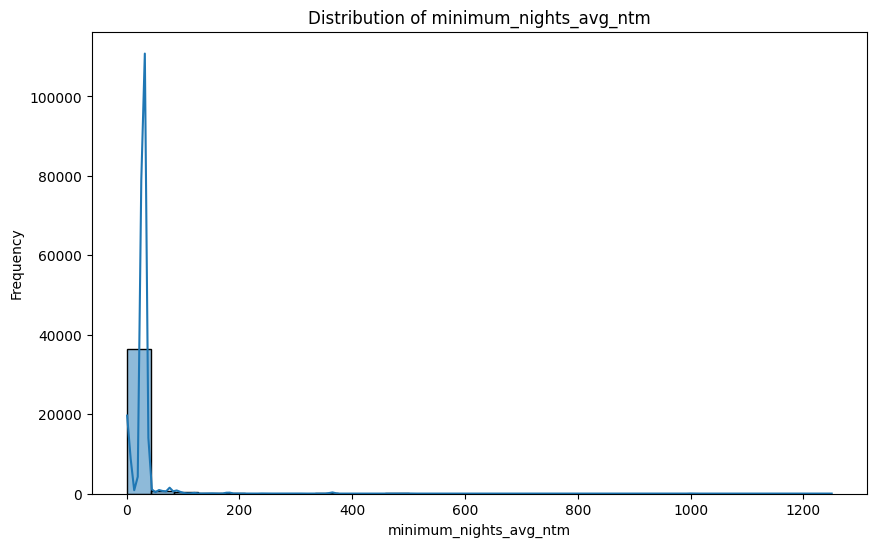

Distribution for maximum_nights_avg_ntm:
count    3.776400e+04
mean     1.074746e+06
std      4.467086e+07
min      1.000000e+00
25%      3.650000e+02
50%      9.346000e+02
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights_avg_ntm, dtype: float64




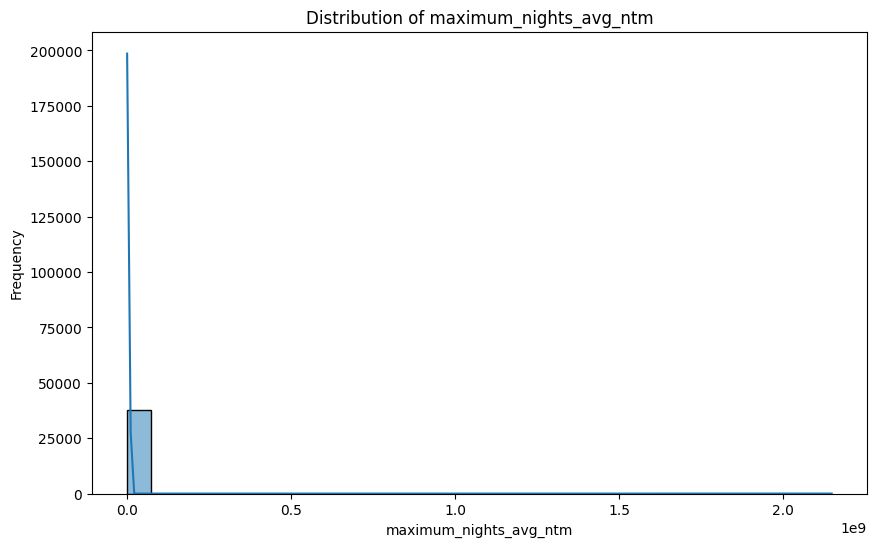

Distribution for calendar_updated:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: calendar_updated, dtype: float64




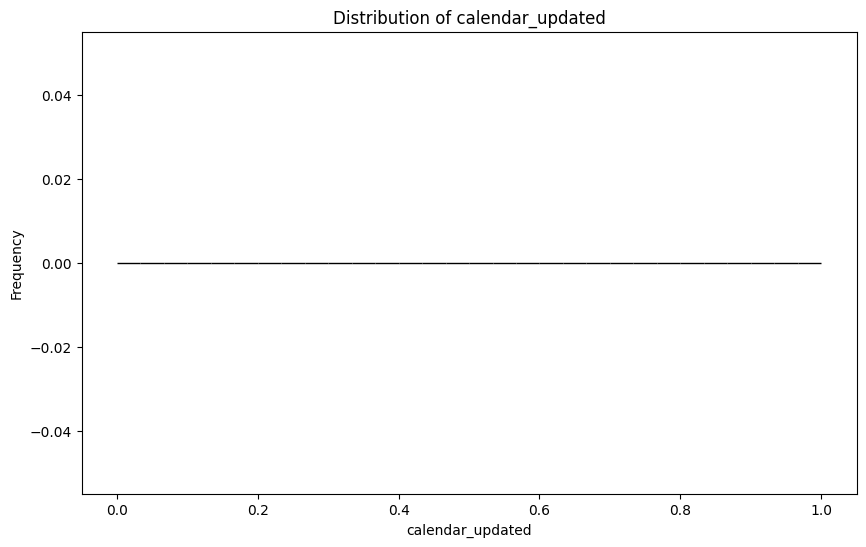

Distribution for availability_30:
count    37765.000000
mean         9.041785
std         12.126443
min          0.000000
25%          0.000000
50%          0.000000
75%         22.000000
max         30.000000
Name: availability_30, dtype: float64




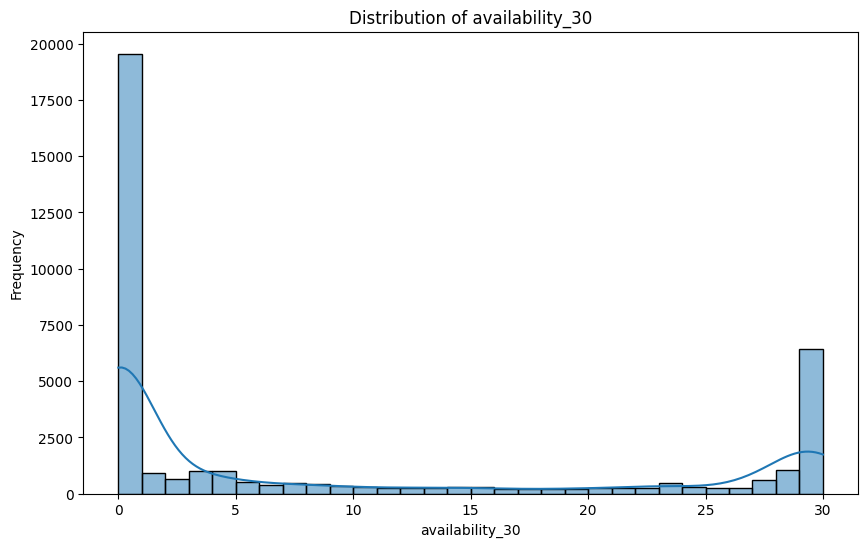

Distribution for availability_60:
count    37765.000000
mean        22.083728
std         24.229526
min          0.000000
25%          0.000000
50%         11.000000
75%         49.000000
max         60.000000
Name: availability_60, dtype: float64




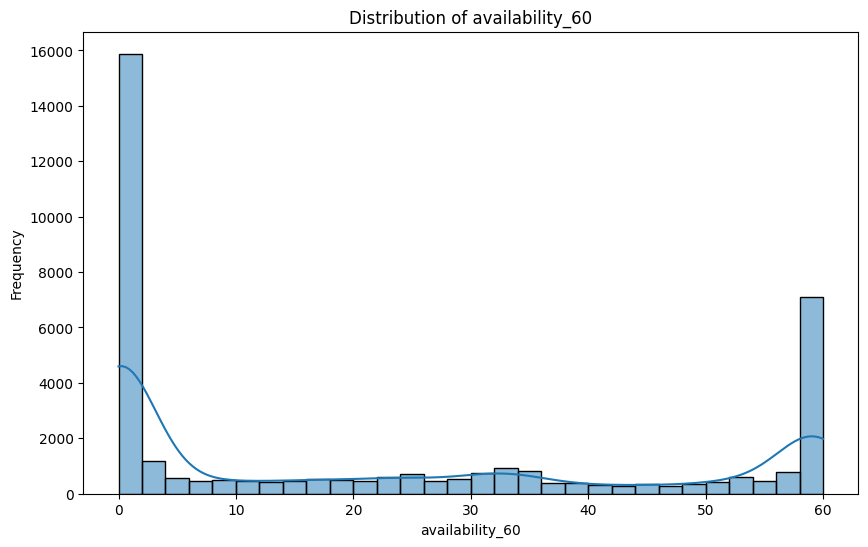

Distribution for availability_90:
count    37765.000000
mean        36.027062
std         36.384337
min          0.000000
25%          0.000000
50%         28.000000
75%         74.000000
max         90.000000
Name: availability_90, dtype: float64




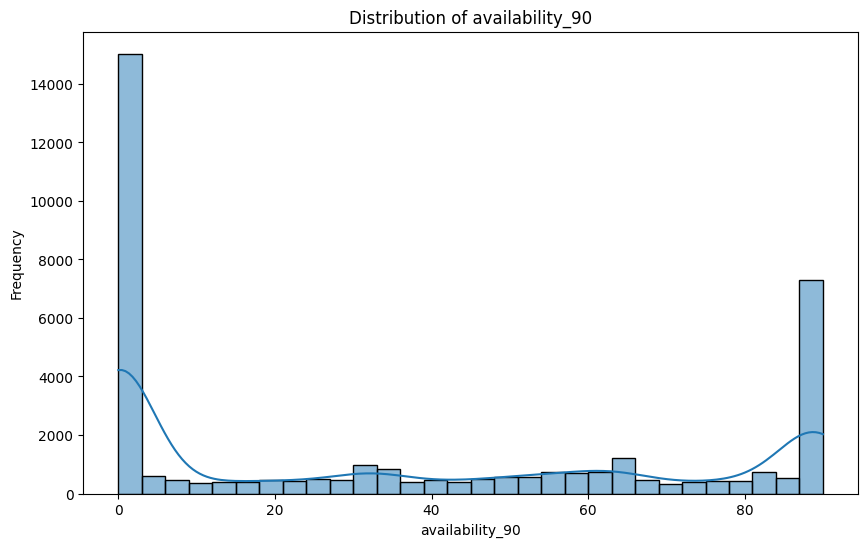

Distribution for availability_365:
count    37765.000000
mean       152.411598
std        142.797333
min          0.000000
25%          0.000000
50%        126.000000
75%        301.000000
max        365.000000
Name: availability_365, dtype: float64




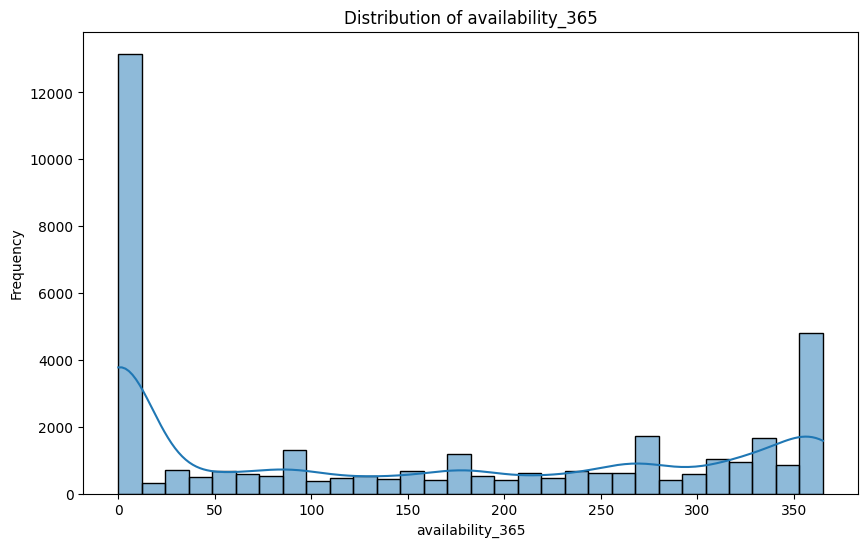

Distribution for number_of_reviews:
count    37765.000000
mean        24.898981
std         58.802122
min          0.000000
25%          0.000000
50%          3.000000
75%         21.000000
max       1915.000000
Name: number_of_reviews, dtype: float64




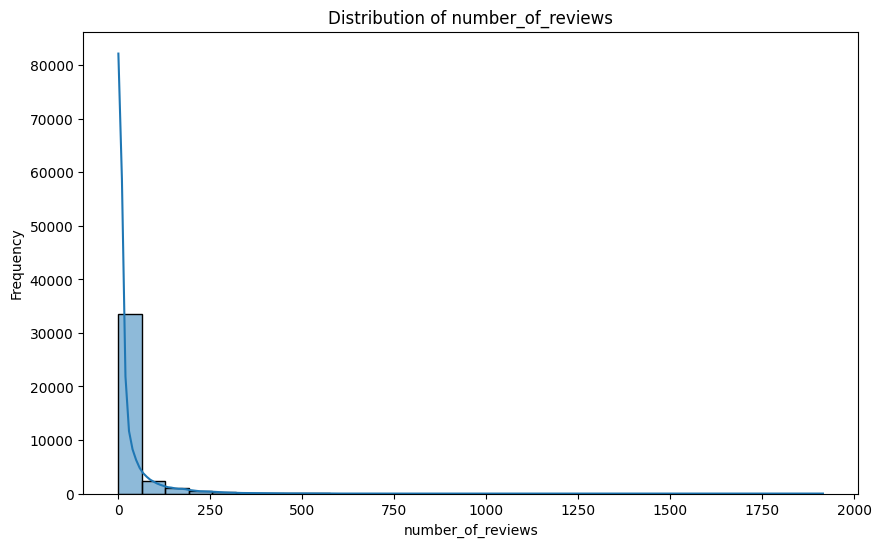

Distribution for number_of_reviews_ltm:
count    37765.000000
mean         3.993168
std         15.762591
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max       1568.000000
Name: number_of_reviews_ltm, dtype: float64




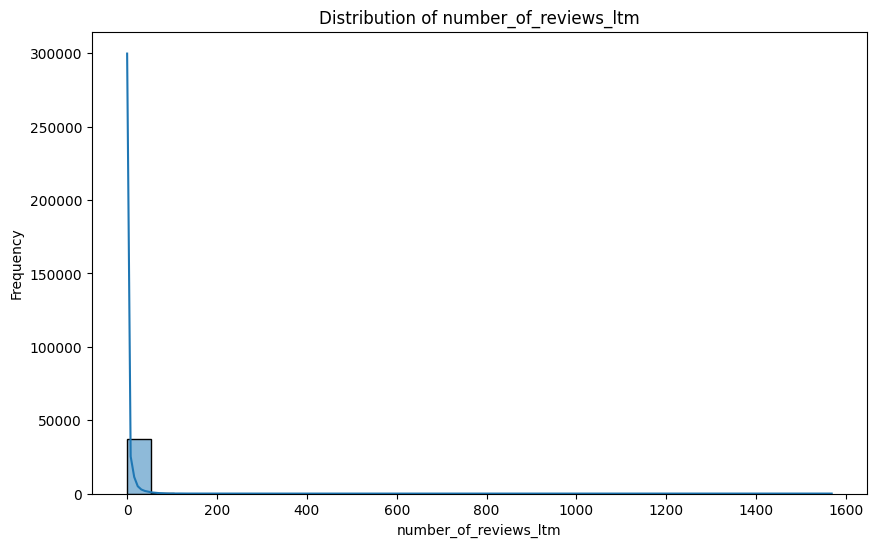

Distribution for number_of_reviews_l30d:
count    37765.000000
mean         0.298186
std          1.770795
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        151.000000
Name: number_of_reviews_l30d, dtype: float64




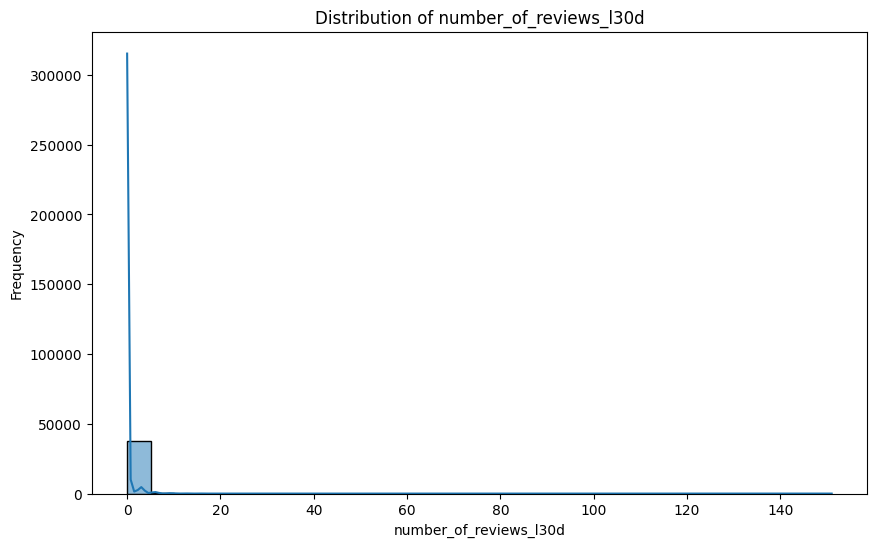

Distribution for review_scores_rating:
count    26014.000000
mean         4.727302
std          0.435394
min          0.000000
25%          4.650000
50%          4.850000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64




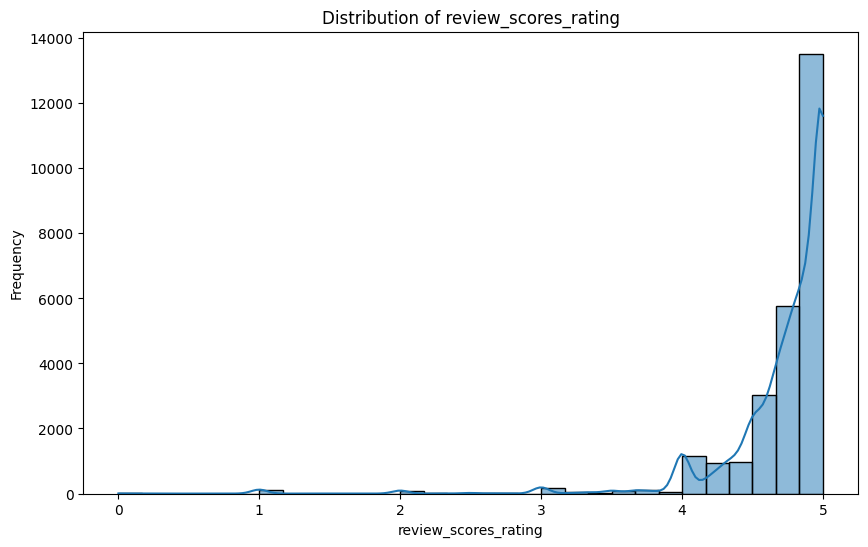

Distribution for review_scores_accuracy:
count    25997.000000
mean         4.768908
std          0.425137
min          0.000000
25%          4.710000
50%          4.900000
75%          5.000000
max          5.000000
Name: review_scores_accuracy, dtype: float64




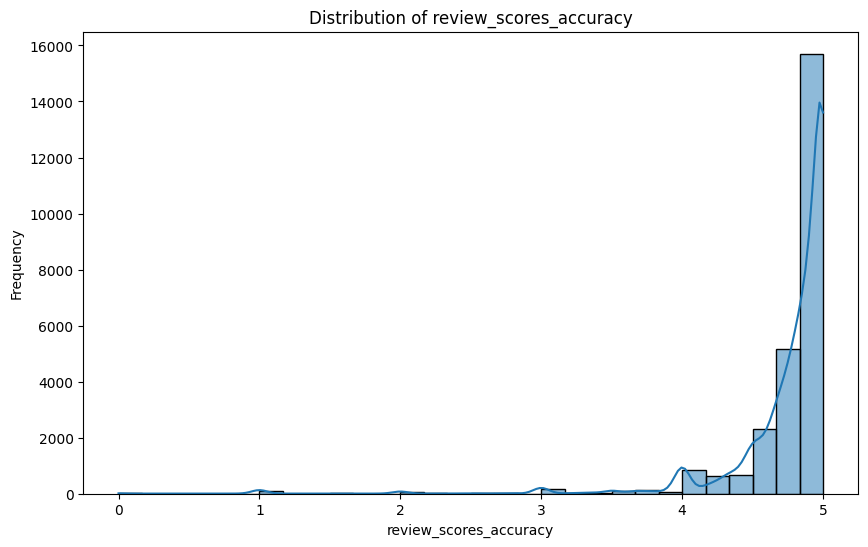

Distribution for review_scores_cleanliness:
count    26007.000000
mean         4.657396
std          0.497401
min          0.000000
25%          4.530000
50%          4.810000
75%          5.000000
max          5.000000
Name: review_scores_cleanliness, dtype: float64




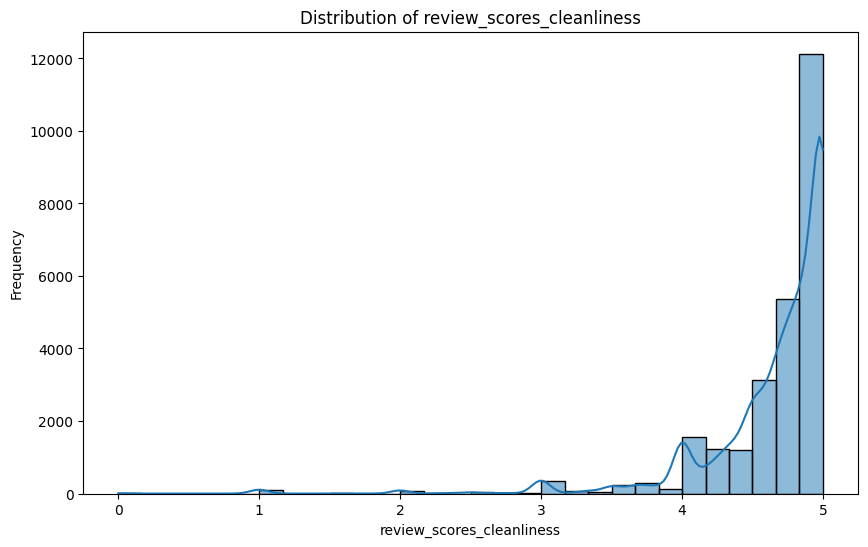

Distribution for review_scores_checkin:
count    25993.000000
mean         4.833691
std          0.372177
min          0.000000
25%          4.810000
50%          4.950000
75%          5.000000
max          5.000000
Name: review_scores_checkin, dtype: float64




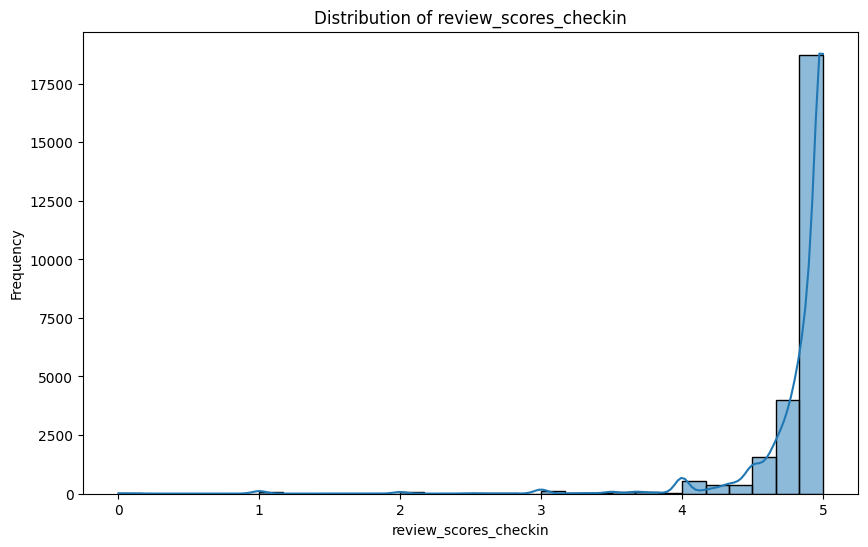

Distribution for review_scores_communication:
count    26002.000000
mean         4.829206
std          0.397304
min          0.000000
25%          4.820000
50%          4.960000
75%          5.000000
max          5.000000
Name: review_scores_communication, dtype: float64




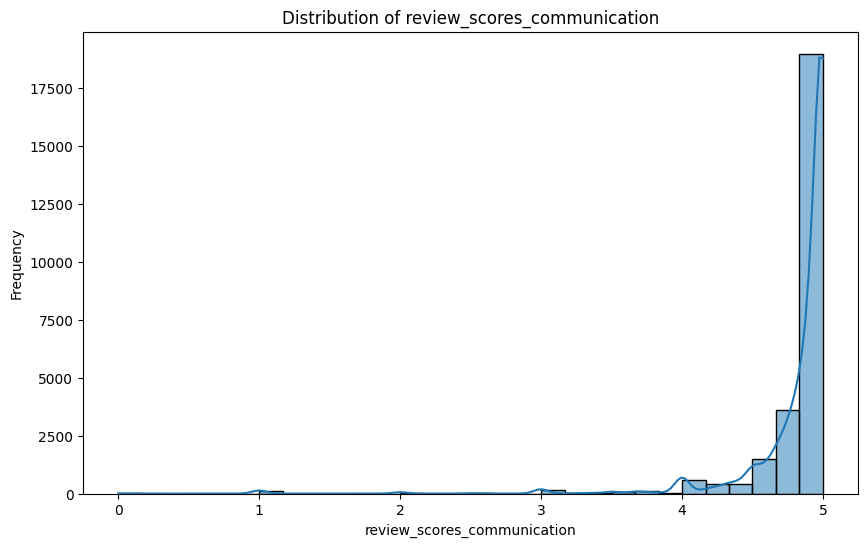

Distribution for review_scores_location:
count    25990.000000
mean         4.744020
std          0.387279
min          0.000000
25%          4.650000
50%          4.850000
75%          5.000000
max          5.000000
Name: review_scores_location, dtype: float64




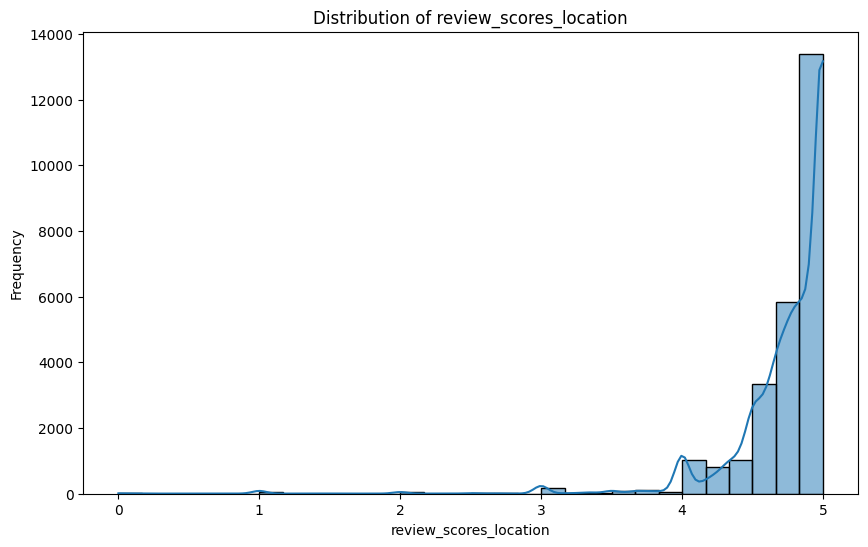

Distribution for review_scores_value:
count    25991.000000
mean         4.648907
std          0.475756
min          0.000000
25%          4.540000
50%          4.770000
75%          4.940000
max          5.000000
Name: review_scores_value, dtype: float64




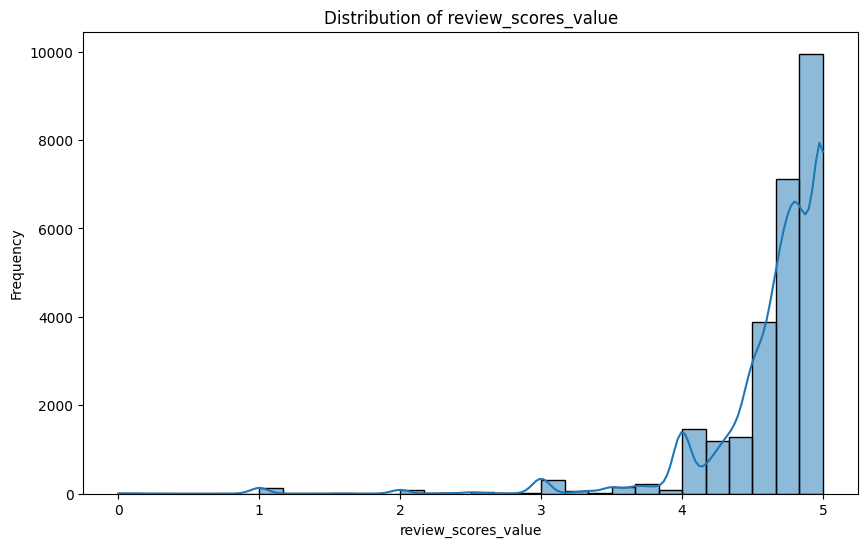

Distribution for calculated_host_listings_count:
count    37765.000000
mean        53.763035
std        161.979723
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max        842.000000
Name: calculated_host_listings_count, dtype: float64




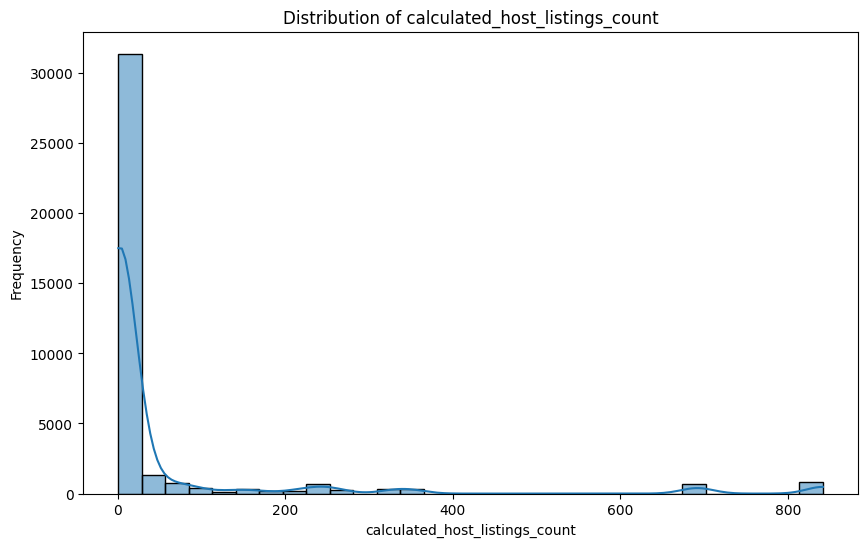

Distribution for calculated_host_listings_count_entire_homes:
count    37765.000000
mean        28.182947
std        128.796384
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        842.000000
Name: calculated_host_listings_count_entire_homes, dtype: float64




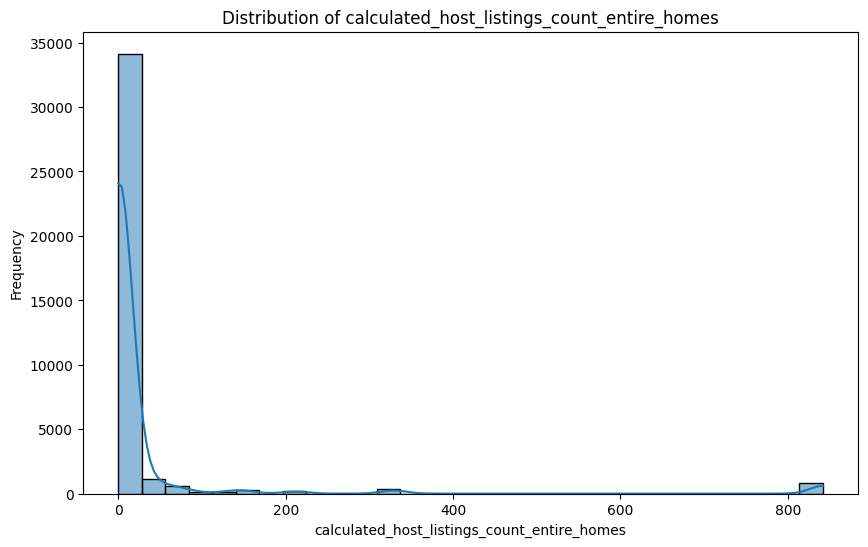

Distribution for calculated_host_listings_count_private_rooms:
count    37765.000000
mean        23.493208
std        102.986057
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        691.000000
Name: calculated_host_listings_count_private_rooms, dtype: float64




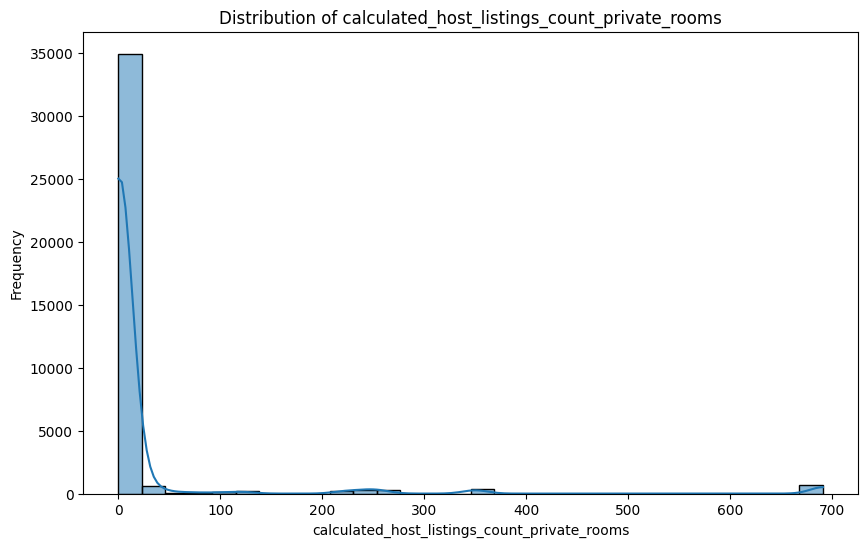

Distribution for calculated_host_listings_count_shared_rooms:
count    37765.000000
mean         0.077744
std          0.612594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: calculated_host_listings_count_shared_rooms, dtype: float64




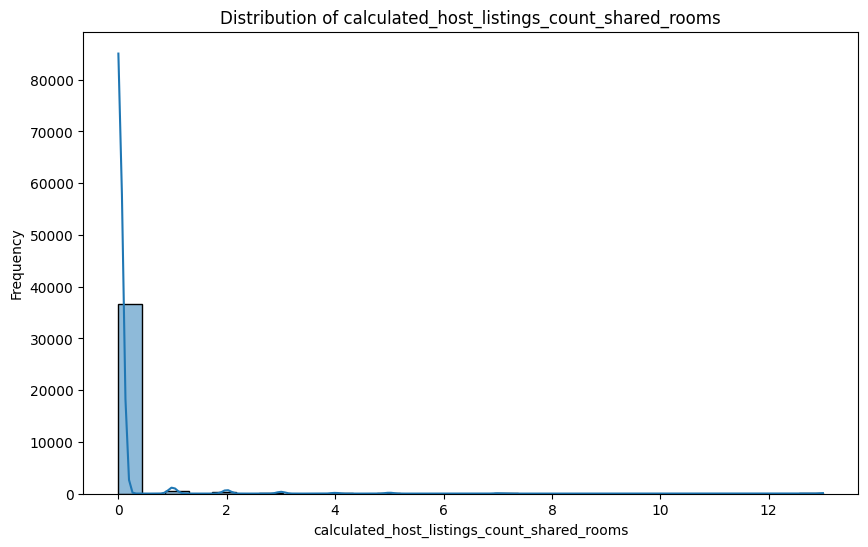

Distribution for reviews_per_month:
count    26014.000000
mean         0.905544
std          1.860784
min          0.010000
25%          0.090000
50%          0.320000
75%          1.130000
max        103.530000
Name: reviews_per_month, dtype: float64




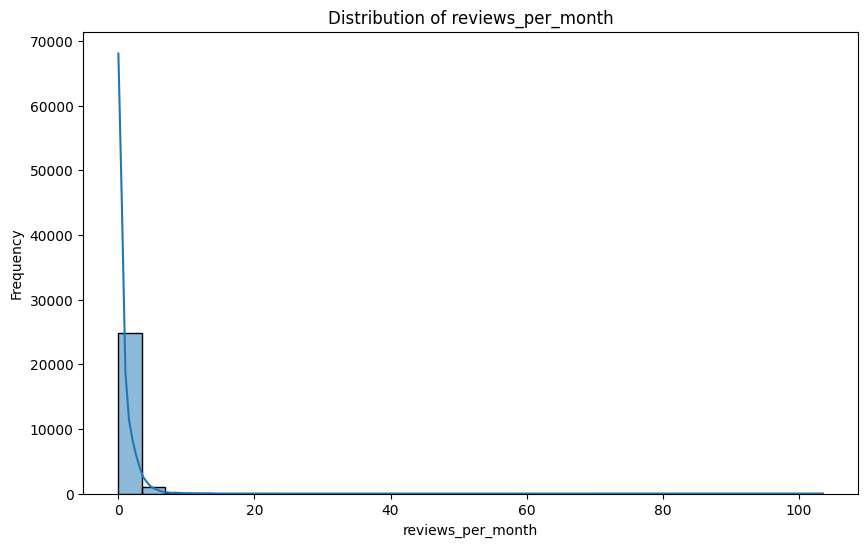

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'listings' is your DataFrame
def print_and_plot_numerical_distributions(listings):
    # Select only numerical columns
    numerical_cols = listings.select_dtypes(include=['number']).columns

    # Print distribution and plot for each numerical column
    for col in numerical_cols:
        print(f"Distribution for {col}:")
        print(listings[col].describe())
        print("\n")

        # Plot the distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(listings[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Example usage with the listings DataFrame
# listings = pd.read_csv('your_listings_dataset.csv')
print_and_plot_numerical_distributions(listings)


* most of the data columns is skewed

## Top 10 property types

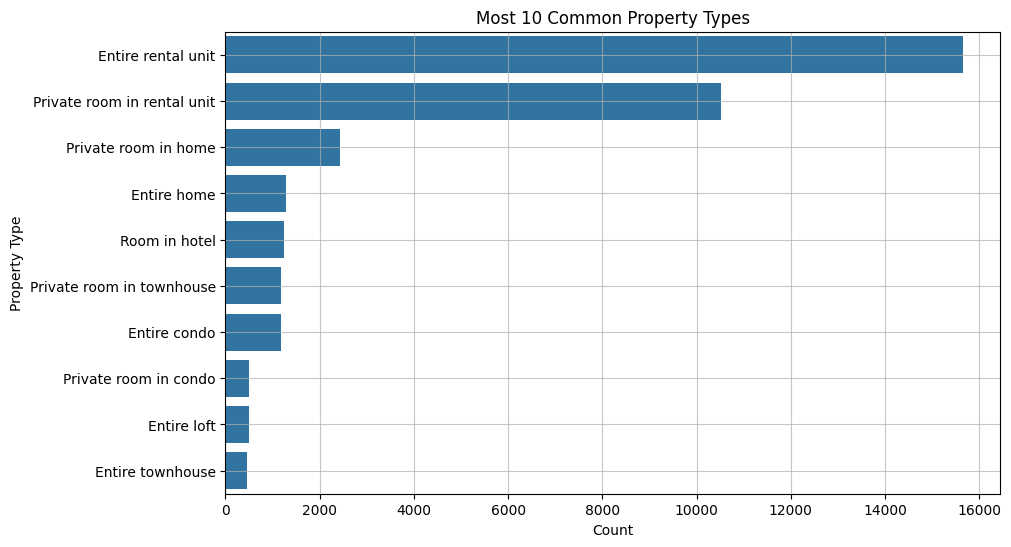

In [ ]:
# Extract the top 10 property types
top_property_types = listings['property_type'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 property types
top_property_types_df = listings[listings['property_type'].isin(top_property_types)]

# Bar Chart for Top 10 Property Types
plt.figure(figsize=(10, 6))
sns.countplot(data=top_property_types_df, y='property_type', order=top_property_types)

# Add grid
plt.grid(alpha=0.7)
plt.title('Most 10 Common Property Types')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Property Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 10 highest price Property Types

<ipython-input-29-0670cb8305ce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_property_types.values, y=top_10_property_types.index, palette='viridis')


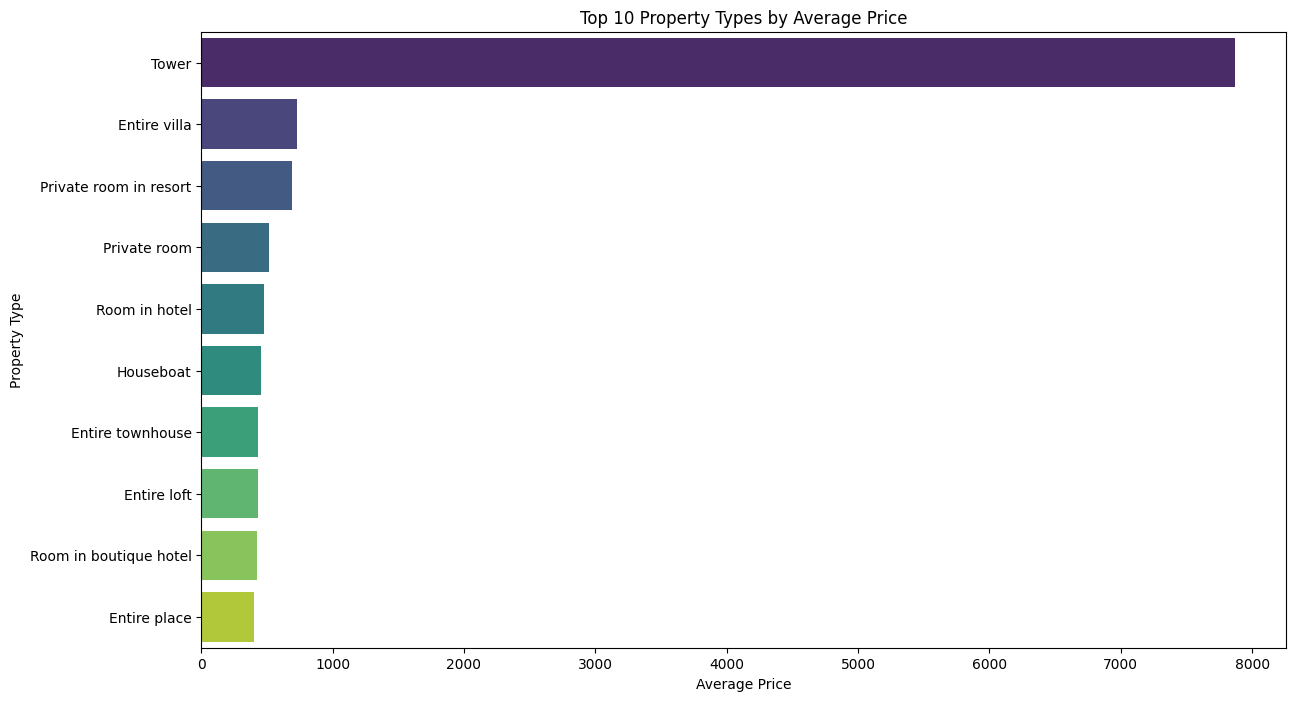

In [ ]:
# Calculate the average price for each property type
avg_price_by_property_type = listings.groupby('property_type')['price'].mean()

# Get the top 10 property types by average price
top_10_property_types = avg_price_by_property_type.nlargest(10)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_property_types.values, y=top_10_property_types.index, palette='viridis')
plt.title('Top 10 Property Types by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Property Type')
plt.show()


## The Cheapest 10  Property Types

<ipython-input-30-bb959df10357>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_property_types.values, y=bottom_10_property_types.index, palette='viridis')


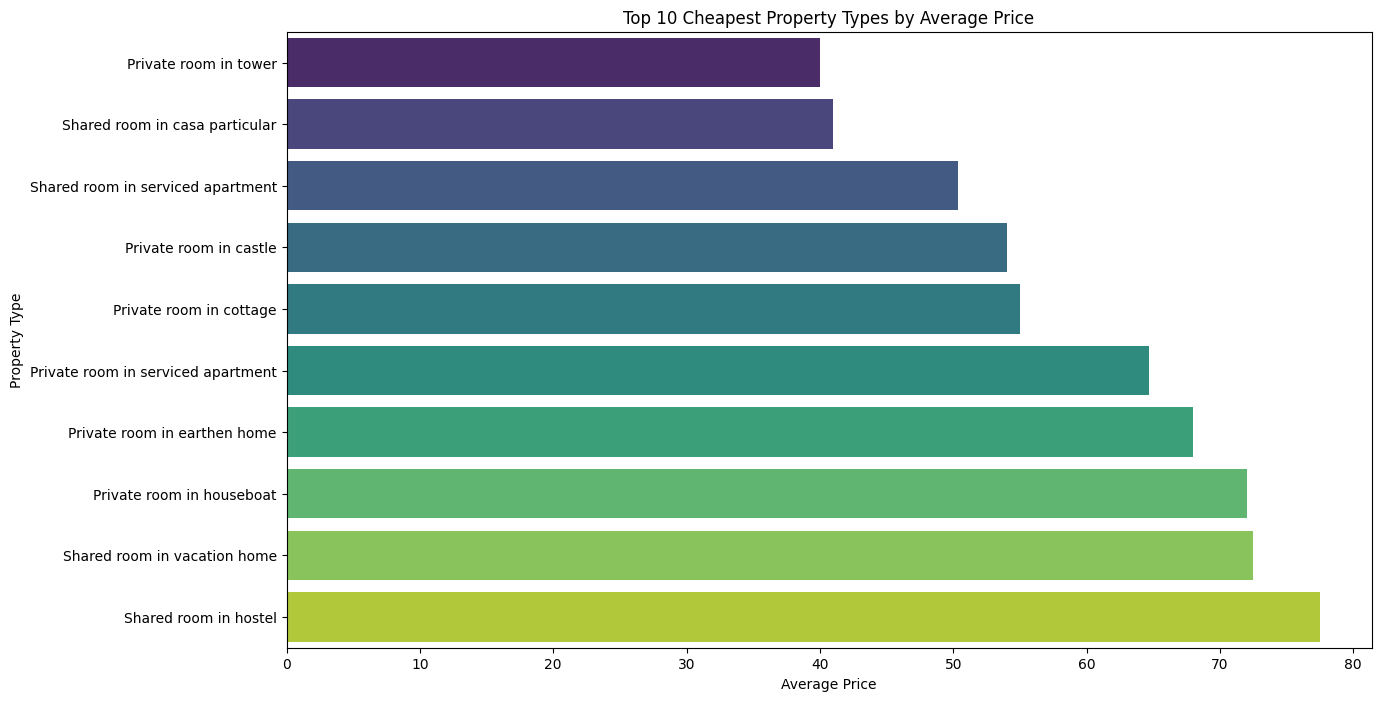

In [ ]:
# Calculate the average price for each property type
avg_price_by_property_type = listings.groupby('property_type')['price'].mean()

# Get the 10 cheapest property types by average price
bottom_10_property_types = avg_price_by_property_type.nsmallest(10)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=bottom_10_property_types.values, y=bottom_10_property_types.index, palette='viridis')
plt.title('Top 10 Cheapest Property Types by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Property Type')
plt.show()

## plot neighborhoods distribution

<ipython-input-31-430cf848ec32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_group_prices.index, y=neighborhood_group_prices.values, palette='viridis')


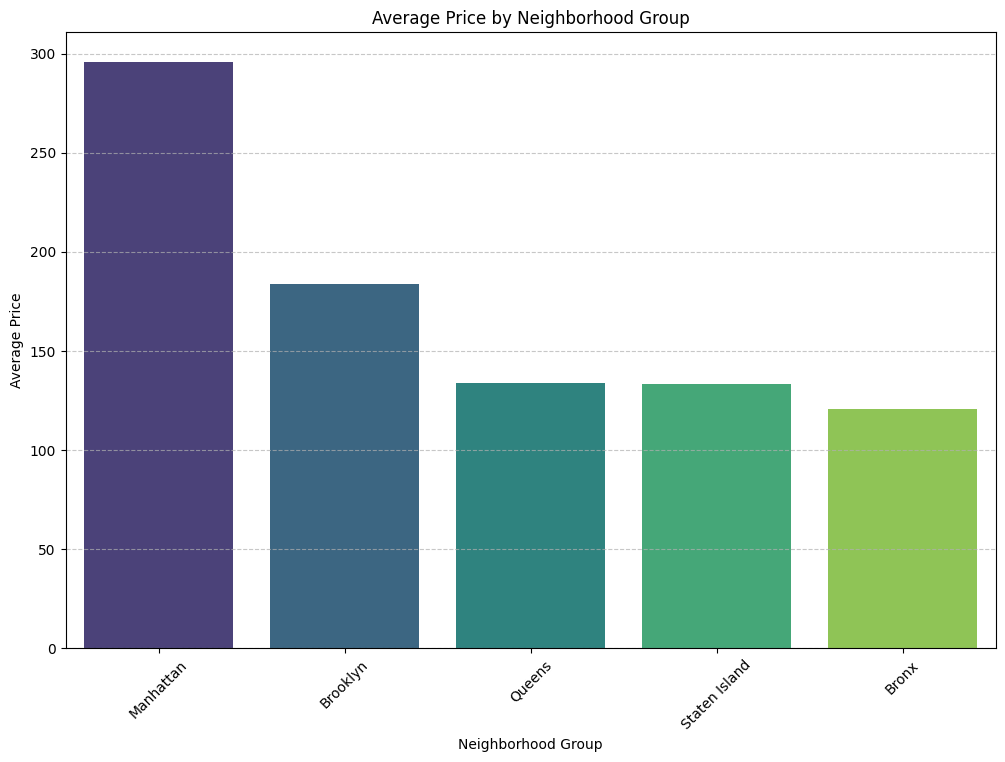

In [ ]:
# Group by neighborhood group and calculate the average price
neighborhood_group_prices = listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)

# Plot the average price by neighborhood group
plt.figure(figsize=(12, 8))
sns.barplot(x=neighborhood_group_prices.index, y=neighborhood_group_prices.values, palette='viridis')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Room Type

<ipython-input-32-c33028aff902>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_prices.index, y=room_type_prices.values, palette='viridis')


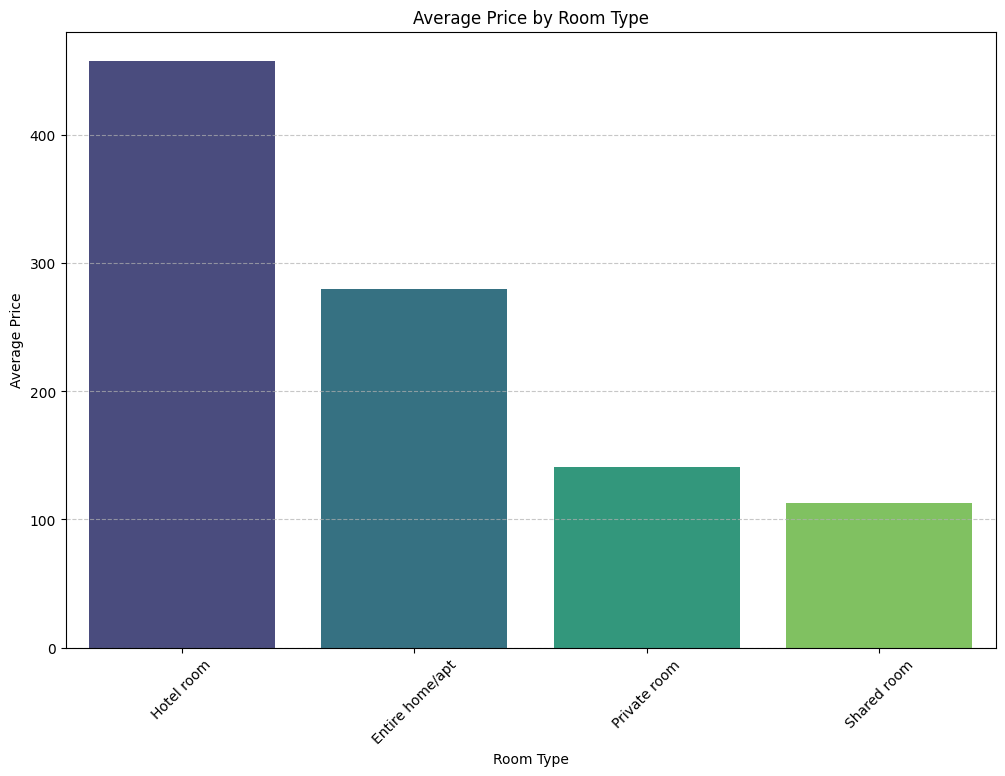

In [ ]:
# Group by room type and calculate the average price
room_type_prices = listings.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Plot the average price by room type
plt.figure(figsize=(12, 8))
sns.barplot(x=room_type_prices.index, y=room_type_prices.values, palette='viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Corr Matrix

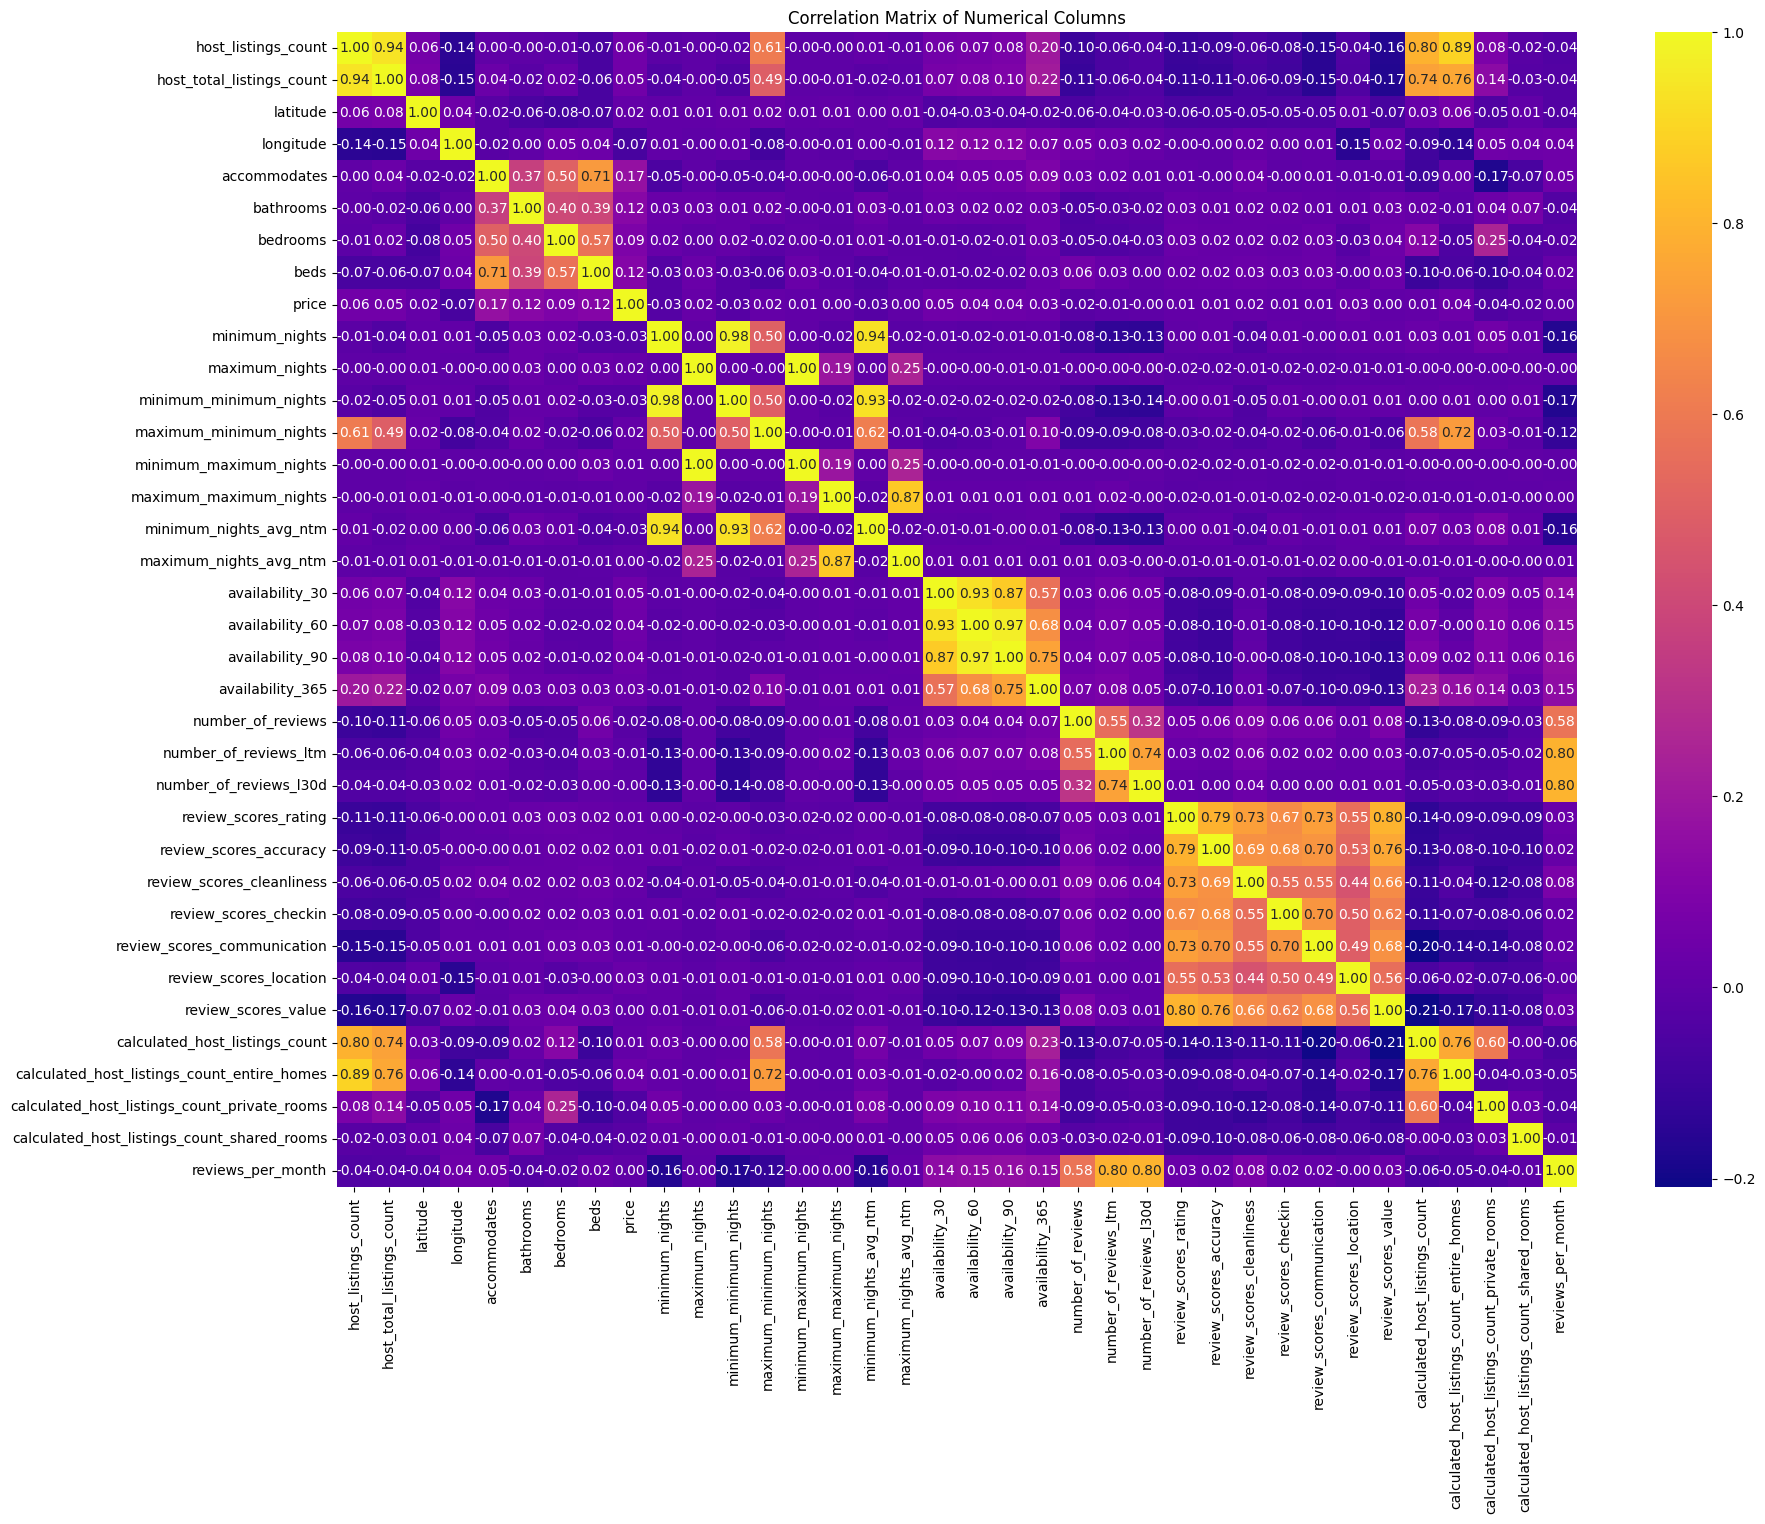

In [ ]:
# Calculate the correlation matrix
correlations=listings.drop(columns=['id','scrape_id','host_id','calendar_updated'])

correlation_matrix = correlations.select_dtypes(include=['number']).corr()


# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='plasma', cbar=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Price Distribution

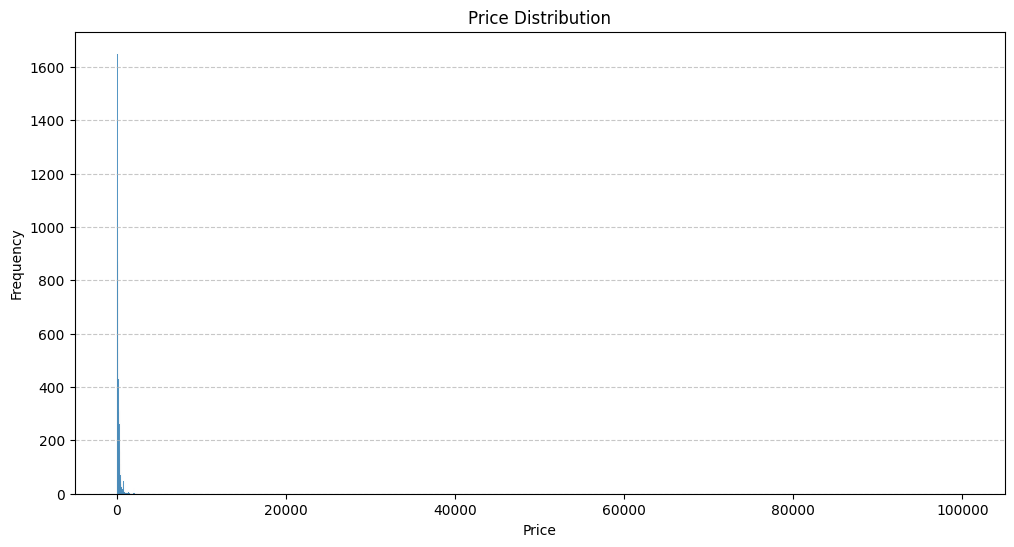

In [ ]:
# Plot the distribution of the price
plt.figure(figsize=(12, 6))
sns.histplot(listings['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

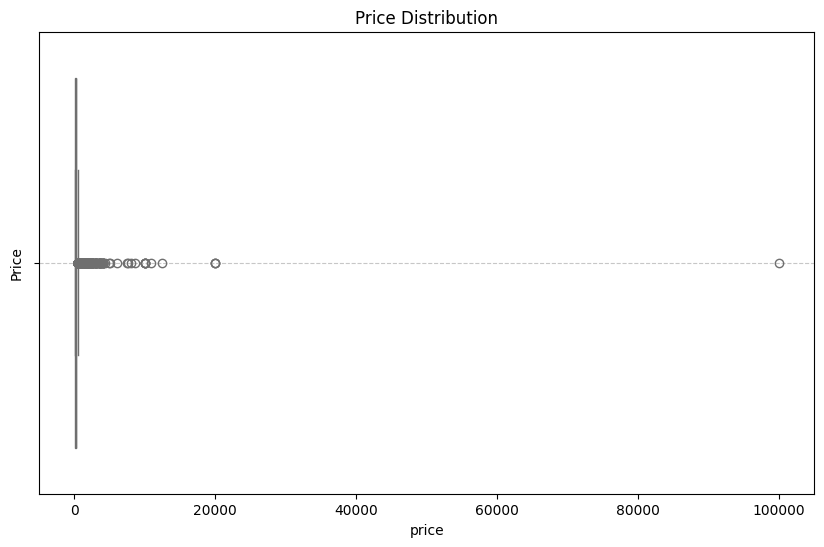

In [ ]:
# Box Plot for Price Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings, x='price', color='skyblue')
plt.title('Price Distribution')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## price in +- 3 STD

In [ ]:
# Calculate mean and standard deviation
mean_price = listings['price'].mean()
std_price = listings['price'].std()

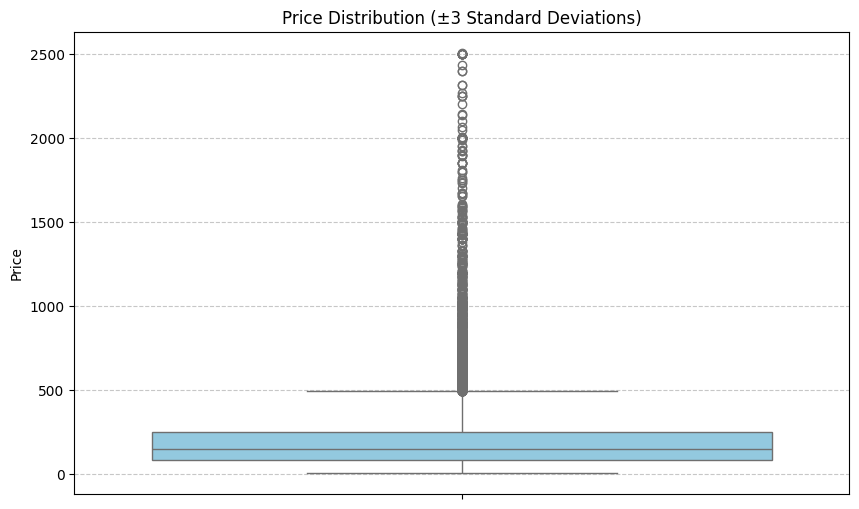

In [ ]:


# Filter data to include only values within ±3 standard deviations
filtered_df = listings[(listings['price'] >= mean_price - 3 * std_price) & (listings['price'] <= mean_price + 3 * std_price)]

# Box Plot for Price Distribution within ±3 Standard Deviations
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, y='price', color='skyblue')
plt.title('Price Distribution (±3 Standard Deviations)')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## price in +- 1 STD

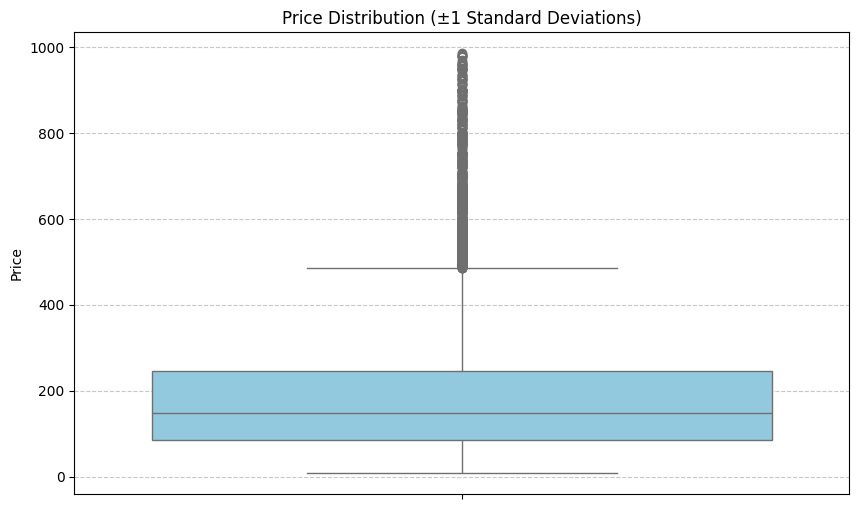

In [ ]:
# Filter data to include only values within ±3 standard deviations
filtered_df = listings[(listings['price'] >= mean_price -  std_price) & (listings['price'] <= mean_price + std_price)]

# Box Plot for Price Distribution within ±3 Standard Deviations
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, y='price', color='skyblue')
plt.title('Price Distribution (±1 Standard Deviations)')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

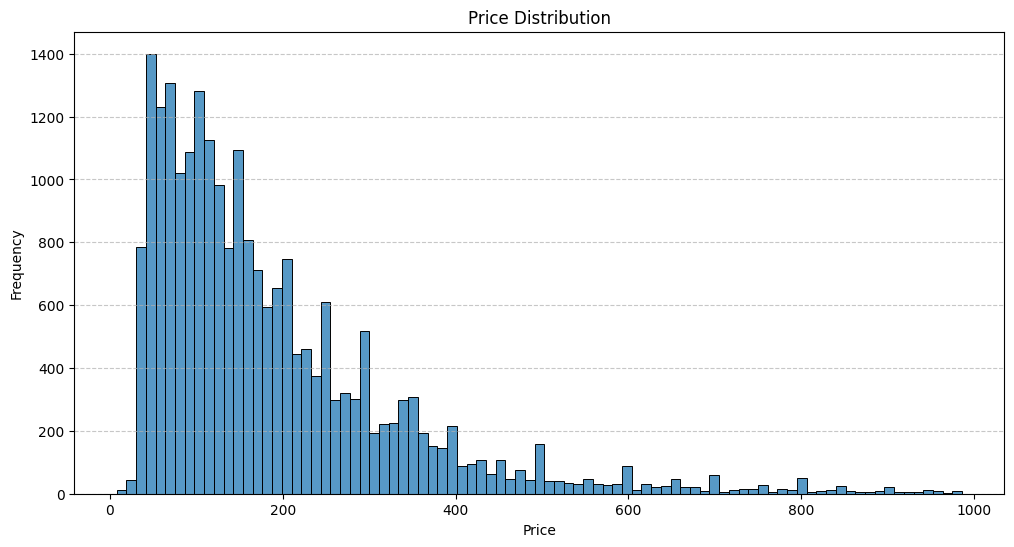

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## price vs most common neighborhoods

<ipython-input-40-5d023cd13c48>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_neighborhood.values, y=avg_price_by_neighborhood.index, palette='viridis')


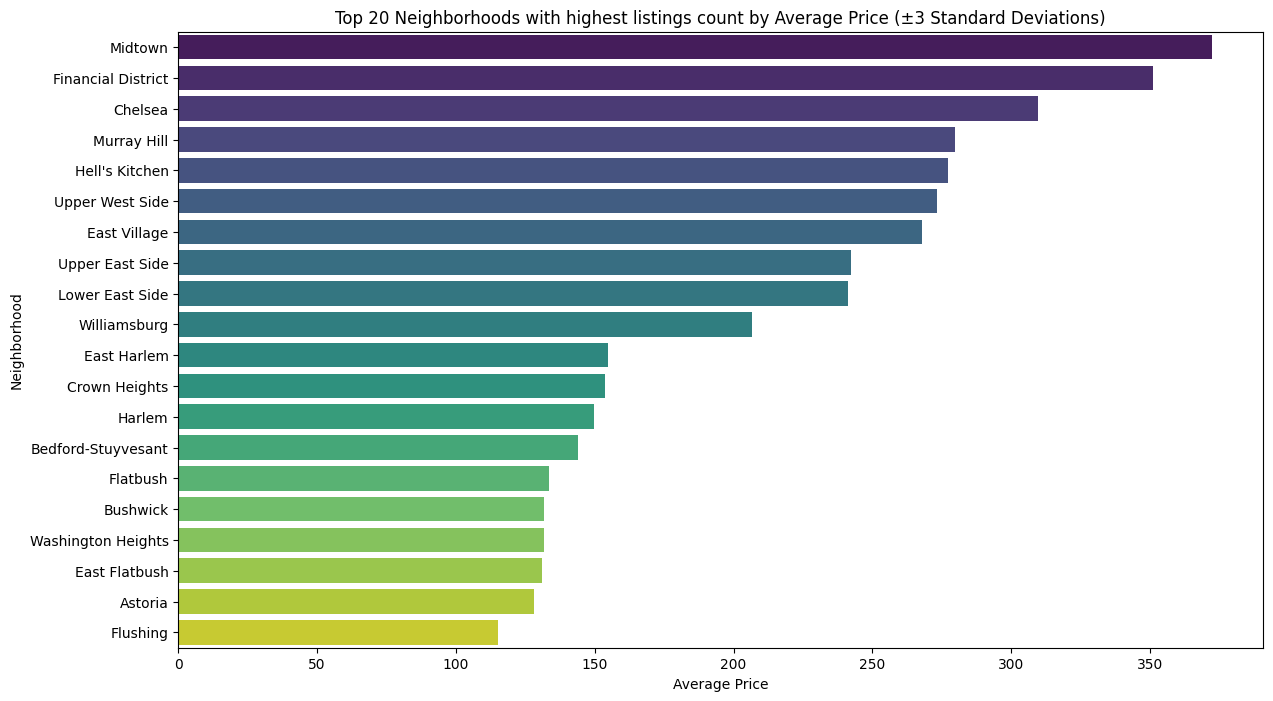

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean and standard deviation
mean_price = listings['price'].mean()
std_price = listings['price'].std()

# Filter data to include only values within ±3 standard deviations
filtered_df = listings[(listings['price'] >= mean_price - 3 * std_price) & (listings['price'] <= mean_price + 3 * std_price)]

# Get the top neighborhoods by count
top_neighborhoods = filtered_df['neighbourhood_cleansed'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top neighborhoods
top_neighborhoods_df = filtered_df[filtered_df['neighbourhood_cleansed'].isin(top_neighborhoods)]

# Calculate the average price for each top neighborhood
avg_price_by_neighborhood = top_neighborhoods_df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_price_by_neighborhood.values, y=avg_price_by_neighborhood.index, palette='viridis')
plt.title('Top 20 Neighborhoods with highest listings count by Average Price (±3 Standard Deviations)')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


## price vs luxury neighborhoods

<ipython-input-15-32e9352fbb55>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='viridis')


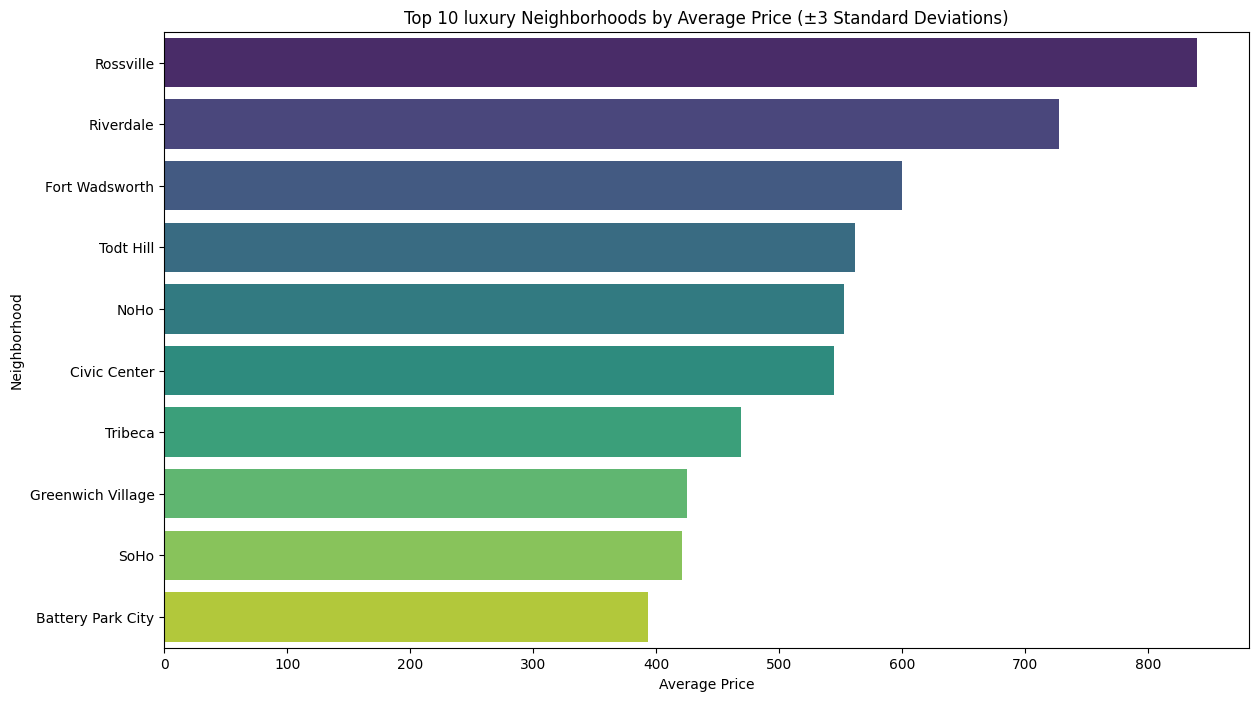

In [15]:
# Calculate mean and standard deviation
mean_price = listings['price'].mean()
std_price = listings['price'].std()

# Filter data to include only values within ±3 standard deviations
filtered_listings = listings[(listings['price'] >= mean_price - 3 * std_price) & (listings['price'] <= mean_price + 3 * std_price)]

# Calculate the average price for each neighborhood
avg_price_by_neighborhood = filtered_listings.groupby('neighbourhood_cleansed')['price'].mean()

# Get the top 10 neighborhoods by average price
top_10_neighborhoods = avg_price_by_neighborhood.nlargest(10)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='viridis')
plt.title('Top 10 luxury Neighborhoods by Average Price (±3 Standard Deviations)')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


* we can see that that midtown - finaicial district and chelsea is the highest renting price that can be found

The cheapest neighborhoods

<ipython-input-14-f57a5f83b65b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='viridis')


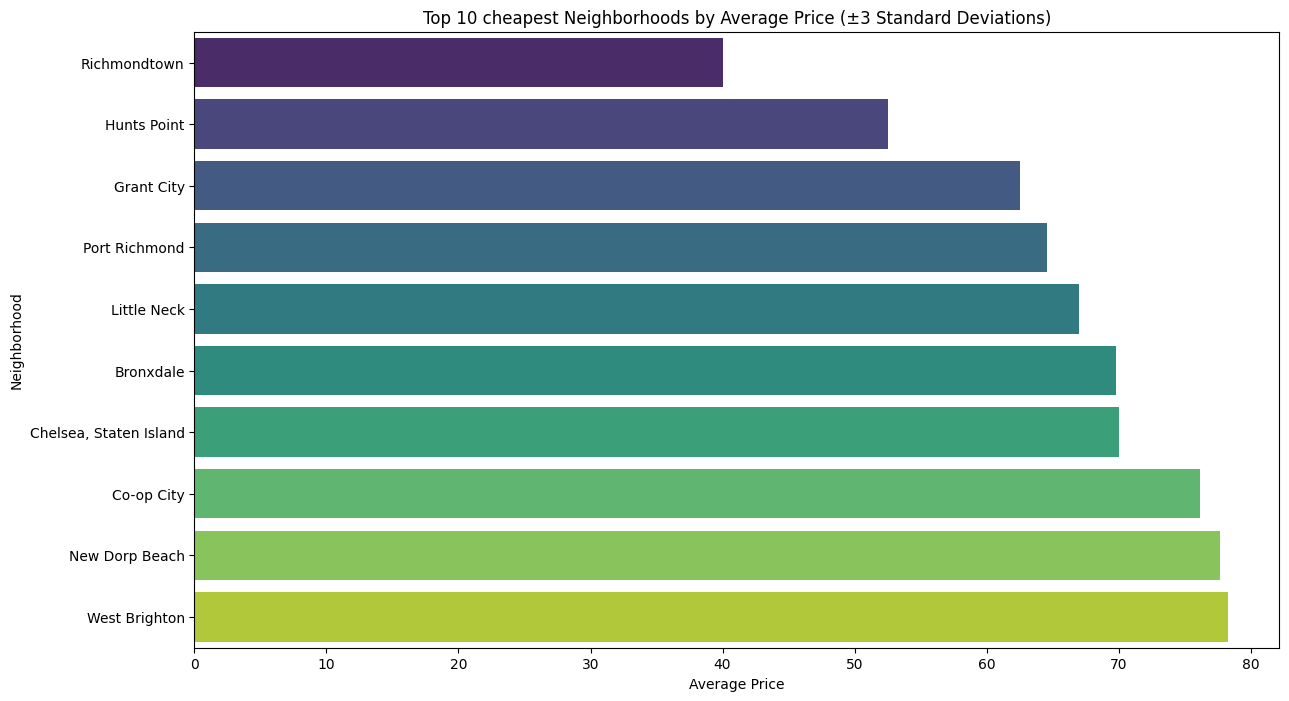

In [14]:
# Calculate mean and standard deviation
mean_price = listings['price'].mean()
std_price = listings['price'].std()

# Filter data to include only values within ±3 standard deviations
filtered_listings = listings[(listings['price'] >= mean_price - 3 * std_price) & (listings['price'] <= mean_price + 3 * std_price)]

# Calculate the average price for each neighborhood
avg_price_by_neighborhood = filtered_listings.groupby('neighbourhood_cleansed')['price'].mean()

# Get the top 10 neighborhoods by average price
top_10_neighborhoods = avg_price_by_neighborhood.nsmallest(10)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='viridis')
plt.title('Top 10 cheapest Neighborhoods by Average Price (±3 Standard Deviations)')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


# Data Cleaning

price valus is missing 0.38 of its values so lets get those missing values  from the calendar data set

### drop na values

In [ ]:
# ['host_id','host_location','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_neighbourhood'
# 'host_listings_count','host_total_listings_count','host_has_profile_pic','host_identity_verified','neighbourhood'
# 'latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_location','review_scores_value']

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37764 entries, 0 to 13783499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  37764 non-null  int64  
 1   price       37764 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 885.1 KB


## merge listings and calendar to git missing price

In [16]:
# Merge the DataFrames on listing_id (or id in listings DataFrame)
merged_df = pd.merge(listings, calendar, left_on='id', right_on='listing_id', how='left', suffixes=('_listing', '_calendar'))

# Fill missing price values in listings DataFrame using price from calendar
merged_df['price_listing'] = merged_df['price_listing'].fillna(merged_df['price_calendar'])

# Drop unnecessary columns
final_df = merged_df.drop(columns=['listing_id', 'price_calendar'])

# Rename columns to match original listings DataFrame
final_df.rename(columns={'price_listing': 'price'}, inplace=True)

# Display the updated listings DataFrame
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37765 non-null  int64  
 1   listing_url                                   37765 non-null  object 
 2   scrape_id                                     37765 non-null  int64  
 3   last_scraped                                  37765 non-null  object 
 4   source                                        37765 non-null  object 
 5   name                                          37763 non-null  object 
 6   description                                   36675 non-null  object 
 7   neighborhood_overview                         21296 non-null  object 
 8   picture_url                                   37764 non-null  object 
 9   host_id                                       37765 non-null 

## drop the useless columns or columns with most values null

In [ ]:
final_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [17]:
final_df.drop(columns=['id','scrape_id','host_id','calendar_updated',"license"],inplace=True)

In [ ]:
final_df.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability

# Experiment 1 : Taking only Numerical Columns

In [18]:
# Get numerical columns
numerical_columns = final_df.select_dtypes(include=['number'])
numerical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           37760 non-null  float64
 1   host_total_listings_count                     37760 non-null  float64
 2   latitude                                      37765 non-null  float64
 3   longitude                                     37765 non-null  float64
 4   accommodates                                  37765 non-null  int64  
 5   bathrooms                                     23172 non-null  float64
 6   bedrooms                                      31882 non-null  float64
 7   beds                                          22988 non-null  float64
 8   price                                         37764 non-null  float64
 9   minimum_nights                                37765 non-null 

## drop ids columns and location columns

In [19]:
numerical_columns_ex1=numerical_columns.copy()

In [20]:
price=numerical_columns_ex1['price']
numerical_columns_ex1.drop(columns=['price'],inplace=True)

In [21]:
numerical_columns_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           37760 non-null  float64
 1   host_total_listings_count                     37760 non-null  float64
 2   latitude                                      37765 non-null  float64
 3   longitude                                     37765 non-null  float64
 4   accommodates                                  37765 non-null  int64  
 5   bathrooms                                     23172 non-null  float64
 6   bedrooms                                      31882 non-null  float64
 7   beds                                          22988 non-null  float64
 8   minimum_nights                                37765 non-null  int64  
 9   maximum_nights                                37765 non-null 

## Impute missing values

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [24]:
# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the numerical columns and transform the data

numerical_columns_ex1 = pd.DataFrame(imputer.fit_transform(numerical_columns_ex1), columns=numerical_columns_ex1.columns)

# Fit the imputer on the price column and impute it
pricee=imputer.fit_transform(price.values.reshape(-1, 1))

In [ ]:
numerical_columns_ex1.info(),len(price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           37765 non-null  float64
 1   host_total_listings_count                     37765 non-null  float64
 2   latitude                                      37765 non-null  float64
 3   longitude                                     37765 non-null  float64
 4   accommodates                                  37765 non-null  float64
 5   bathrooms                                     37765 non-null  float64
 6   bedrooms                                      37765 non-null  float64
 7   beds                                          37765 non-null  float64
 8   minimum_nights                                37765 non-null  float64
 9   maximum_nights                                37765 non-null 

(None, 37765)

## splitting the data and Training the model

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_columns_ex1, pricee, test_size=0.1, random_state=42)

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')

Root Mean Squared Error: 507.68580392537217
R²: 0.30


# Experiment 2 : choosing specific columns with low collinearity

In [26]:
numerical_columns.columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

## Taking only important not correlated columns

In [27]:
numerical=numerical_columns[['host_listings_count','accommodates','minimum_nights', 'maximum_nights','availability_365','number_of_reviews','review_scores_rating','reviews_per_month']]

## imputing data

In [28]:
# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', or a constant value instead

# Fit the imputer on the numerical columns and transform the data

numerical_columns_ex2 = pd.DataFrame(imputer.fit_transform(numerical), columns=numerical.columns)


# Fit the imputer on the price column and impute it
pricee=imputer.fit_transform(price.values.reshape(-1, 1))

## Scalling Data

In [29]:
# Apply standardization
scaler = StandardScaler()

scaled_df =pd.DataFrame(scaler.fit_transform(numerical_columns_ex2), columns=numerical_columns_ex2.columns)

scaled_df.head()

host_listings_count  accommodates  minimum_nights  maximum_nights  \
0            -0.242503     -0.916363         0.02766       -0.005145   
1            -0.249829      0.643892         0.02766       -0.005180   
2            -0.249829      0.123807         0.02766       -0.005180   
3            -0.248608     -0.916363         0.02766       -0.005230   
4            -0.249829     -0.916363         0.02766       -0.005213   

   availability_365  number_of_reviews  review_scores_rating  \
0          1.033565           0.409872             -0.130903   
1         -0.570127          -0.355417              0.062813   
2          0.284242           2.858796             -0.407639   
3          1.488762          -0.406436              0.754655   
4          0.417299           3.777142              0.422571   

   reviews_per_month  
0          -0.405053  
1          -0.566933  
2           0.093538  
3          -0.560458  
4           0.307220

## try the model with data scaling

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, pricee, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')

Root Mean Squared Error: 1340.9287457059909
R²: -0.04


## try the model without scaling

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numerical_columns_ex2, pricee, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')

Root Mean Squared Error: 1340.9287457059909
R²: -0.04


* taking only part of the data lead to loosing information that the model needed

# Experiment 3 Taking only non null values without any imputing

## view data Columns

In [ ]:
listings .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37765 non-null  int64  
 1   listing_url                                   37765 non-null  object 
 2   scrape_id                                     37765 non-null  int64  
 3   last_scraped                                  37765 non-null  object 
 4   source                                        37765 non-null  object 
 5   name                                          37763 non-null  object 
 6   description                                   36675 non-null  object 
 7   neighborhood_overview                         21296 non-null  object 
 8   picture_url                                   37764 non-null  object 
 9   host_id                                       37765 non-null 

## remove & from price and chage its type to float

In [32]:
if listings['price'].dtype != float:
    listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


## drop columns that contain big number of null values

In [33]:
listings.drop(columns=['calendar_updated','license'],inplace=True)

## drop null values

In [34]:
listings.dropna(inplace=True)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 3 to 36869
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4457 non-null   int64  
 1   listing_url                                   4457 non-null   object 
 2   scrape_id                                     4457 non-null   int64  
 3   last_scraped                                  4457 non-null   object 
 4   source                                        4457 non-null   object 
 5   name                                          4457 non-null   object 
 6   description                                   4457 non-null   object 
 7   neighborhood_overview                         4457 non-null   object 
 8   picture_url                                   4457 non-null   object 
 9   host_id                                       4457 non-null   int64

## using only numerical

In [ ]:
new_Df=listings.select_dtypes(include=['number'])

In [ ]:
new_Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 3 to 36869
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4457 non-null   int64  
 1   scrape_id                                     4457 non-null   int64  
 2   host_id                                       4457 non-null   int64  
 3   host_listings_count                           4457 non-null   float64
 4   host_total_listings_count                     4457 non-null   float64
 5   latitude                                      4457 non-null   float64
 6   longitude                                     4457 non-null   float64
 7   accommodates                                  4457 non-null   int64  
 8   bathrooms                                     4457 non-null   float64
 9   bedrooms                                      4457 non-null   float

In [ ]:
new_Df.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      d

In [ ]:
new_Df.drop(columns=['id', 'scrape_id', 'host_id'],inplace=True)

## split the data into training and testing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_Df.drop(columns=['price']), new_Df['price'], test_size=0.1, random_state=42)


## using xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')

Root Mean Squared Error: 84.68986619252539
R²: 0.75


## using Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the model with custom parameters
model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the Random Forest model
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')


Root Mean Squared Error: 88.5914922030699
R²: 0.73


# Experiment 4 the same data set with standarization

## splitting the data

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_Df.drop(columns=['price']), new_Df['price'], test_size=0.1, random_state=42)


## using minmax scaler

In [ ]:

scaler = MinMaxScaler()

X_train_scaled =pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled =pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

X_train_scaled.head()

host_listings_count  host_total_listings_count  latitude  longitude  \
0             0.001509                   0.001760  0.448354   0.599037   
1             0.000431                   0.000377  0.392679   0.488364   
2             0.000216                   0.000251  0.460627   0.518915   
3             0.000000                   0.000251  0.527630   0.748122   
4             0.001078                   0.002640  0.652022   0.622717   

   accommodates  bathrooms  bedrooms      beds  minimum_nights  \
0      0.066667   0.095238  0.111111  0.071429         0.07967   
1      0.066667   0.095238  0.222222  0.142857         0.07967   
2      0.200000   0.095238  0.222222  0.142857         0.07967   
3      0.066667   0.095238  0.111111  0.071429         0.00000   
4      0.000000   0.095238  0.111111  0.071429         0.07967   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0        0.077540                 0.07967                0.029029   
1        1.000000                 0.07967                0.029029   
2        1.000000                 0.07967                0.029029   
3        0.157754                 0.00000                0.000000   
4        0.049911                 0.07967                0.029029   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                1.000000                1.000000                0.058895   
1                1.000000                1.000000                0.058895   
2                1.000000                1.000000                0.058895   
3                0.159253                0.157754                0.000000   
4                0.051601                0.049911                0.058895   

   maximum_nights_avg_ntm  availability_30  availability_60  availability_90  \
0                1.000000         1.000000         1.000000         1.000000   
1                1.000000         0.000000         0.000000         0.033333   
2                1.000000         0.966667         0.983333         0.988889   
3                0.157754         0.066667         0.133333         0.200000   
4                0.049911         0.000000         0.500000         0.666667   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0          0.493151           0.090523               0.026239   
1          0.254795           0.253182               0.002915   
2          0.490411           0.137199               0.020408   
3          0.802740           0.086280               0.104956   
4          0.917808           0.025460               0.005831   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                    0.00                0.9700                  0.9550   
1                    0.00                0.9600                  0.9775   
2                    0.00                0.9075                  0.9450   
3                    0.25                0.8675                  0.8625   
4                    0.00                0.9600                  0.9200   

   review_scores_cleanliness  review_scores_checkin  \
0                     0.9650                 0.9800   
1                     0.9675                 0.9925   
2                     0.8900                 0.9750   
3                     0.8100                 0.9150   
4                     0.9600                 1.0000   

   review_scores_communication  review_scores_location  review_scores_value  \
0                       0.9875                  0.9375               0.9625   
1                       0.9900                  0.9700               0.9625   
2                       0.9650                  0.9400               0.9025   
3                       0.9025                  0.9225               0.8800   
4                       1.0000                  0.9725               0.9350   

   calculated_host_listings_count  \
0                        0.005945   
1                        0.002378   
2                        0.001189   
3     

In [ ]:

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train_scaled, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')

Root Mean Squared Error: 289.38703672609165
R²: -1.91


* Scaling is not making any useful effect on the model

In [ ]:
new_Df.shape

(4457, 36)

# Experiment 5 using catboost with categorical features

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 11.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 3 to 36869
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4457 non-null   int64  
 1   listing_url                                   4457 non-null   object 
 2   scrape_id                                     4457 non-null   int64  
 3   last_scraped                                  4457 non-null   object 
 4   source                                        4457 non-null   object 
 5   name                                          4457 non-null   object 
 6   description                                   4457 non-null   object 
 7   neighborhood_overview                         4457 non-null   object 
 8   picture_url                                   4457 non-null   object 
 9   host_id                                       4457 non-null   int64

In [ ]:
listings.head().T

3   \
id                                                                                         6872   
listing_url                                                   https://www.airbnb.com/rooms/6872   
scrape_id                                                                        20240705150938   
last_scraped                                                                         2024-07-05   
source                                                                              city scrape   
name                                          Uptown Sanctuary w/ Private Bath (Month to Month)   
description                                   A charming month-to-month home away from home ...   
neighborhood_overview                         This sweet Harlem sanctuary is a 10-20 minute ...   
picture_url                                   https://a0.muscache.com/pictures/miso/Hosting-...   
host_id                                                                                   16104   
host_url                                                https://www.airbnb.com/users/show/16104   
host_name                                                                                   Kae   
host_since                                                                           2009-05-07   
host_location                                                                      New York, NY   
host_about                                    A former life in fashion and wellness has left...   
host_response_time                                                                 within a day   
host_response_rate                                                                          50%   
host_acceptance_rate                                                                         0%   
host_is_superhost                                                                             f   
host_thumbnail_url                            https://a0.muscache.com/im/pictures/user/d865a...   
host_picture_url                              https://a0.muscache.com/im/pictures/user/d865a...   
host_neighbourhood                                                                  East Harlem   
host_listings_count                                                                         2.0   
host_total_listings_count                                                                   2.0   
host_verifications                                             ['email', 'phone', 'work_email']   
host_has_profile_pic                                                                          t   
host_identity_verified                                                                        t   
neighbourhood                                                           Neighborhood highlights   
neighbourhood_cleansed                                                              East Harlem   
neighbourhood_group_cleansed                                                          Manhattan   
latitude                                                                               40.80107   
longitude                                                                             -73.94255   
property_type                                                             Private room in condo   
room_type                                                                          Private room   
accommodates                                                                                  1   
bathrooms                                                                                   1.0   
bathrooms_text                                                                    1 shared bath   
bedrooms                                                                                    1.0   
beds                                                                                        1.0   
amenities                                     ["Smoke alarm", "Fire extinguisher", "Heating"...   
price                             

In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ha

## drop categorical non beneficial  columns

In [ ]:
new_df=listings.drop(columns=['id', 'listing_url','scrape_id', 'host_id','last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_url'
       , 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
          'bathrooms_text','calendar_last_scraped', 'first_review', 'last_review'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 3 to 36869
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            4457 non-null   object 
 1   host_response_rate                            4457 non-null   object 
 2   host_acceptance_rate                          4457 non-null   object 
 3   host_is_superhost                             4457 non-null   object 
 4   host_thumbnail_url                            4457 non-null   object 
 5   host_picture_url                              4457 non-null   object 
 6   host_neighbourhood                            4457 non-null   object 
 7   host_listings_count                           4457 non-null   float64
 8   host_total_listings_count                     4457 non-null   float64
 9   host_has_profile_pic                          4457 non-null   objec

## tain the model on 80% of the data

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd



# Split the data into train and test sets
X = new_df.drop('price', axis=1)
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the text feature
text_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create Pool objects for train and test sets
train_pool = Pool(X_train,label=y_train, cat_features=text_features)
test_pool = Pool(X_test,label=y_test, cat_features=text_features)

# Define the CatBoost model
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1,depth=5, n_estimators=2000,random_seed=42)#iterations=1000, depth=10, learning_rate=0.1, loss_function='RMSE', random_seed=42, verbose=0)

# Train the CatBoost model
model.fit(train_pool, eval_set=test_pool, plot=True)

# Predict the target on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 204.4295978	test: 153.5038484	best: 153.5038484 (0)	total: 63.2ms	remaining: 2m 6s
1:	learn: 197.3605492	test: 148.2953785	best: 148.2953785 (1)	total: 77.3ms	remaining: 1m 17s
2:	learn: 190.4086551	test: 142.9544310	best: 142.9544310 (2)	total: 88.7ms	remaining: 59s
3:	learn: 183.3166758	test: 138.1652306	best: 138.1652306 (3)	total: 99.4ms	remaining: 49.6s
4:	learn: 177.4073737	test: 133.8767663	best: 133.8767663 (4)	total: 117ms	remaining: 46.7s
5:	learn: 171.7621717	test: 129.2006283	best: 129.2006283 (5)	total: 129ms	remaining: 43s
6:	learn: 167.4163023	test: 125.8401175	best: 125.8401175 (6)	total: 140ms	remaining: 40s
7:	learn: 163.2729805	test: 124.2699659	best: 124.2699659 (7)	total: 152ms	remaining: 37.9s
8:	learn: 158.8388176	test: 121.7587983	best: 121.7587983 (8)	total: 163ms	remaining: 36.2s
9:	learn: 155.5491287	test: 119.1095732	best: 119.1095732 (9)	total: 174ms	remaining: 34.6s
10:	learn: 152.2747349	test: 117.5482367	best: 117.5482367 (10)	total: 185ms	rema

## tain the model on 90% of the data

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd



# Split the data into train and test sets
X = new_df.drop('price', axis=1)
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Specify the text feature
text_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create Pool objects for train and test sets
train_pool = Pool(X_train,label=y_train, cat_features=text_features)
test_pool = Pool(X_test,label=y_test, cat_features=text_features)

# Define the CatBoost model
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1,depth=5, n_estimators=2000,random_seed=42)#iterations=1000, depth=10, learning_rate=0.1, loss_function='RMSE', random_seed=42, verbose=0)

# Train the CatBoost model
model.fit(train_pool, eval_set=test_pool, plot=True)

# Predict the target on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 198.9668264	test: 162.4965995	best: 162.4965995 (0)	total: 52.7ms	remaining: 1m 45s
1:	learn: 192.7674028	test: 154.6618732	best: 154.6618732 (1)	total: 83.4ms	remaining: 1m 23s
2:	learn: 185.7704047	test: 149.2472521	best: 149.2472521 (2)	total: 111ms	remaining: 1m 14s
3:	learn: 179.2104497	test: 145.4869384	best: 145.4869384 (3)	total: 139ms	remaining: 1m 9s
4:	learn: 173.5935285	test: 141.9392739	best: 141.9392739 (4)	total: 172ms	remaining: 1m 8s
5:	learn: 167.9835871	test: 137.2647916	best: 137.2647916 (5)	total: 199ms	remaining: 1m 6s
6:	learn: 164.3642689	test: 134.0187135	best: 134.0187135 (6)	total: 225ms	remaining: 1m 4s
7:	learn: 160.0087859	test: 130.6114905	best: 130.6114905 (7)	total: 257ms	remaining: 1m 3s
8:	learn: 155.7841013	test: 127.4685443	best: 127.4685443 (8)	total: 282ms	remaining: 1m 2s
9:	learn: 152.4985568	test: 124.2606753	best: 124.2606753 (9)	total: 304ms	remaining: 1m
10:	learn: 148.9001868	test: 121.5988102	best: 121.5988102 (10)	total: 330ms	r

# Experiment 6 apply log transformation on the data to handle skewed data

## view data Columns

In [ ]:
listings=pd.read_csv("/content/drive/MyDrive/daa/listings.csv")

In [ ]:
listings .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37765 non-null  int64  
 1   listing_url                                   37765 non-null  object 
 2   scrape_id                                     37765 non-null  int64  
 3   last_scraped                                  37765 non-null  object 
 4   source                                        37765 non-null  object 
 5   name                                          37763 non-null  object 
 6   description                                   36675 non-null  object 
 7   neighborhood_overview                         21296 non-null  object 
 8   picture_url                                   37764 non-null  object 
 9   host_id                                       37765 non-null 

## remove & from price and chage its type to float

In [ ]:
if listings['price'].dtype != float:
    listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


## drop columns that contain big number of null values

In [ ]:
listings.drop(columns=['calendar_updated','license'],inplace=True)

## drop null values

In [ ]:
listings.dropna(inplace=True)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 3 to 36869
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4457 non-null   int64  
 1   listing_url                                   4457 non-null   object 
 2   scrape_id                                     4457 non-null   int64  
 3   last_scraped                                  4457 non-null   object 
 4   source                                        4457 non-null   object 
 5   name                                          4457 non-null   object 
 6   description                                   4457 non-null   object 
 7   neighborhood_overview                         4457 non-null   object 
 8   picture_url                                   4457 non-null   object 
 9   host_id                                       4457 non-null   int64

In [ ]:
new_df=listings.drop(columns=['id', 'listing_url','scrape_id', 'host_id','last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_url'
       , 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
          'bathrooms_text','calendar_last_scraped', 'first_review', 'last_review'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 3 to 36869
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            4457 non-null   object 
 1   host_response_rate                            4457 non-null   object 
 2   host_acceptance_rate                          4457 non-null   object 
 3   host_is_superhost                             4457 non-null   object 
 4   host_thumbnail_url                            4457 non-null   object 
 5   host_picture_url                              4457 non-null   object 
 6   host_neighbourhood                            4457 non-null   object 
 7   host_listings_count                           4457 non-null   float64
 8   host_total_listings_count                     4457 non-null   float64
 9   host_has_profile_pic                          4457 non-null   objec

## apply log transformation on data

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# apply log tranformation on numerical columns
numerical__columns=new_df.select_dtypes(include=['number']).columns.difference(['price'])
y = new_df['price']

new_df[numerical__columns]=new_df[numerical__columns].apply(lambda x: np.log(x+1))
X = new_df.drop('price', axis=1)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True,test_size=0.1, random_state=42)

# Specify the text feature
text_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create Pool objects for train and test sets
train_pool = Pool(X_train,label=y_train, cat_features=text_features)
test_pool = Pool(X_test,label=y_test, cat_features=text_features)

# Define the CatBoost model
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1,depth=5, n_estimators=2000,random_seed=42)#iterations=1000, depth=10, learning_rate=0.1, loss_function='RMSE', random_seed=42, verbose=0)

# Train the CatBoost model
model.fit(train_pool, eval_set=test_pool, plot=True)

# Predict the target on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 200.2731729	test: 163.0027966	best: 163.0027966 (0)	total: 29.7ms	remaining: 59.3s
1:	learn: 192.5736438	test: 157.5264846	best: 157.5264846 (1)	total: 67.1ms	remaining: 1m 7s
2:	learn: 186.1237181	test: 152.2485996	best: 152.2485996 (2)	total: 95.4ms	remaining: 1m 3s
3:	learn: 179.8572211	test: 147.5742243	best: 147.5742243 (3)	total: 125ms	remaining: 1m 2s
4:	learn: 174.4071839	test: 143.7163370	best: 143.7163370 (4)	total: 154ms	remaining: 1m 1s
5:	learn: 169.4921346	test: 140.0413016	best: 140.0413016 (5)	total: 191ms	remaining: 1m 3s
6:	learn: 165.5560126	test: 135.7257881	best: 135.7257881 (6)	total: 214ms	remaining: 1m
7:	learn: 161.7383546	test: 132.3476785	best: 132.3476785 (7)	total: 246ms	remaining: 1m 1s
8:	learn: 158.2058780	test: 130.2890742	best: 130.2890742 (8)	total: 281ms	remaining: 1m 2s
9:	learn: 154.7104212	test: 127.6291308	best: 127.6291308 (9)	total: 307ms	remaining: 1m 1s
10:	learn: 151.8299196	test: 125.5453882	best: 125.5453882 (10)	total: 333ms	rem

# Get the most important features list to the model

                   Feature  Importance
17               bathrooms   18.197021
11  neighbourhood_cleansed   11.039030
16            accommodates    8.832902
18                bedrooms    6.076596
14           property_type    5.006475
21          minimum_nights    3.906795
24  maximum_minimum_nights    3.865344
27  minimum_nights_avg_ntm    3.603809
33        availability_365    3.387513
6       host_neighbourhood    3.144251


<ipython-input-97-691c896138ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


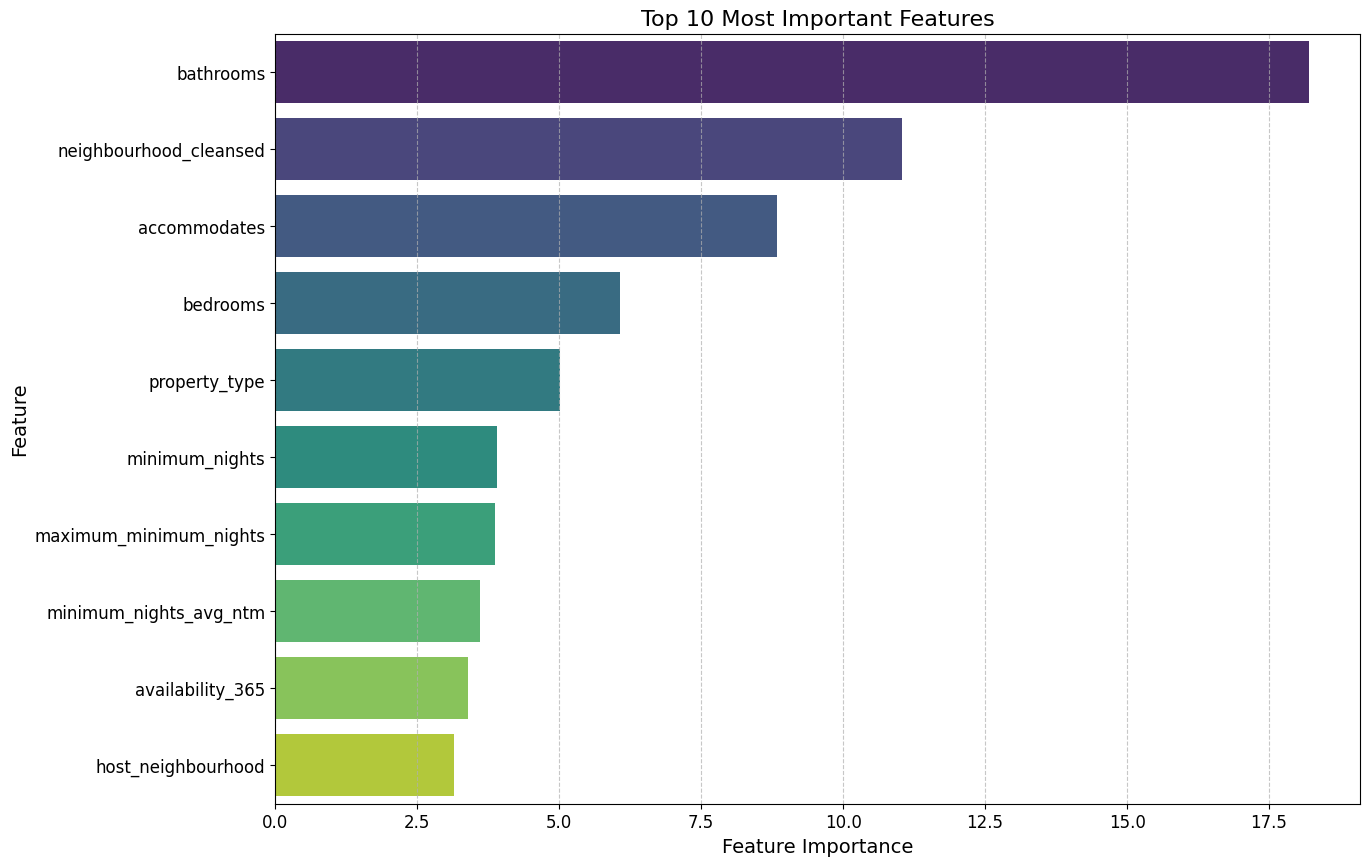

In [ ]:
# Extract feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(importance_df.head(10))

# Plot the feature importances with enhanced visualization
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Experiment 7 categorical encoding and numerical encoding


In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

##load the data

In [51]:
listings=pd.read_csv("/content/drive/MyDrive/daa/listings.csv")
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [52]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37765 non-null  int64  
 1   listing_url                                   37765 non-null  object 
 2   scrape_id                                     37765 non-null  int64  
 3   last_scraped                                  37765 non-null  object 
 4   source                                        37765 non-null  object 
 5   name                                          37763 non-null  object 
 6   description                                   36675 non-null  object 
 7   neighborhood_overview                         21296 non-null  object 
 8   picture_url                                   37764 non-null  object 
 9   host_id                                       37765 non-null 

## Drop non useful columns

In [53]:
listings.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name','host_location',
       'description', 'neighborhood_overview', 'host_id', 'host_about','host_url','host_name','picture_url','host_neighbourhood'
       , 'host_thumbnail_url', 'host_picture_url','calendar_updated', 'calendar_last_scraped','license'
       ,'first_review','last_review'],inplace=True)

In [54]:
listings.head().T

0  \
host_since                                                                           2008-09-09   
host_response_time                                                           a few days or more   
host_response_rate                                                                          43%   
host_acceptance_rate                                                                        21%   
host_is_superhost                                                                             f   
host_listings_count                                                                         7.0   
host_total_listings_count                                                                   9.0   
host_verifications                                             ['email', 'phone', 'work_email']   
host_has_profile_pic                                                                          t   
host_identity_verified                                                                        t   
neighbourhood                                                           Neighborhood highlights   
neighbourhood_cleansed                                                                  Midtown   
neighbourhood_group_cleansed                                                          Manhattan   
latitude                                                                               40.75356   
longitude                                                                             -73.98559   
property_type                                                                Entire rental unit   
room_type                                                                       Entire home/apt   
accommodates                                                                                  1   
bathrooms                                                                                   1.0   
bathrooms_text                                                                           1 bath   
bedrooms                                                                                    0.0   
beds                                                                                        1.0   
amenities                                     ["Smoke alarm", "Heating", "Bed linens", "Oven...   
price                                                                                       NaN   
minimum_nights                                                                               30   
maximum_nights                                                                             1125   
minimum_minimum_nights                                                                     30.0   
maximum_minimum_nights                                                                     30.0   
minimum_maximum_nights                                                                   1125.0   
maximum_maximum_nights                                                                   1125.0   
minimum_nights_avg_ntm                                                                     30.0   
maximum_nights_avg_ntm                                                                   1125.0   
has_availability                                                                              t   
availability_30                                                                              13   
availability_60                                                                              30   
availability_90                                                                              60   
availability_365                                                                            300   
number_of_reviews                                                                            49   
number_of_reviews_ltm                                                                         0   
number_of_reviews_l30d                                                                        0   
review_scores_rating               

## Encode host since

In [55]:
from datetime import datetime
# get the number of years as a host
listings['host_since'] = datetime.now().year-pd.to_datetime(listings['host_since']).dt.year
# fill missing data with the mode
listings['host_since'].fillna(0,inplace=True)
# set the type to float
listings['host_since']=listings['host_since'].astype('int')

listings.head(1)

host_since  host_response_time host_response_rate host_acceptance_rate  \
0          16  a few days or more                43%                  21%   

  host_is_superhost  host_listings_count  host_total_listings_count  \
0                 f                  7.0                        9.0   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   

  host_identity_verified            neighbourhood neighbourhood_cleansed  \
0                      t  Neighborhood highlights                Midtown   

  neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                    Manhattan  40.75356  -73.98559  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             1        1.0         1 bath       0.0   1.0   

                                           amenities price  minimum_nights  \
0  ["Smoke alarm", "Heating", "Bed linens", "Oven...   NaN              30   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    30.0                    30.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    30.0   

   maximum_nights_avg_ntm has_availability  availability_30  availability_60  \
0                  1125.0                t               13               30   

   availability_90  availability_365  number_of_reviews  \
0               60               300                 49   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                      0                       0                  4.68   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.73                       4.63                   4.77   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          4.8                    4.81                  4.4   

  instant_bookable  calculated_host_listings_count  \
0                f                               3   

   calculated_host_listings_count_entire_homes  \
0                                            3   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.28

In [56]:
listings['host_since'].value_counts()

host_since
9     4632
10    4390
8     4200
12    3011
11    2803
5     2782
7     2671
6     2670
2     2419
1     2074
3     1896
4     1360
13    1307
0      853
14     515
15     166
16      16
Name: count, dtype: int64

In [57]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    37765 non-null  int64  
 1   host_response_time                            23035 non-null  object 
 2   host_response_rate                            23035 non-null  object 
 3   host_acceptance_rate                          24845 non-null  object 
 4   host_is_superhost                             37367 non-null  object 
 5   host_listings_count                           37760 non-null  float64
 6   host_total_listings_count                     37760 non-null  float64
 7   host_verifications                            37760 non-null  object 
 8   host_has_profile_pic                          37760 non-null  object 
 9   host_identity_verified                        37760 non-null 

## encode host_response_time

In [58]:
listings.host_response_time.value_counts(dropna=False)

host_response_time
NaN                   14730
within an hour        14391
within a few hours     4582
within a day           2462
a few days or more     1600
Name: count, dtype: int64

In [59]:
response_time_mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}
# map values to enocde it
listings['host_response_time'] = listings['host_response_time'].map(response_time_mapping)
# fill na
listings['host_response_time'].fillna(4, inplace=True)

listings.host_response_time.value_counts()

host_response_time
4.0    29121
3.0     4582
2.0     2462
1.0     1600
Name: count, dtype: int64

In [60]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    37765 non-null  int64  
 1   host_response_time                            37765 non-null  float64
 2   host_response_rate                            23035 non-null  object 
 3   host_acceptance_rate                          24845 non-null  object 
 4   host_is_superhost                             37367 non-null  object 
 5   host_listings_count                           37760 non-null  float64
 6   host_total_listings_count                     37760 non-null  float64
 7   host_verifications                            37760 non-null  object 
 8   host_has_profile_pic                          37760 non-null  object 
 9   host_identity_verified                        37760 non-null 

## Encode host_response_rate AND host_acceptance_rate and fill na with mode

In [61]:
listings.host_response_rate.value_counts(dropna=False)

host_response_rate
NaN     14730
100%    14363
97%      1000
98%       982
0%        901
99%       658
90%       621
94%       557
96%       377
80%       360
50%       320
43%       223
95%       206
92%       197
67%       166
93%       161
76%       146
70%       137
75%       124
62%       114
83%       113
60%        97
91%        86
40%        80
88%        76
86%        70
33%        65
89%        62
10%        61
64%        57
20%        52
87%        49
84%        42
77%        36
52%        35
85%        34
25%        32
81%        31
4%         28
17%        28
79%        24
82%        23
73%        21
44%        20
78%        16
42%        16
71%        15
30%        15
38%        15
14%        13
61%        12
57%        12
54%        11
56%        10
13%         9
63%         9
11%         8
29%         8
22%         7
55%         3
69%         3
9%          3
21%         2
7%          2
8%          2
15%         2
65%         2
72%         1
47%         1
28%         1
19%         1
27%         1
Name: count, dtype: int64

In [62]:
listings.host_response_rate=listings.host_response_rate.str.replace('%',"").astype(float)
listings.host_response_rate.fillna(100.0,inplace=True)

In [63]:
listings.host_acceptance_rate.value_counts(dropna=False)

host_acceptance_rate
NaN     12920
100%     6906
96%      1420
99%      1244
0%       1102
23%       702
98%       640
97%       588
82%       560
89%       554
95%       536
50%       497
94%       487
87%       478
75%       427
77%       413
67%       405
88%       396
85%       388
78%       354
92%       353
69%       342
90%       336
71%       336
86%       309
84%       299
80%       282
83%       273
93%       249
91%       218
70%       196
33%       188
43%       187
60%       156
58%       141
64%       134
81%       132
79%       124
57%       114
63%       114
72%       104
66%       104
73%        94
44%        89
74%        87
54%        83
46%        82
61%        77
40%        76
76%        76
29%        75
25%        74
53%        66
38%        65
56%        64
59%        58
68%        56
55%        54
49%        53
4%         51
62%        51
45%        50
7%         47
20%        46
52%        45
65%        43
17%        41
21%        39
47%        39
30%        37
36%        29
14%        26
18%        24
39%        23
13%        22
28%        20
42%        19
35%        17
22%        16
48%        15
10%        14
11%        12
37%        12
27%        10
51%         9
31%         9
32%         9
16%         9
8%          8
9%          7
12%         5
3%          5
41%         4
19%         4
5%          3
34%         3
24%         3
26%         1
6%          1
Name: count, dtype: int64

In [64]:
listings.host_acceptance_rate=listings.host_acceptance_rate.str.replace('%',"").astype(float)
listings.host_acceptance_rate.fillna(100.0,inplace=True)
listings.head(1)

host_since  host_response_time  host_response_rate  host_acceptance_rate  \
0          16                 1.0                43.0                  21.0   

  host_is_superhost  host_listings_count  host_total_listings_count  \
0                 f                  7.0                        9.0   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   

  host_identity_verified            neighbourhood neighbourhood_cleansed  \
0                      t  Neighborhood highlights                Midtown   

  neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                    Manhattan  40.75356  -73.98559  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             1        1.0         1 bath       0.0   1.0   

                                           amenities price  minimum_nights  \
0  ["Smoke alarm", "Heating", "Bed linens", "Oven...   NaN              30   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    30.0                    30.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    30.0   

   maximum_nights_avg_ntm has_availability  availability_30  availability_60  \
0                  1125.0                t               13               30   

   availability_90  availability_365  number_of_reviews  \
0               60               300                 49   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                      0                       0                  4.68   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.73                       4.63                   4.77   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          4.8                    4.81                  4.4   

  instant_bookable  calculated_host_listings_count  \
0                f                               3   

   calculated_host_listings_count_entire_homes  \
0                                            3   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.28

In [65]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    37765 non-null  int64  
 1   host_response_time                            37765 non-null  float64
 2   host_response_rate                            37765 non-null  float64
 3   host_acceptance_rate                          37765 non-null  float64
 4   host_is_superhost                             37367 non-null  object 
 5   host_listings_count                           37760 non-null  float64
 6   host_total_listings_count                     37760 non-null  float64
 7   host_verifications                            37760 non-null  object 
 8   host_has_profile_pic                          37760 non-null  object 
 9   host_identity_verified                        37760 non-null 

## Encode Binary columns
 host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable

In [66]:
tf_mapping = {'t': 1, 'f': 0}

columns_to_encode = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'has_availability',
    'instant_bookable'
]

for column in columns_to_encode:
    listings[column] = listings[column].map(tf_mapping)
    listings[column].fillna(0, inplace=True)

listings.head(1)

host_since  host_response_time  host_response_rate  host_acceptance_rate  \
0          16                 1.0                43.0                  21.0   

   host_is_superhost  host_listings_count  host_total_listings_count  \
0                0.0                  7.0                        9.0   

                 host_verifications  host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                   1.0   

   host_identity_verified            neighbourhood neighbourhood_cleansed  \
0                     1.0  Neighborhood highlights                Midtown   

  neighbourhood_group_cleansed  latitude  longitude       property_type  \
0                    Manhattan  40.75356  -73.98559  Entire rental unit   

         room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Entire home/apt             1        1.0         1 bath       0.0   1.0   

                                           amenities price  minimum_nights  \
0  ["Smoke alarm", "Heating", "Bed linens", "Oven...   NaN              30   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    30.0                    30.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    30.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                  1125.0               1.0               13               30   

   availability_90  availability_365  number_of_reviews  \
0               60               300                 49   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                      0                       0                  4.68   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.73                       4.63                   4.77   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          4.8                    4.81                  4.4   

   instant_bookable  calculated_host_listings_count  \
0                 0                               3   

   calculated_host_listings_count_entire_homes  \
0                                            3   

   calculated_host_listings_count_private_rooms  \
0                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.28

In [67]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    37765 non-null  int64  
 1   host_response_time                            37765 non-null  float64
 2   host_response_rate                            37765 non-null  float64
 3   host_acceptance_rate                          37765 non-null  float64
 4   host_is_superhost                             37765 non-null  float64
 5   host_listings_count                           37760 non-null  float64
 6   host_total_listings_count                     37760 non-null  float64
 7   host_verifications                            37760 non-null  object 
 8   host_has_profile_pic                          37765 non-null  float64
 9   host_identity_verified                        37765 non-null 

## Encode host_verifications                            

In [68]:
listings.host_verifications.value_counts(dropna=False)

host_verifications
['email', 'phone']                  29605
['email', 'phone', 'work_email']     4823
['phone']                            3127
['phone', 'work_email']               108
['email']                              64
[]                                     23
['email', 'work_email']                10
NaN                                     5
Name: count, dtype: int64

### convert string to real lists and fill missing values with []



In [69]:
import ast
listings['host_verifications'].fillna('[]', inplace=True)
listings['host_verifications'] = listings['host_verifications'].apply(ast.literal_eval)

### split the verifications into columns

In [70]:
verifications = ['email', 'phone','work_email']
for vf in verifications:
    listings["host_has_"+vf] = listings['host_verifications'].apply(lambda x: 1 if vf in x else 0)


### drop the host_verifications column

In [71]:
listings.drop(columns=['host_verifications'],inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    37765 non-null  int64  
 1   host_response_time                            37765 non-null  float64
 2   host_response_rate                            37765 non-null  float64
 3   host_acceptance_rate                          37765 non-null  float64
 4   host_is_superhost                             37765 non-null  float64
 5   host_listings_count                           37760 non-null  float64
 6   host_total_listings_count                     37760 non-null  float64
 7   host_has_profile_pic                          37765 non-null  float64
 8   host_identity_verified                        37765 non-null  float64
 9   neighbourhood                                 21297 non-null 



## Encode 'neighbourhood','neighbourhood_group_cleansed', 'neighbourhood_cleansed','property_type','room_type'




In [72]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    37765 non-null  int64  
 1   host_response_time                            37765 non-null  float64
 2   host_response_rate                            37765 non-null  float64
 3   host_acceptance_rate                          37765 non-null  float64
 4   host_is_superhost                             37765 non-null  float64
 5   host_listings_count                           37760 non-null  float64
 6   host_total_listings_count                     37760 non-null  float64
 7   host_has_profile_pic                          37765 non-null  float64
 8   host_identity_verified                        37765 non-null  float64
 9   neighbourhood                                 21297 non-null 

### drop column neighbourhood as it contain only one value

In [73]:
listings.drop(columns=['neighbourhood'],inplace=True)

### one hot encode both columns neighbourhood_cleansed and neighbourhood_group_cleansed

In [74]:
listings=pd.get_dummies(listings, columns=['neighbourhood_group_cleansed', 'neighbourhood_cleansed','property_type','room_type'])

## Encode amenities

### get unique amenities values

In [75]:
len(listings['amenities'].value_counts())

30668

In [76]:
# Convert string representations of lists to actual lists
listings['amenities'] = listings['amenities'].apply(ast.literal_eval)

In [77]:
# Flatten the list of verifications and get the unique verification methods
all_verifications = [item for sublist in listings['amenities'] for item in sublist]
verification_counts = pd.Series(all_verifications).value_counts()
unique_verifications = verification_counts.index.tolist()
len(unique_verifications)

7043

that a huge number of features to count 7043 unique amenities and 30.668 different combination so i will count the number of amenities instead

In [78]:
listings['amenities_count']=listings['amenities'].apply(lambda x: len(x))

In [79]:
listings['amenities_count'].value_counts(dropna=False)

amenities_count
12    1261
9     1261
13    1198
10    1189
8     1187
11    1168
14    1159
15    1146
7     1030
16     989
32     899
23     866
33     812
17     810
21     787
6      782
22     778
18     756
30     755
24     750
31     730
29     729
28     726
27     724
19     722
34     705
20     677
25     674
26     654
35     647
38     619
36     599
37     588
39     578
40     576
42     546
41     532
44     509
5      483
43     469
46     461
45     454
49     420
47     417
48     355
50     348
51     322
4      285
52     281
53     240
54     227
55     227
56     191
57     155
58     143
59     126
0      118
60     117
61     104
3      104
62      74
64      65
63      64
67      49
66      44
2       39
65      39
68      30
1       28
69      28
70      26
71      19
73      15
74      11
72      10
76       9
75       7
77       7
79       6
78       5
80       5
81       5
83       4
82       3
86       2
89       1
92       1
85       1
91       1
87       1
95       1
Name: count, dtype: int64

In [80]:
# Drop the original 'amenities' column
listings.drop(columns=['amenities'], inplace=True)

In [81]:
# Check the DataFrame
listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 363 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    host_since                                         37765 non-null  int64  
 1    host_response_time                                 37765 non-null  float64
 2    host_response_rate                                 37765 non-null  float64
 3    host_acceptance_rate                               37765 non-null  float64
 4    host_is_superhost                                  37765 non-null  float64
 5    host_listings_count                                37760 non-null  float64
 6    host_total_listings_count                          37760 non-null  float64
 7    host_has_profile_pic                               37765 non-null  float64
 8    host_identity_verified                             37765 non-null  float64

## Encode bathrooms

In [82]:
listings.bathrooms.value_counts(dropna=False)

bathrooms
1.0     18146
NaN     14593
2.0      2718
1.5      1000
0.0       489
3.0       285
2.5       273
4.0        90
3.5        66
0.5        50
4.5        25
5.0        13
6.0         4
5.5         3
7.5         3
6.5         2
7.0         2
15.5        1
10.5        1
11.5        1
Name: count, dtype: int64

In [83]:
listings.bathrooms_text.value_counts(dropna=False)

bathrooms_text
1 bath               19719
1 shared bath         7652
1 private bath        3037
2 baths               2856
1.5 baths             1066
2 shared baths        1065
1.5 shared baths       581
0 shared baths         419
2.5 baths              358
3 baths                329
0 baths                141
4 baths                 97
3 shared baths          93
3.5 baths               85
Half-bath               56
2.5 shared baths        51
NaN                     37
4.5 baths               30
4 shared baths          28
5 baths                 16
Private half-bath       15
Shared half-bath        10
5.5 baths                5
6 baths                  5
7 baths                  3
7.5 baths                3
3.5 shared baths         2
15.5 baths               1
10.5 baths               1
4.5 shared baths         1
6.5 baths                1
11.5 baths               1
6 shared baths           1
Name: count, dtype: int64

### fill na with 0


In [84]:
listings['bathrooms_text'].fillna(0, inplace=True)

### encode bathrooms_text with 1 for private bathroom and 0.5 for shared bathroom

In [85]:
# Define specific encoding for each value
encode_map = {
    '1 bath': 1,
    '1 shared bath': 0.5,
    '1 private bath': 1,
    '2 baths': 2,
    '1.5 baths': 1.5,
    '2 shared baths': 1,
    '1.5 shared baths': 1.5,
    '0 shared baths': 0,
    '2.5 baths': 2.5,
    '3 baths': 3,
    '0 baths': 0,
    '4 baths': 4,
    '3 shared baths': 1.5,
    '3.5 baths': 3.5,
    'Half-bath': 0.5,
    '2.5 shared baths': 2.5*0.5,
    '4.5 baths': 4.5,
    '4 shared baths': 2,
    '5 baths': 5,
    'Private half-bath': 0.5,
    'Shared half-bath': 0.5,
    '5.5 baths': 5.5,
    '6 baths': 6,
    '7 baths': 7,
    '7.5 baths': 7.5,
    '3.5 shared baths': 3.5*0.5,
    '15.5 baths': 15.5,
    '10.5 baths': 10.5,
    '4.5 shared baths': 4.5*0.5,
    '6.5 baths': 6.5,
    '11.5 baths': 11.5,
    '6 shared baths': 6*0.5
}

# Apply the mapping
listings['bathrooms_text'] = listings['bathrooms_text'].map(encode_map)


In [86]:
listings['bathrooms_text'] = listings['bathrooms_text'].astype(float)

In [87]:
listings['bathrooms_text'].fillna(0, inplace=True)

In [88]:
listings['bathrooms_text'].value_counts(dropna=False)

bathrooms_text
1.00     23821
0.50      7733
2.00      2884
1.50      1740
0.00       597
2.50       358
3.00       330
4.00        97
3.50        85
1.25        51
4.50        30
5.00        16
5.50         5
6.00         5
7.00         3
7.50         3
1.75         2
2.25         1
10.50        1
6.50         1
15.50        1
11.50        1
Name: count, dtype: int64

### fill na in bathrooms using bathrooms text

In [89]:
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms_text'])
listings.drop(columns=['bathrooms_text'],inplace=True)

In [90]:
listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 362 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    host_since                                         37765 non-null  int64  
 1    host_response_time                                 37765 non-null  float64
 2    host_response_rate                                 37765 non-null  float64
 3    host_acceptance_rate                               37765 non-null  float64
 4    host_is_superhost                                  37765 non-null  float64
 5    host_listings_count                                37760 non-null  float64
 6    host_total_listings_count                          37760 non-null  float64
 7    host_has_profile_pic                               37765 non-null  float64
 8    host_identity_verified                             37765 non-null  float64

## fill na in beds and bedrooms using mode

In [91]:
# Fill NaN values in 'beds' column with the mode value
listings['beds'].fillna(listings['beds'].mode()[0],inplace=True)

# Fill NaN values in 'bedrooms' column with the mode value
listings['bedrooms'].fillna(listings['bedrooms'].mode()[0],inplace=True)

In [92]:
listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 362 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    host_since                                         37765 non-null  int64  
 1    host_response_time                                 37765 non-null  float64
 2    host_response_rate                                 37765 non-null  float64
 3    host_acceptance_rate                               37765 non-null  float64
 4    host_is_superhost                                  37765 non-null  float64
 5    host_listings_count                                37760 non-null  float64
 6    host_total_listings_count                          37760 non-null  float64
 7    host_has_profile_pic                               37765 non-null  float64
 8    host_identity_verified                             37765 non-null  float64

## fill na in price and change its type to float

In [94]:
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
# listings['price'].fillna(listings['price'].mode()[0],inplace=True)
listings.dropna(inplace=True,axis=0, subset=['price'])
listings['price'] = listings['price'].astype(float)

In [ ]:
listings['price'].value_counts(dropna=False)

price
150.0       15256
200.0         441
100.0         421
120.0         346
250.0         329
125.0         303
60.0          291
80.0          289
90.0          280
70.0          265
50.0          260
75.0          257
65.0          250
130.0         244
160.0         240
175.0         233
140.0         221
300.0         220
55.0          216
85.0          215
40.0          203
110.0         202
180.0         196
45.0          196
135.0         181
95.0          180
225.0         168
99.0          168
350.0         161
170.0         160
115.0         156
165.0         150
49.0          145
105.0         144
145.0         142
43.0          136
334.0         132
199.0         132
220.0         130
89.0          128
155.0         125
42.0          118
39.0          118
190.0         113
38.0          108
185.0         107
46.0          104
195.0         103
149.0         103
54.0          101
240.0         100
52.0           99
47.0           98
98.0           97
79.0           95
48.0           94
44.0           89
53.0           89
275.0          89
59.0           86
189.0          86
68.0           86
41.0           82
58.0           80
88.0           80
500.0          80
139.0          79
400.0          77
69.0           75
93.0           75
37.0           75
92.0           74
96.0           74
72.0           73
57.0           73
62.0           72
230.0          72
66.0           71
109.0          71
280.0          70
129.0          69
210.0          69
119.0          69
78.0           69
56.0           68
35.0           66
260.0          65
36.0           64
320.0          64
124.0          64
159.0          64
71.0           63
299.0          63
67.0           62
249.0          62
102.0          62
215.0          61
169.0          61
104.0          61
51.0           61
128.0          61
103.0          60
94.0           59
116.0          58
111.0          58
179.0          57
64.0           57
270.0          57
101.0          57
84.0           56
375.0          56
61.0           55
83.0           55
108.0          54
245.0          53
117.0          53
73.0           53
450.0          53
74.0           52
91.0           51
81.0           51
76.0           51
118.0          50
154.0          50
77.0           50
123.0          50
600.0          48
399.0          48
325.0          48
143.0          47
295.0          47
113.0          46
82.0           46
112.0          45
121.0          45
127.0          45
136.0          45
106.0          44
132.0          44
86.0           44
107.0          43
87.0           43
97.0           43
63.0           43
206.0          42
235.0          42
133.0          42
134.0          41
229.0          41
1000.0         41
186.0          41
114.0          41
360.0          40
148.0          40
239.0          40
174.0          40
157.0          40
212.0          38
142.0          38
290.0          38
131.0          38
167.0          37
219.0          37
181.0          37
176.0          37
138.0          36
146.0          36
178.0          36
156.0          36
205.0          36
330.0          36
196.0          35
285.0          35
349.0          34
126.0          34
188.0          34
265.0          34
163.0          33
153.0          33
332.0          33
214.0          33
144.0          33
158.0          33
141.0          32
238.0          32
224.0          32
499.0          32
700.0          32
164.0          32
289.0          32
192.0          31
279.0          31
171.0          31
168.0          30
198.0          30
172.0          30
297.0          30
246.0          30
222.0          30
650.0          29
269.0          29
237.0          29
255.0          29
314.0          29
122.0          29
183.0          29
166.0          28
259.0          28
208.0          28
380.0          28
161.0          28
152.0          28
182.0          27
425.0          27
232.0          27
201.0          27
177.0          27
211.0          27
335.0          27
395.0          26
162.0          26
306.0          2

In [95]:
listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 23044 entries, 1 to 37764
Data columns (total 362 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    host_since                                         23044 non-null  int64  
 1    host_response_time                                 23044 non-null  float64
 2    host_response_rate                                 23044 non-null  float64
 3    host_acceptance_rate                               23044 non-null  float64
 4    host_is_superhost                                  23044 non-null  float64
 5    host_listings_count                                23044 non-null  float64
 6    host_total_listings_count                          23044 non-null  float64
 7    host_has_profile_pic                               23044 non-null  float64
 8    host_identity_verified                             23044 non-null  float64
 9  

## impute the missing values using mode value in the rest of the columns

In [96]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant')
listings=pd.DataFrame(imputer.fit_transform(listings), columns=listings.columns)

In [97]:
listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23044 entries, 0 to 23043
Data columns (total 362 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    host_since                                         23044 non-null  float64
 1    host_response_time                                 23044 non-null  float64
 2    host_response_rate                                 23044 non-null  float64
 3    host_acceptance_rate                               23044 non-null  float64
 4    host_is_superhost                                  23044 non-null  float64
 5    host_listings_count                                23044 non-null  float64
 6    host_total_listings_count                          23044 non-null  float64
 7    host_has_profile_pic                               23044 non-null  float64
 8    host_identity_verified                             23044 non-null  float64

## Split the data

In [98]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = listings.drop(columns=['price'])  # Features
y = listings['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model to find best model

### lazy predict

In [99]:
! pip install lazypredict
! pip install dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [100]:
from lazypredict.Supervised  import LazyRegressor
# Initialize and train LazyRegressor
lazy_regressor = LazyRegressor()
models = lazy_regressor.fit(X_train, X_test, y_train, y_test)

# Display results
print(models)

 98%|█████████▊| 41/42 [38:37<00:21, 21.36s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4490
[LightGBM] [Info] Number of data points in the train set: 18435, number of used features: 200
[LightGBM] [Info] Start training from score 222.475454


100%|██████████| 42/42 [38:39<00:00, 55.23s/it]

(                                                      Adjusted R-Squared  \
Model                                                                      
AdaBoostRegressor                                                   0.65   
GradientBoostingRegressor                                           0.35   
RandomForestRegressor                                               0.33   
LGBMRegressor                                                       0.33   
MLPRegressor                                                        0.23   
HistGradientBoostingRegressor                                       0.16   
Ridge                                                               0.13   
RidgeCV                                                             0.13   
LassoLarsCV                                                         0.13   
LassoCV                                                             0.13   
Lasso                                                               0.13   
LassoLars  

In [108]:
models[0]

Adjusted R-Squared  \
Model                                                                      
AdaBoostRegressor                                                   0.65   
GradientBoostingRegressor                                           0.35   
RandomForestRegressor                                               0.33   
LGBMRegressor                                                       0.33   
MLPRegressor                                                        0.23   
HistGradientBoostingRegressor                                       0.16   
Ridge                                                               0.13   
RidgeCV                                                             0.13   
LassoLarsCV                                                         0.13   
LassoCV                                                             0.13   
Lasso                                                               0.13   
LassoLars                                                           0.13   
OrthogonalMatchingPursuit                                           0.12   
OrthogonalMatchingPursuitCV                                         0.12   
XGBRegressor                                                        0.12   
LarsCV                                                              0.12   
ElasticNetCV                                                        0.11   
LassoLarsIC                                                         0.11   
ElasticNet                                                          0.10   
BayesianRidge                                                       0.09   
PassiveAggressiveRegressor                                          0.09   
HuberRegressor                                                      0.09   
TweedieRegressor                                                    0.08   
LinearSVR                                                           0.05   
NuSVR                                                              -0.05   
SVR                                                                -0.05   
KernelRidge                                                        -0.06   
DummyRegressor                                                     -0.09   
GaussianProcessRegressor                                           -0.17   
PoissonRegressor                                                   -0.19   
GammaRegressor                                                     -0.53   
BaggingRegressor                                                   -0.97   
ExtraTreesRegressor                                                -1.10   
KNeighborsRegressor                                                -1.47   
DecisionTreeRegressor                                              -7.91   
ExtraTreeRegressor                                                 -8.45   
SGDRegressor                                      -187464561862633312.00   
LinearRegression                             -13126027196292650762240.00   
TransformedTargetRegressor                   -13126027196292650762240.00   
RANSACRegressor                            -3235275211888698528366592.00   
Lars                          -14590587952135876642075488641626406912.00   

                                                               R-Squared  \
Model                                                                      
AdaBoostRegressor                                                   0.68   
GradientBoostingRegressor                                           0.40   
RandomForestRegressor                                               0.38   
LGBMRegressor                                                       0.38   
MLPRegressor                                                        0.29   
HistGradientBoostingRegressor                                       0.23   
Ridge                                                               0.20   
RidgeCV                                                             0.20   
LassoLarsCV              

### catboost



In [109]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 11.0 MB/s eta 0:00:00


In [110]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
# Initialize the CatBoost Regressor
catboost_regressor =  CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.01,
                                        depth=10, n_estimators=2000,random_seed=42,
                                        loss_function='RMSE',
                                        early_stopping_rounds=100  # Stop training early if no improvement
                                        )

# Train the model
catboost_regressor.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),  # Include validation set
    verbose=100  # Print progress every 100 iterations
)
# Make predictions
y_pred = catboost_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'CatBoost Regressor Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')

0:	learn: 816.1638164	test: 519.4024111	best: 519.4024111 (0)	total: 193ms	remaining: 6m 24s
100:	learn: 745.5748885	test: 469.8377698	best: 469.8377698 (100)	total: 15.6s	remaining: 4m 53s
200:	learn: 689.7349691	test: 429.2810113	best: 429.2810113 (200)	total: 25.5s	remaining: 3m 48s
300:	learn: 646.7678583	test: 395.3656209	best: 395.3656209 (300)	total: 33.7s	remaining: 3m 9s
400:	learn: 601.7434272	test: 371.9712607	best: 371.9494556 (397)	total: 42.8s	remaining: 2m 50s
500:	learn: 560.7269719	test: 353.1873070	best: 353.1873070 (500)	total: 52.6s	remaining: 2m 37s
600:	learn: 517.1505149	test: 341.1922292	best: 341.1787063 (598)	total: 1m	remaining: 2m 19s
700:	learn: 474.4552122	test: 331.3630221	best: 331.3630221 (700)	total: 1m 9s	remaining: 2m 9s
800:	learn: 428.5255660	test: 323.4664772	best: 323.3748185 (799)	total: 1m 18s	remaining: 1m 58s
900:	learn: 399.5395202	test: 316.6869714	best: 316.6869714 (900)	total: 1m 30s	remaining: 1m 50s
1000:	learn: 379.9230080	test: 310.71

In [ ]:
listings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 362 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    host_since                                         37765 non-null  float64
 1    host_response_time                                 37765 non-null  float64
 2    host_response_rate                                 37765 non-null  float64
 3    host_acceptance_rate                               37765 non-null  float64
 4    host_is_superhost                                  37765 non-null  float64
 5    host_listings_count                                37765 non-null  float64
 6    host_total_listings_count                          37765 non-null  float64
 7    host_has_profile_pic                               37765 non-null  float64
 8    host_identity_verified                             37765 non-null  float64

# Apply log transformation on the data

## apply absolute in longitude column

In [114]:
listings['longitude']=listings['longitude'].abs()

## apply log trandform

In [115]:
import numpy as np
# Apply logarithmic transformation to all columns except 'price'
columns_to_transform = listings.columns[listings.columns != 'price']
listings[columns_to_transform] = listings[columns_to_transform].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)


In [121]:
listings .head()

host_since  host_response_time  host_response_rate  host_acceptance_rate  \
0        2.77                1.61                4.62                  4.62   
1        2.77                1.61                4.62                  4.62   
2        2.77                1.10                3.93                  0.00   
3        2.77                1.61                4.62                  4.62   
4        2.77                1.61                4.62                  4.62   

   host_is_superhost  host_listings_count  host_total_listings_count  \
0               0.00                 0.69                       1.79   
1               0.69                 0.69                       0.69   
2               0.00                 1.10                       1.10   
3               0.69                 0.69                       1.95   
4               0.69                 1.10                       1.10   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                  0.69                    0.69      3.73       4.32   
1                  0.69                    0.69      3.73       4.32   
2                  0.69                    0.69      3.73       4.32   
3                  0.69                    0.69      3.73       4.32   
4                  0.69                    0.69      3.73       4.32   

   accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0          1.61       0.92      1.10  1.10 215.00            3.43   
1          1.39       0.69      1.10  0.69  81.00            3.43   
2          0.69       0.69      0.69  0.69  65.00            3.43   
3          0.69       0.69      0.69  0.69  65.00            3.43   
4          1.10       0.69      0.69  1.10 205.00            1.10   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            6.59                    3.43                    3.43   
1            6.59                    3.43                    3.43   
2            5.20                    3.43                    3.43   
3            5.90                    3.43                    3.43   
4            7.03                    1.10                    1.10   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                    6.59                    6.59                    3.43   
1                    7.03                    7.03                    3.43   
2                    5.20                    5.20                    3.43   
3                    5.90                    5.90                    3.43   
4                    7.03                    7.03                    1.10   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                    6.59              0.69             1.10             2.48   
1                    7.03              0.69             0.00             1.79   
2                    5.20              0.69             3.43             4.11   
3                    5.90              0.69             1.10             1.95   
4                    7.03              0.69             1.79             2.30   

   availability_90  availability_365  number_of_reviews  \
0             2.48              4.28               1.61   
1             1.79              5.27               5.27   
2             4.51              5.90               0.69   
3             1.95              5.36               5.51   
4             2.56              5.39               5.93   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                   0.69                    0.00                  1.75   
1                   1.39                    0.00                  1.72   
2                   0.00                    0.00                  1.79   
3                   1.10                    0.00                  1.77   
4                   3.61                    0.00                  1.77   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0  

## Split the data

In [118]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Define features and target variable
X = listings.drop(columns=['price'])  # Features
y = listings['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [120]:

# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Print R²
print(f'R²: {r2:.2f}')

Root Mean Squared Error: 450.16839845001476
R²: 0.25
